In [1]:
from IPython.core.display import display, HTML

display(HTML('''
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
<style>
.card {
  box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.
2);
  max-width: 700px;
  margin: auto;
  text-align: center;
}
.title {
  color: grey;
  font-size: 18px;
}
.p{}
button {
  border: none;
  outline: 0;
  display: inline-block;
  padding: 8px;
  color: white;
  background-color: #000;
  text-align: center;
  cursor: pointer;
  width: 100%;
  font-size: 18px;
}
button:hover, a:hover {
  opacity: 0.7;
}
</style>

<div class="card" style="text-align: center;">
  <br><br><br>  
  <img src="https://storage.googleapis.com/kaggle-avatars/images/21544320-kg.jpg" 
       alt="Kaggle Logo" 
       style="width: 180px; height: 180px; border-radius: 50%; display: block; margin: 0 auto;">
  <h1>Paraczki Andrada</h1>
  <p class="title1" style="text-align:center;">Computer Science Student</p>
  <p class="title" style="text-align:center;">Bachelor's Thesis</p>
  <p style="text-align:center; font-size: 18px;">West University of Timișoara</p>
  <a style="text-decoration: none; font-size: 16px; color: #ce5cf7;" href="mailto:andrada.paraczki03@e-uvt.ro">
    Institutional e-mail <i class="fa fa-envelope"></i>
  </a>
  <br><br><br>
</div>

'''))


In [4]:
from IPython.display import Image, display
import os
from collections import Counter
from numpy import array
import requests


## Install Ultralytics
You need Internet enabled

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

# Analyze the dataset distribution

### Balanced Dataset v3

In [12]:
labels_path = "/kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/train/labels" 
counter = Counter()

for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file)) as f:
            for line in f:
                class_id = line.strip().split()[0]
                counter[int(class_id)] += 1

for cls, count in sorted(counter.items()):
    print(f"Class {cls}: {count} objects")


Class 0: 2660 objects
Class 1: 2547 objects
Class 2: 2727 objects


## Compute inverse frequencies

In [13]:
counts = array([329, 1933, 1160])
inv_freq = 1.0 / counts
norm_weights = inv_freq / inv_freq.sum()

print(norm_weights)

[    0.68784     0.11707     0.19509]


# Import & Train YOLO

Add YOLO model from input (I chose the yolo11n.pt weights from the YOLOv11 family provided by Ultralytics on Kaggle)

`Ultralytics 8.3.104` is the version of the ultralytics Python package, which is currently v8.x, even though it supports YOLOv11 models.

Proceed with training on the DSO dataset.

In [22]:
from ultralytics import YOLO

In [16]:
import urllib.request

model_path = "/kaggle/working/yolo11n.pt"
urllib.request.urlretrieve("https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt", model_path)
model = YOLO(model_path)

In [17]:
# model_path = "/kaggle/input/yolo11/pytorch/default/1/yolo11n.pt"
# model = YOLO(model_path)


results = model.train(
    data="/kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/data.yaml",
    epochs=50,
    imgsz=640,
    project="/kaggle/working/balancedTF3/50ep"
)



Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

train: Scanning /kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/train/labels... 6548 images, 10 backgrounds, 0 corrupt: 100%|██████████| 6548/6548 [00:06<00:00, 996.42it/s] 


WARNING ⚠️ train: Cache directory /kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 203.3±120.8 MB/s, size: 146.8 KB)


val: Scanning /kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/val/labels... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/818 [00:01<00:00, 658.34it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/balanced-dsyd-ft3/Balanced_DSYD FT2 split/val is not writeable, cache not saved.


Plotting labels to /kaggle/working/balancedTF3/50ep/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/balancedTF3/50ep/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.23G      1.713      3.092      1.729          5        640: 100%|██████████| 410/410 [01:36<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]


                   all        818        973      0.399      0.386      0.323      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.24G      1.661      2.258      1.706          9        640: 100%|██████████| 410/410 [01:31<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.35it/s]


                   all        818        973      0.459      0.288      0.284      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.24G      1.655      2.032      1.699          5        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.47it/s]


                   all        818        973      0.499      0.492      0.451      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.24G      1.609      1.907      1.662          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.58it/s]


                   all        818        973       0.52      0.306      0.315      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.24G      1.555       1.77      1.612          5        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.48it/s]


                   all        818        973      0.567      0.516      0.551      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.24G       1.53      1.745      1.602         10        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.29it/s]


                   all        818        973      0.581       0.39      0.419       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.24G      1.538      1.701      1.603          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.43it/s]


                   all        818        973      0.561      0.546      0.514      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.24G      1.502      1.642       1.57          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.81it/s]

                   all        818        973      0.666      0.578      0.615      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.24G      1.463      1.599       1.55          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.62it/s]

                   all        818        973      0.675      0.535      0.593       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.24G      1.421      1.535      1.526         11        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        818        973      0.607      0.528      0.576      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.24G      1.458      1.562       1.54          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.63it/s]


                   all        818        973      0.622      0.428      0.484      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.24G       1.43      1.514      1.514          2        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        818        973      0.749      0.552      0.637      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.24G      1.416      1.485      1.519          5        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.86it/s]

                   all        818        973      0.766      0.673      0.761      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.24G      1.417      1.478      1.517          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.76it/s]

                   all        818        973      0.694      0.536      0.617      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.24G      1.384      1.412      1.483          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.63it/s]


                   all        818        973      0.674       0.49      0.559      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.24G      1.375      1.411      1.482         15        640: 100%|██████████| 410/410 [01:29<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.80it/s]

                   all        818        973      0.754      0.569       0.68      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.24G      1.372      1.395      1.485         11        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.75it/s]

                   all        818        973      0.733      0.576      0.648      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.24G      1.348      1.368      1.456          5        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.67it/s]

                   all        818        973      0.774      0.636      0.724      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.24G      1.351      1.345       1.46          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.73it/s]

                   all        818        973      0.718      0.583      0.663      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.24G      1.335      1.308      1.449         13        640: 100%|██████████| 410/410 [01:28<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.83it/s]

                   all        818        973      0.794      0.701       0.79      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.24G      1.334      1.315      1.443         12        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.83it/s]

                   all        818        973      0.806       0.72      0.811      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.24G      1.322      1.287      1.434          7        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.65it/s]

                   all        818        973      0.847      0.717      0.797      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.24G      1.298       1.27      1.417         13        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.70it/s]

                   all        818        973      0.753      0.554      0.643      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.24G      1.301      1.245      1.421          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.72it/s]


                   all        818        973      0.721      0.555      0.641      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.24G      1.282      1.206      1.414          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.83it/s]

                   all        818        973      0.813      0.739      0.826      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.24G      1.261      1.191      1.397          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.63it/s]

                   all        818        973       0.83      0.738      0.822      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.24G      1.274      1.186      1.401          7        640: 100%|██████████| 410/410 [01:28<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.51it/s]

                   all        818        973      0.814      0.768      0.843      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.24G      1.249      1.165      1.387         10        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.49it/s]

                   all        818        973      0.815       0.75      0.815      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.24G      1.236       1.12      1.376         10        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.37it/s]

                   all        818        973      0.857      0.714      0.816      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.24G      1.237      1.146      1.384         10        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.48it/s]


                   all        818        973      0.809      0.668      0.763      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.24G      1.221      1.102      1.368          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.66it/s]


                   all        818        973      0.846      0.776      0.854      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.24G      1.213      1.084      1.359          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        818        973      0.869      0.793       0.87      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.24G      1.207      1.077      1.356         11        640: 100%|██████████| 410/410 [01:28<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.90it/s]

                   all        818        973      0.847      0.768      0.842      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.24G      1.189      1.046      1.343          7        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.65it/s]

                   all        818        973      0.862      0.819      0.882      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.24G      1.195      1.035      1.351          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.72it/s]

                   all        818        973      0.843       0.72      0.792      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.24G      1.166      1.017      1.327          8        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        818        973      0.804      0.783      0.841      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.24G      1.162       1.01       1.33          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        818        973      0.858      0.751      0.837      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.24G       1.15     0.9735      1.313          9        640: 100%|██████████| 410/410 [01:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.76it/s]

                   all        818        973      0.844      0.769       0.85      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.24G      1.134      0.964      1.315          6        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.80it/s]

                   all        818        973      0.871      0.804      0.883      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.24G      1.132     0.9422      1.308          5        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.79it/s]

                   all        818        973      0.852      0.739      0.847      0.533


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.24G      1.128     0.8357      1.318          4        640: 100%|██████████| 410/410 [01:30<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.64it/s]

                   all        818        973      0.865      0.798       0.88      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.24G      1.084     0.7893      1.288          4        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        818        973        0.9      0.825      0.906       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.24G      1.077     0.7713      1.287          4        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.78it/s]

                   all        818        973      0.892      0.843      0.913      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.24G      1.065     0.7591      1.276          4        640: 100%|██████████| 410/410 [01:28<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.79it/s]

                   all        818        973      0.886      0.836      0.909      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.24G      1.043     0.7307      1.258          3        640: 100%|██████████| 410/410 [01:29<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.74it/s]

                   all        818        973      0.916      0.838       0.92      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.24G      1.023     0.7044      1.242          6        640: 100%|██████████| 410/410 [01:28<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.73it/s]

                   all        818        973      0.904      0.853      0.919      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.24G      1.011      0.695      1.232          5        640: 100%|██████████| 410/410 [01:28<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.63it/s]

                   all        818        973      0.894      0.832      0.904      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.24G     0.9975     0.6796      1.222          4        640: 100%|██████████| 410/410 [01:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.96it/s]

                   all        818        973      0.913      0.853      0.925      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.24G     0.9791     0.6634      1.211          5        640: 100%|██████████| 410/410 [01:28<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.60it/s]

                   all        818        973      0.909      0.841      0.919      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.24G     0.9751     0.6595      1.207          8        640: 100%|██████████| 410/410 [01:28<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.64it/s]

                   all        818        973      0.907       0.85      0.921      0.659



50 epochs completed in 1.326 hours.
Optimizer stripped from /kaggle/working/balancedTF3/50ep/train2/weights/last.pt, 5.5MB
Optimizer stripped from /kaggle/working/balancedTF3/50ep/train2/weights/best.pt, 5.5MB

Validating /kaggle/working/balancedTF3/50ep/train2/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        818        973      0.906      0.854      0.922       0.66
              clusters        310        325      0.974      0.932      0.966       0.71
               nebulae        315        334      0.867      0.796      0.891      0.633
              galaxies        198        314      0.876      0.832      0.908      0.638
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/balancedTF3/50ep/train2


In [ ]:
num_layers = len(list(model.model.children()))
print('Total layers number:',num_layers)

In [ ]:
detect_head = model.model[-1]
print(detect_head)

## Normal training, all layers trainable

In [ ]:
# Train the model
results = model.train(data="/kaggle/input/balanced4/Balanced DSYD 3 split/data.yaml", epochs=50, imgsz=640, project="/kaggle/working/balanced4/50ep")

## Fine-tuning

In [ ]:
# Freeze the model except the detection head (layer 23)
model = YOLO("yolo11n.pt")
results2 = model.train(data="/kaggle/input/balanced4/Balanced DSYD 3 split/data.yaml", epochs=50, imgsz=640, project="/kaggle/working/balanced4/50ep-ft-head", freeze=num_layers-1)

## Download a sample image
Use the following function to download an online image to Kaggle's output working dir

In [ ]:
url = "https://www.astronomy.com/uploads/2021/09/GalaxyclusterSDSSJ03330651.jpg"
image_path = "/kaggle/working/test7.png"

# Download image
response = requests.get(url)
with open(image_path, 'wb') as f:
    f.write(response.content)
    print("Image saved!")


## Test with saved YOLO model weights

In [23]:
# Run inference on an image with YOLO11n
!yolo predict model=/kaggle/working/balancedTF3/50ep/train2/weights/best.pt source="/kaggle/working/test1.png"

Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/working/test1.png: 384x640 3 galaxiess, 54.8ms
Speed: 9.5ms preprocess, 54.8ms inference, 298.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


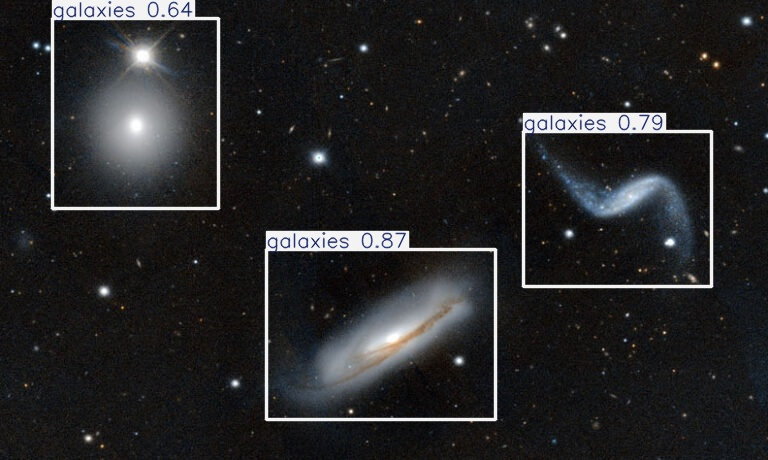

In [24]:
predicted_image_path = '/kaggle/working/runs/detect/predict3/test1.jpg'

if os.path.exists(predicted_image_path):
    display(Image(filename=predicted_image_path))
else:
    print(f"Predicted image not found at: {predicted_image_path}")


# Evaluate the model


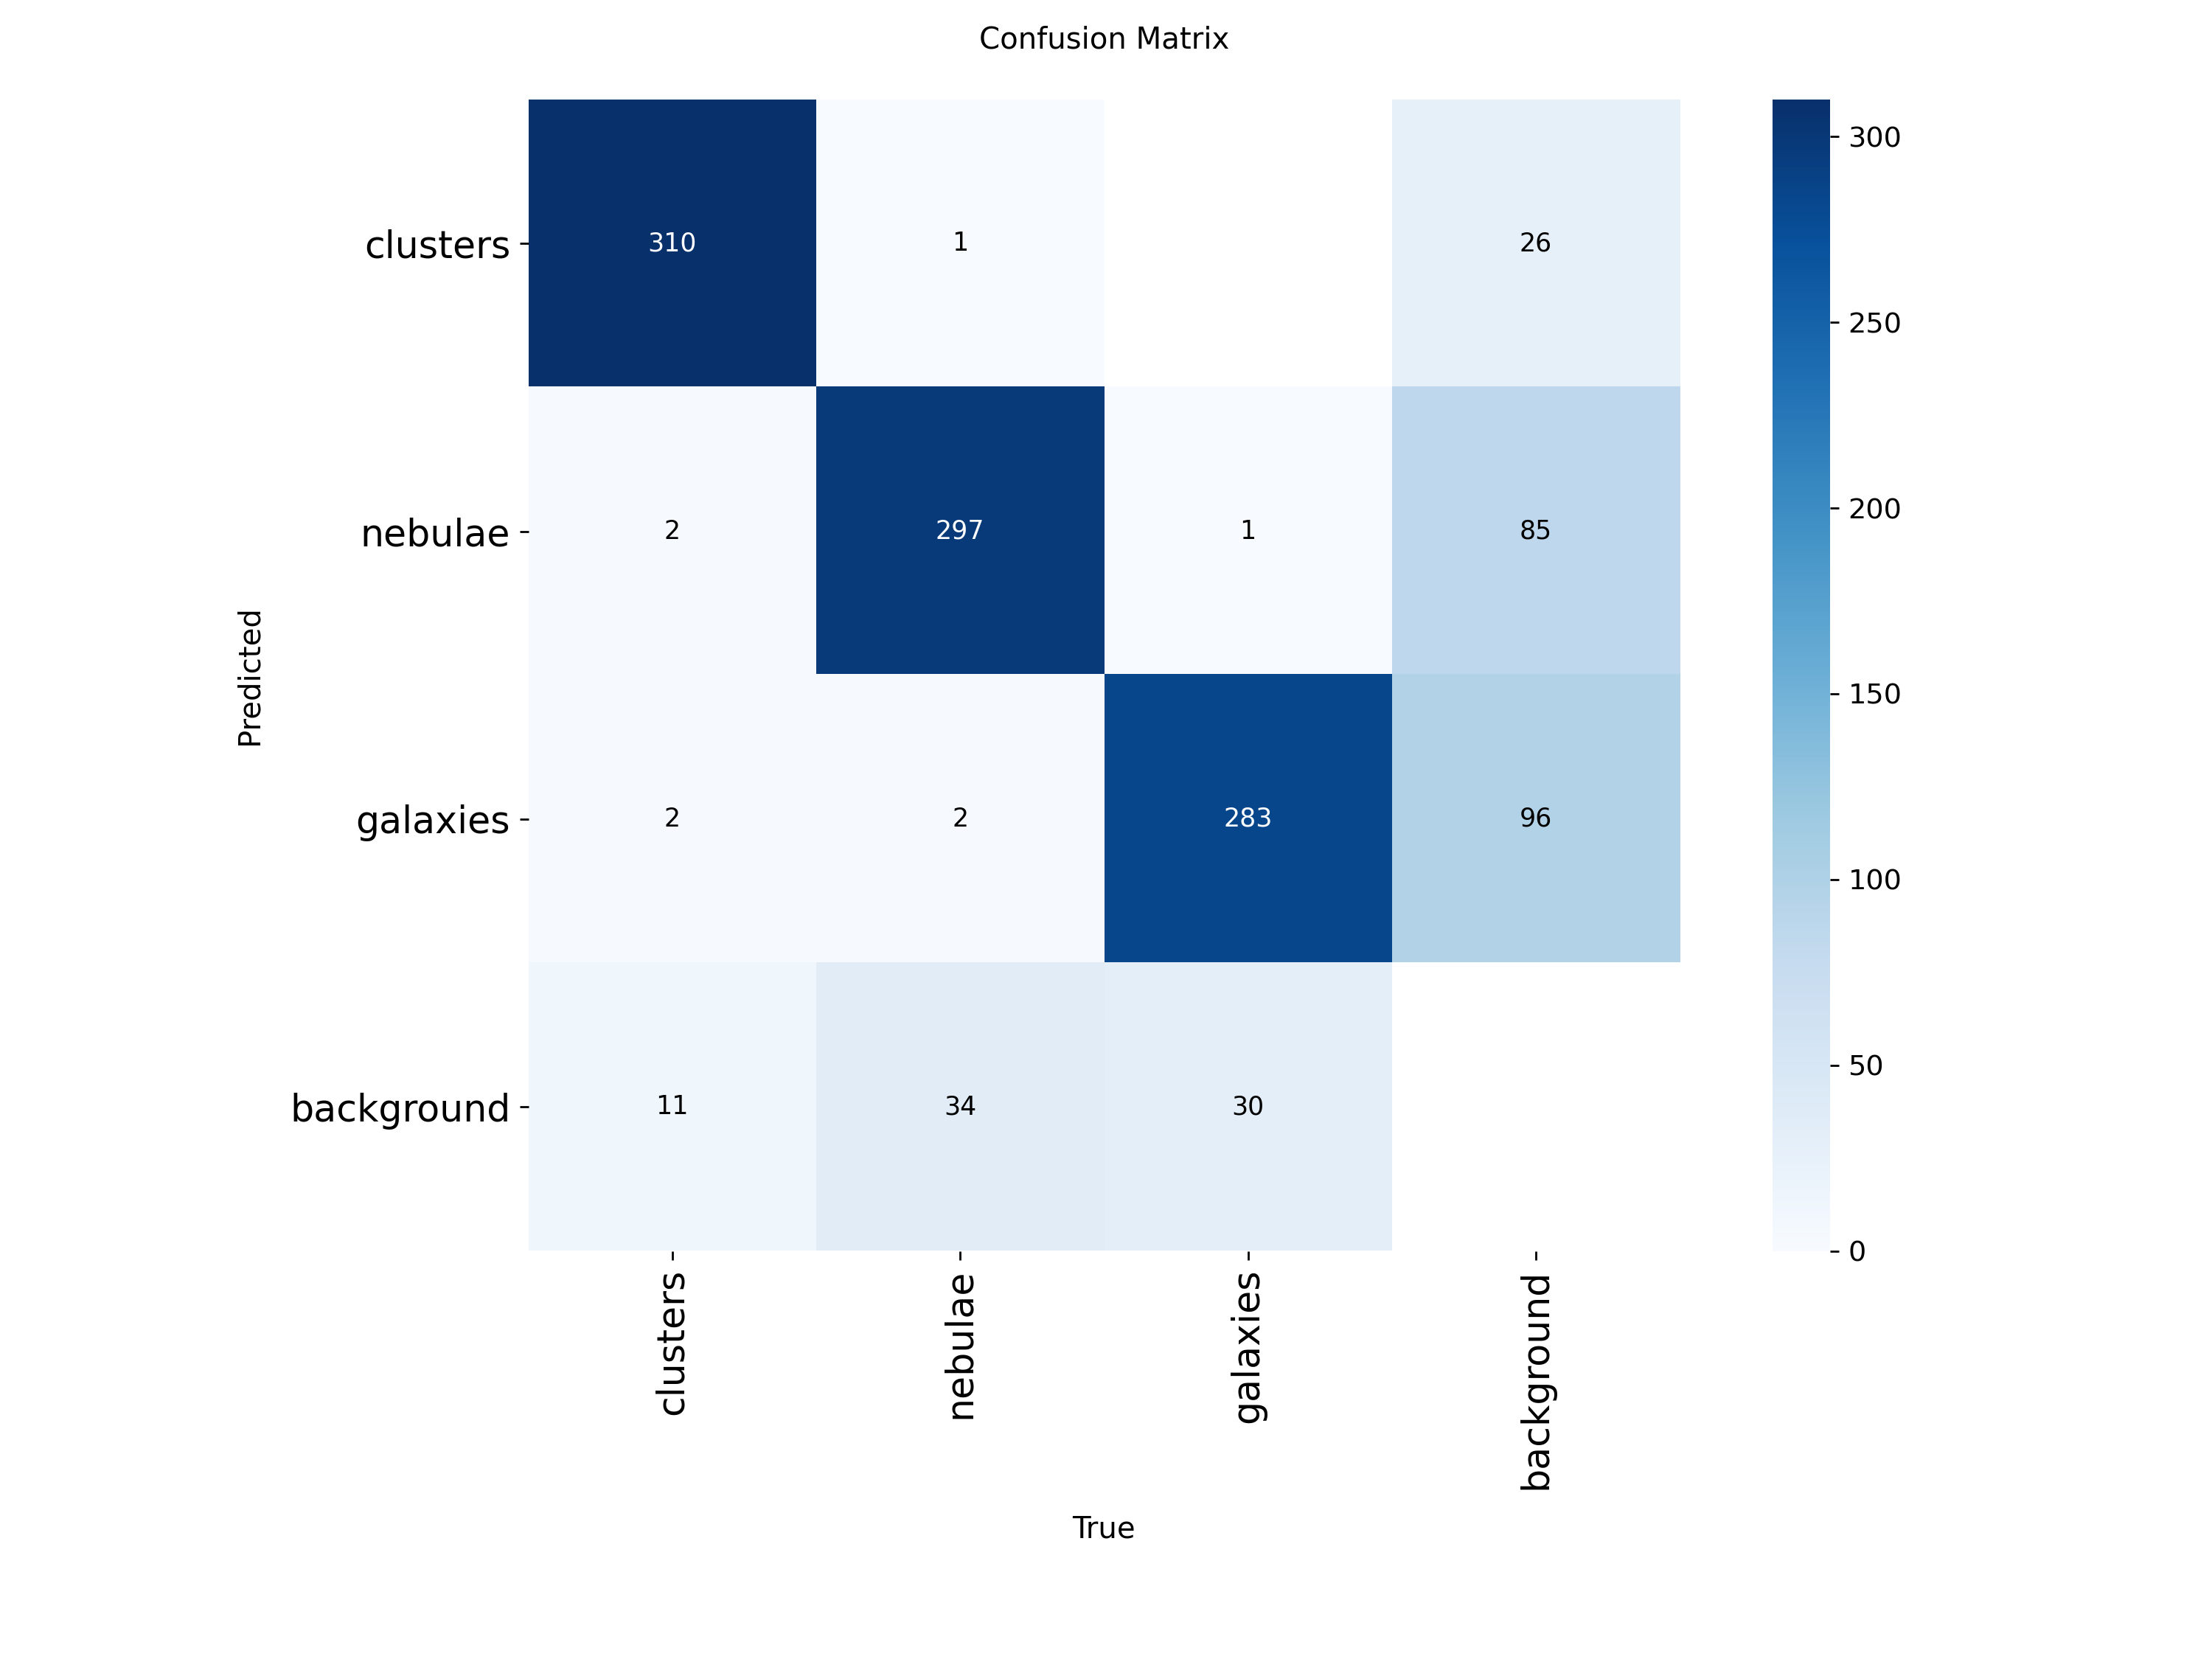
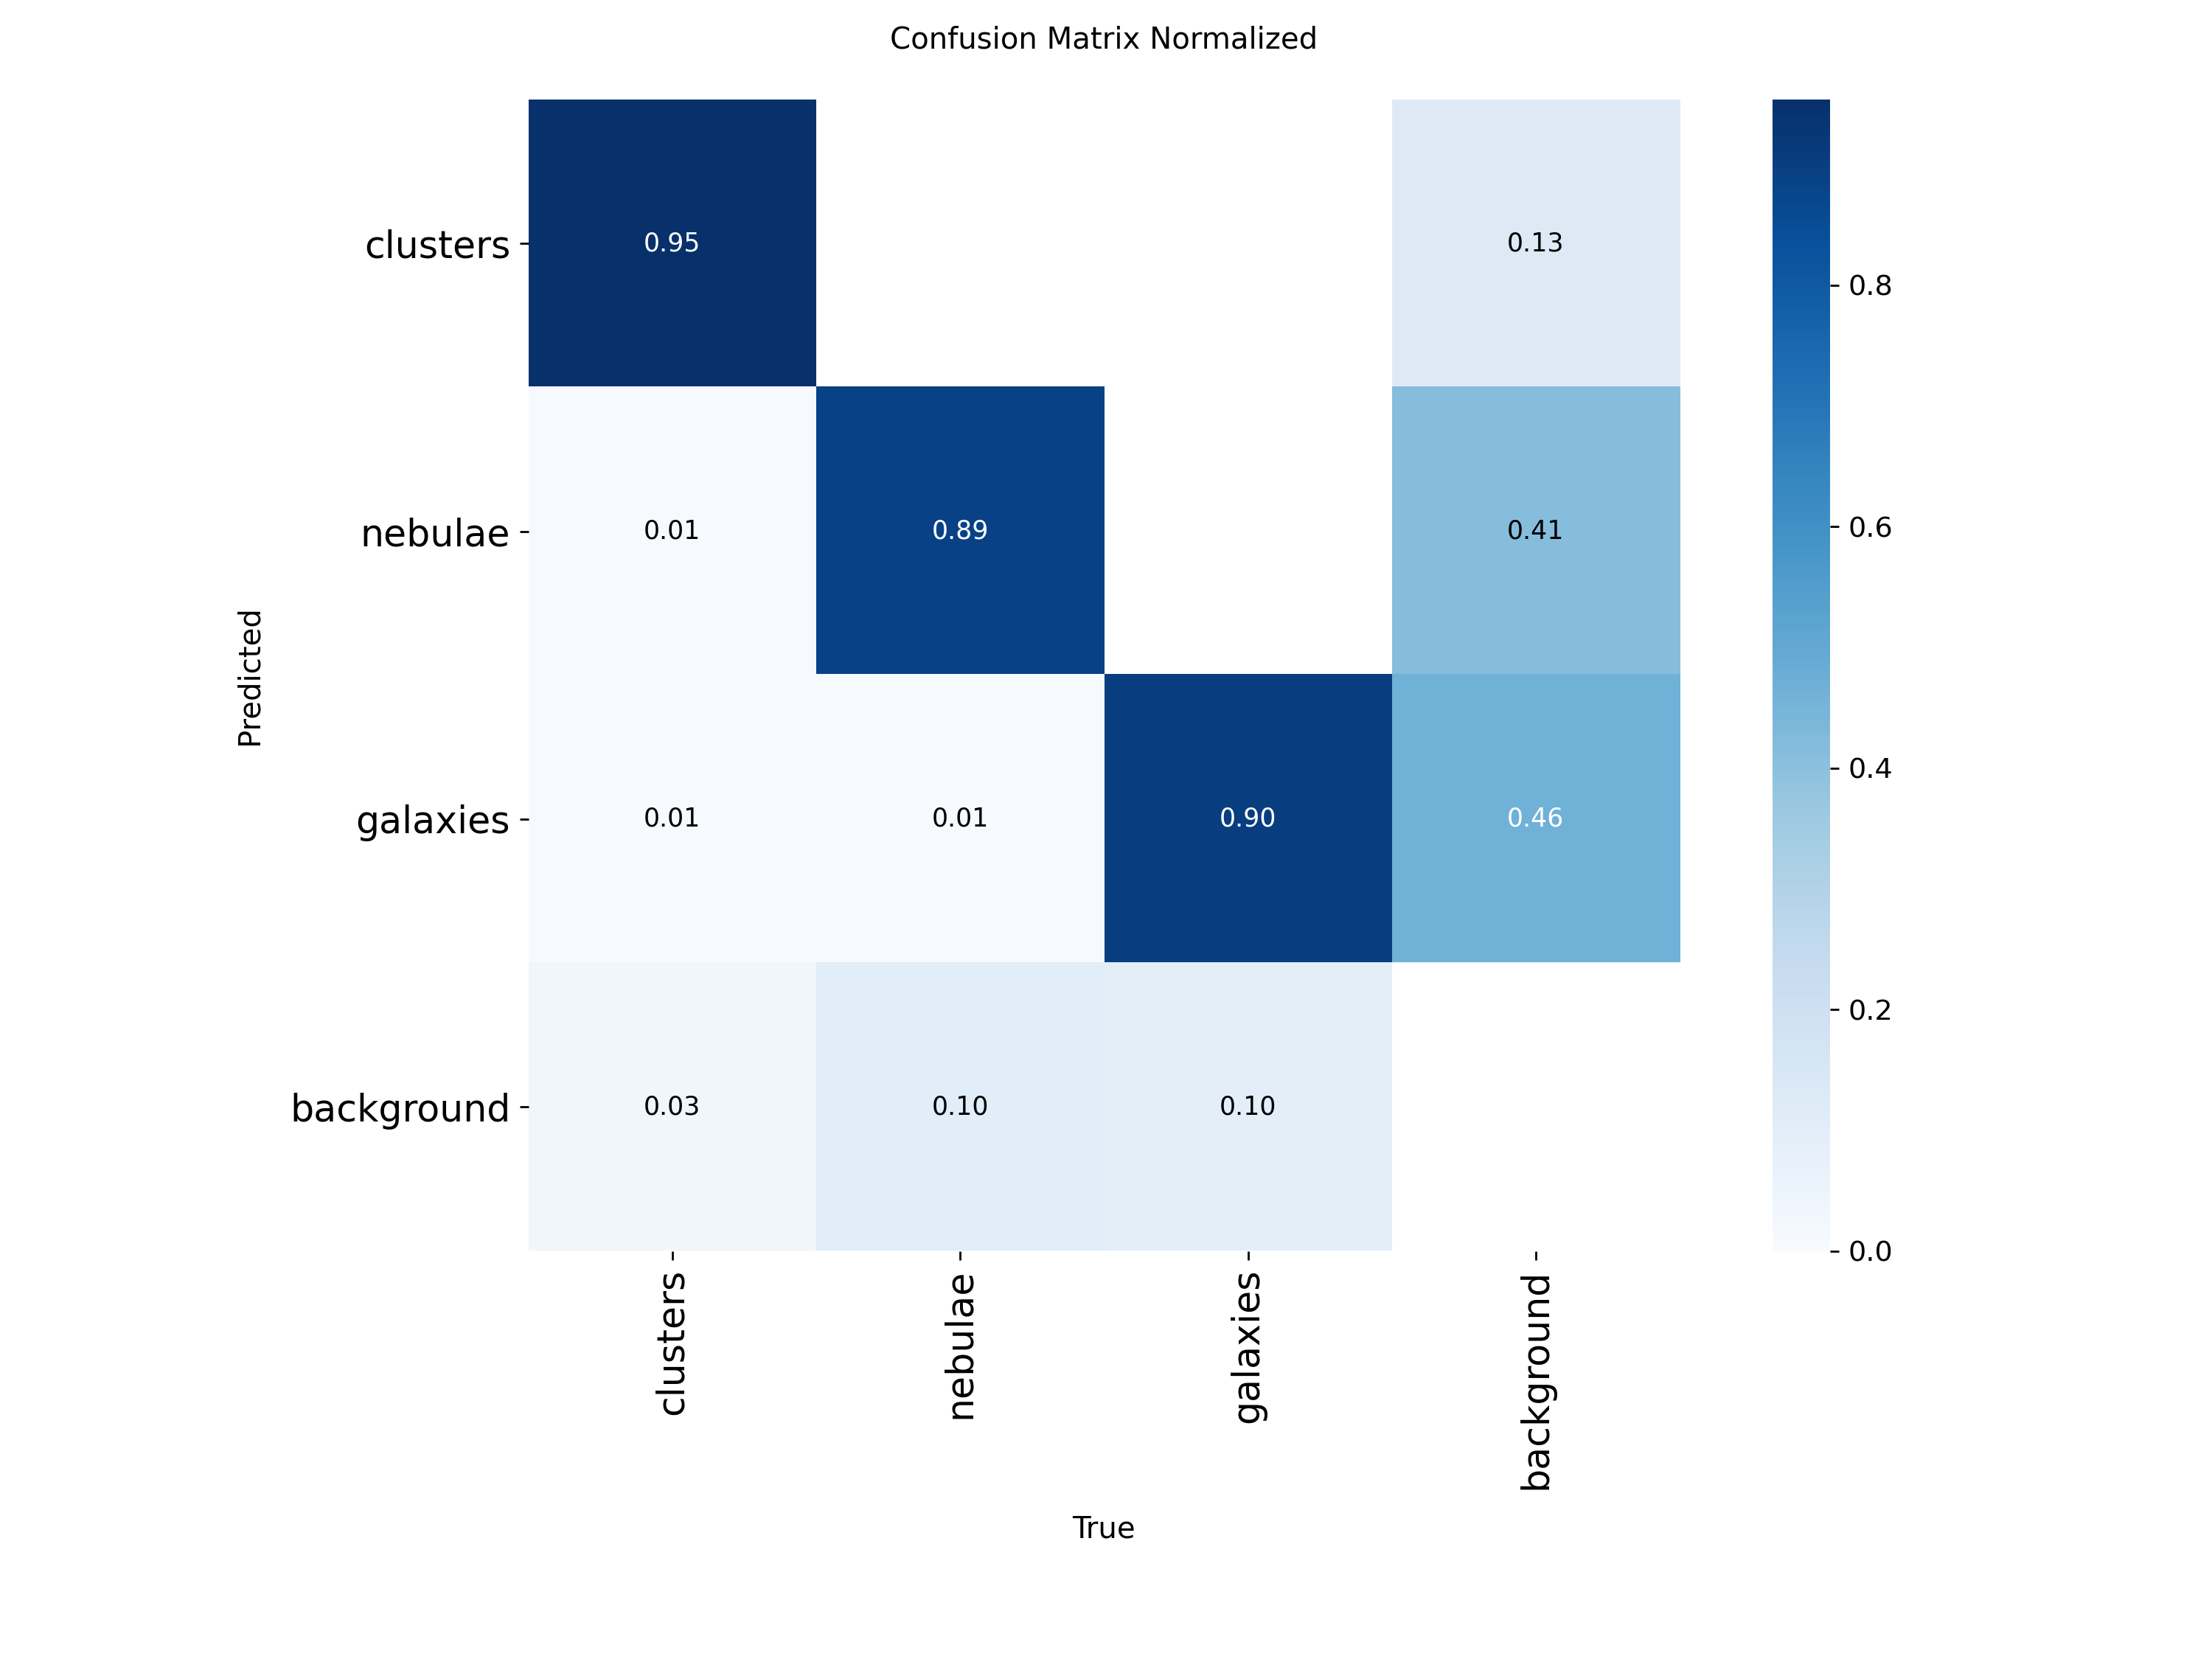
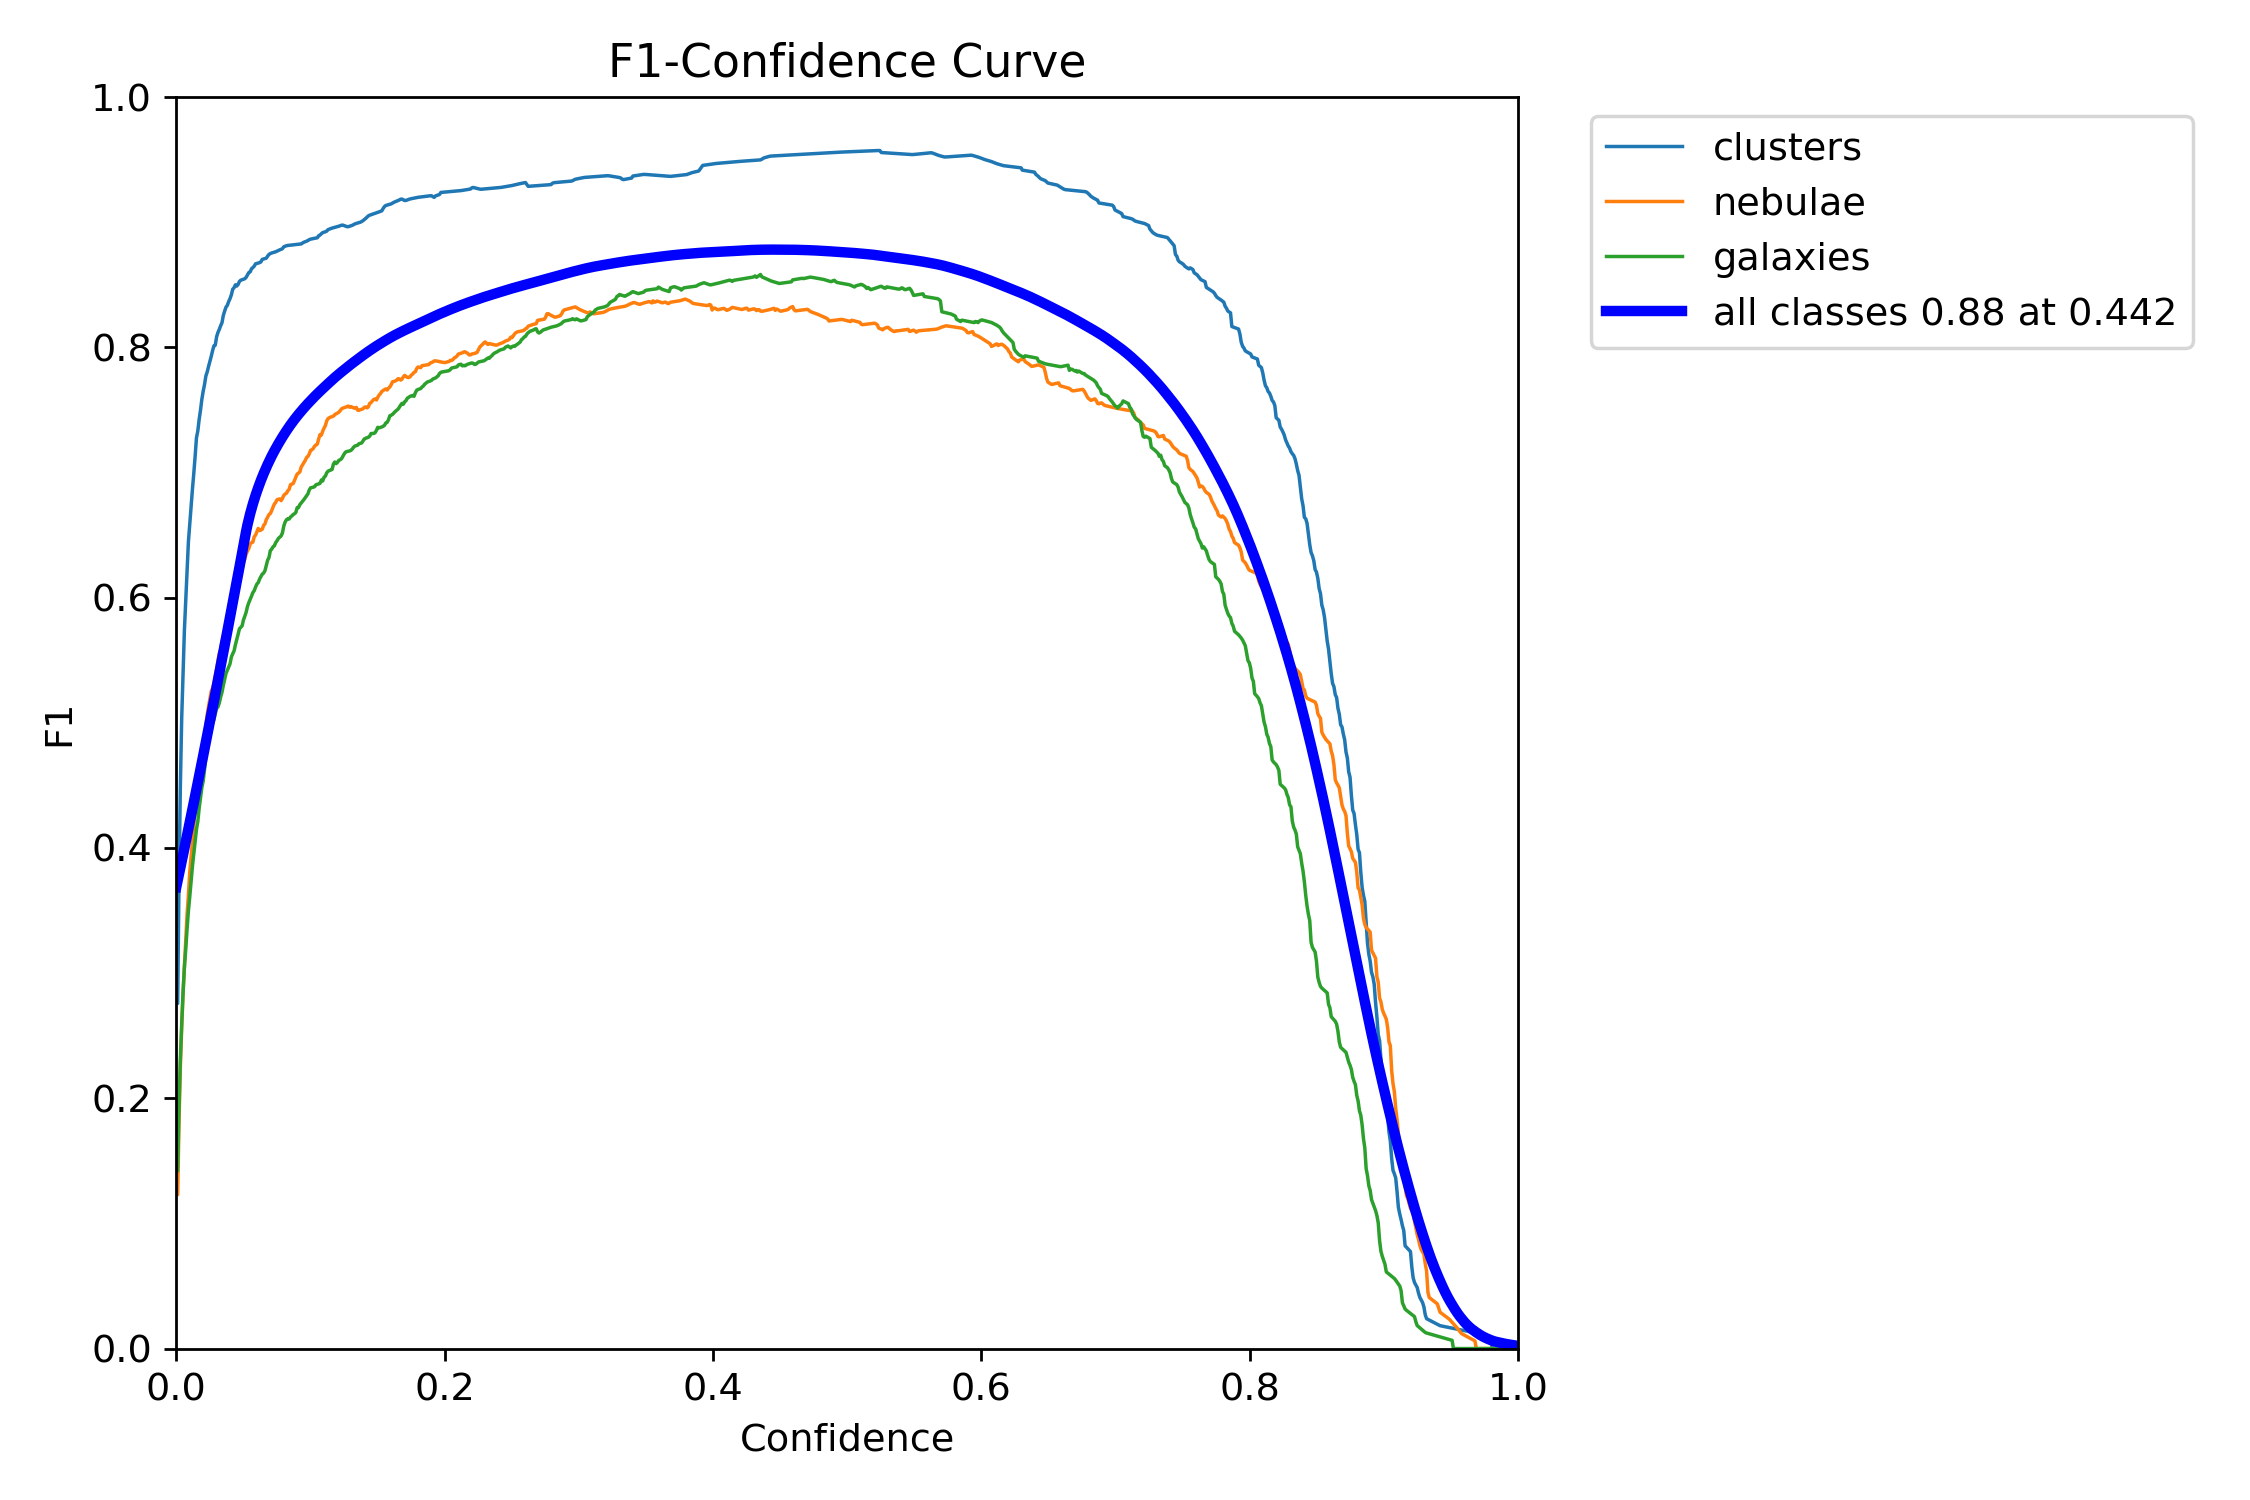
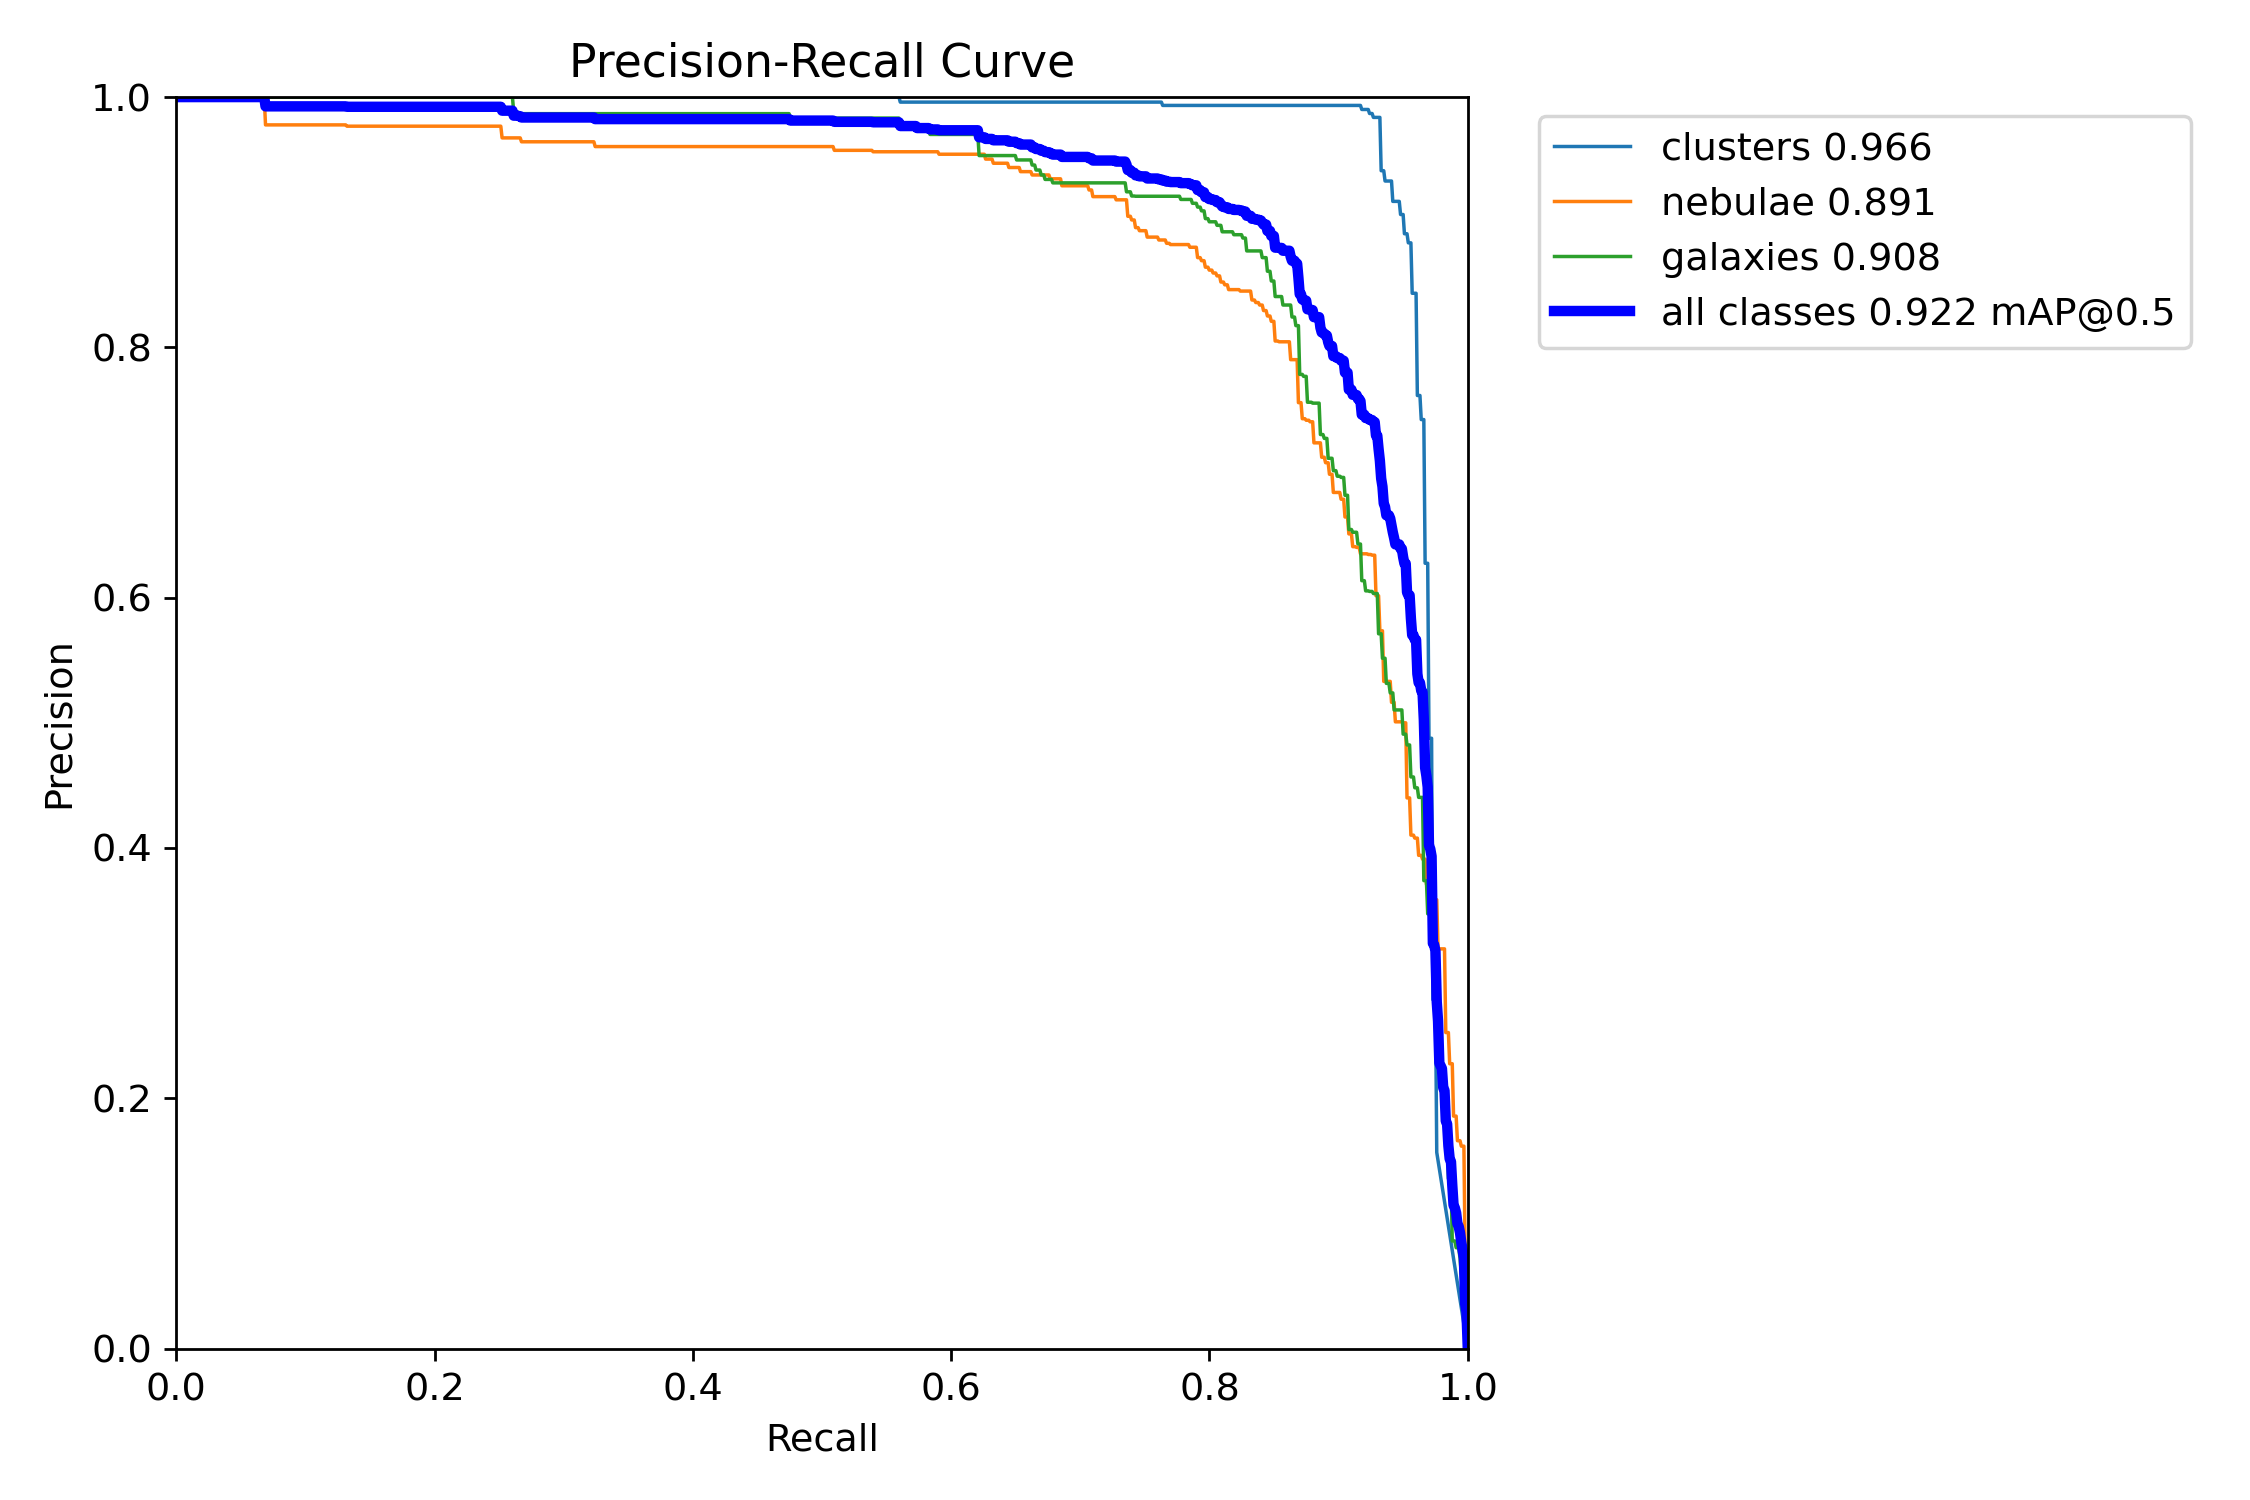
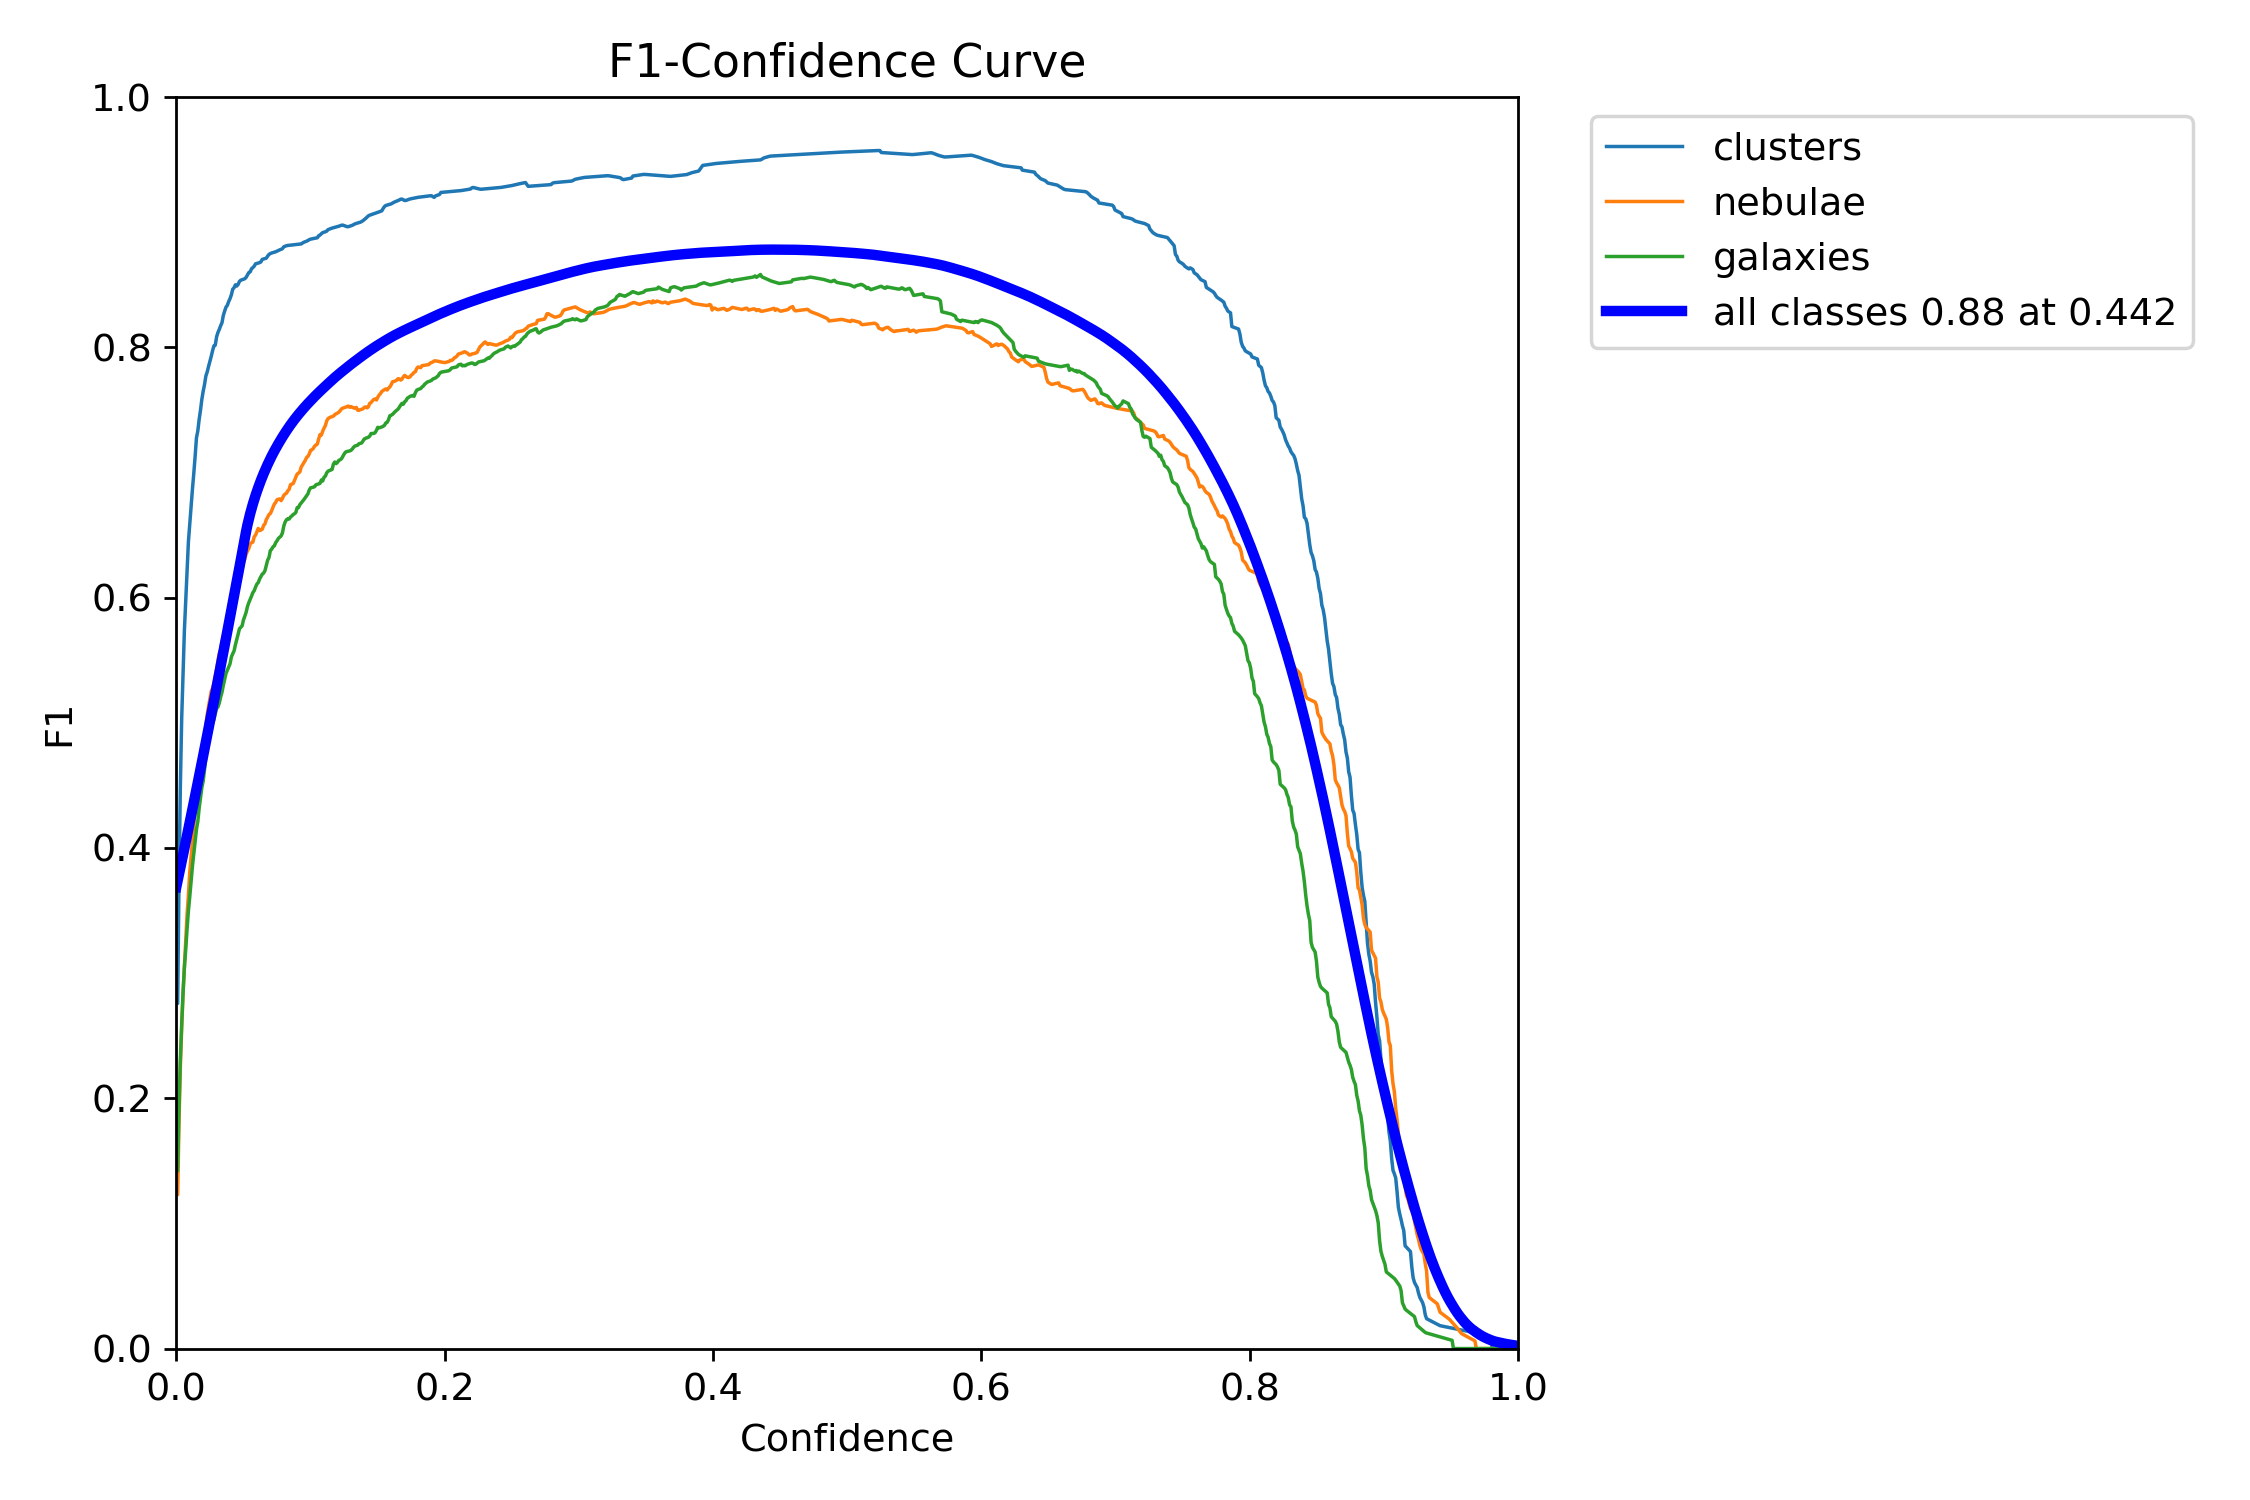
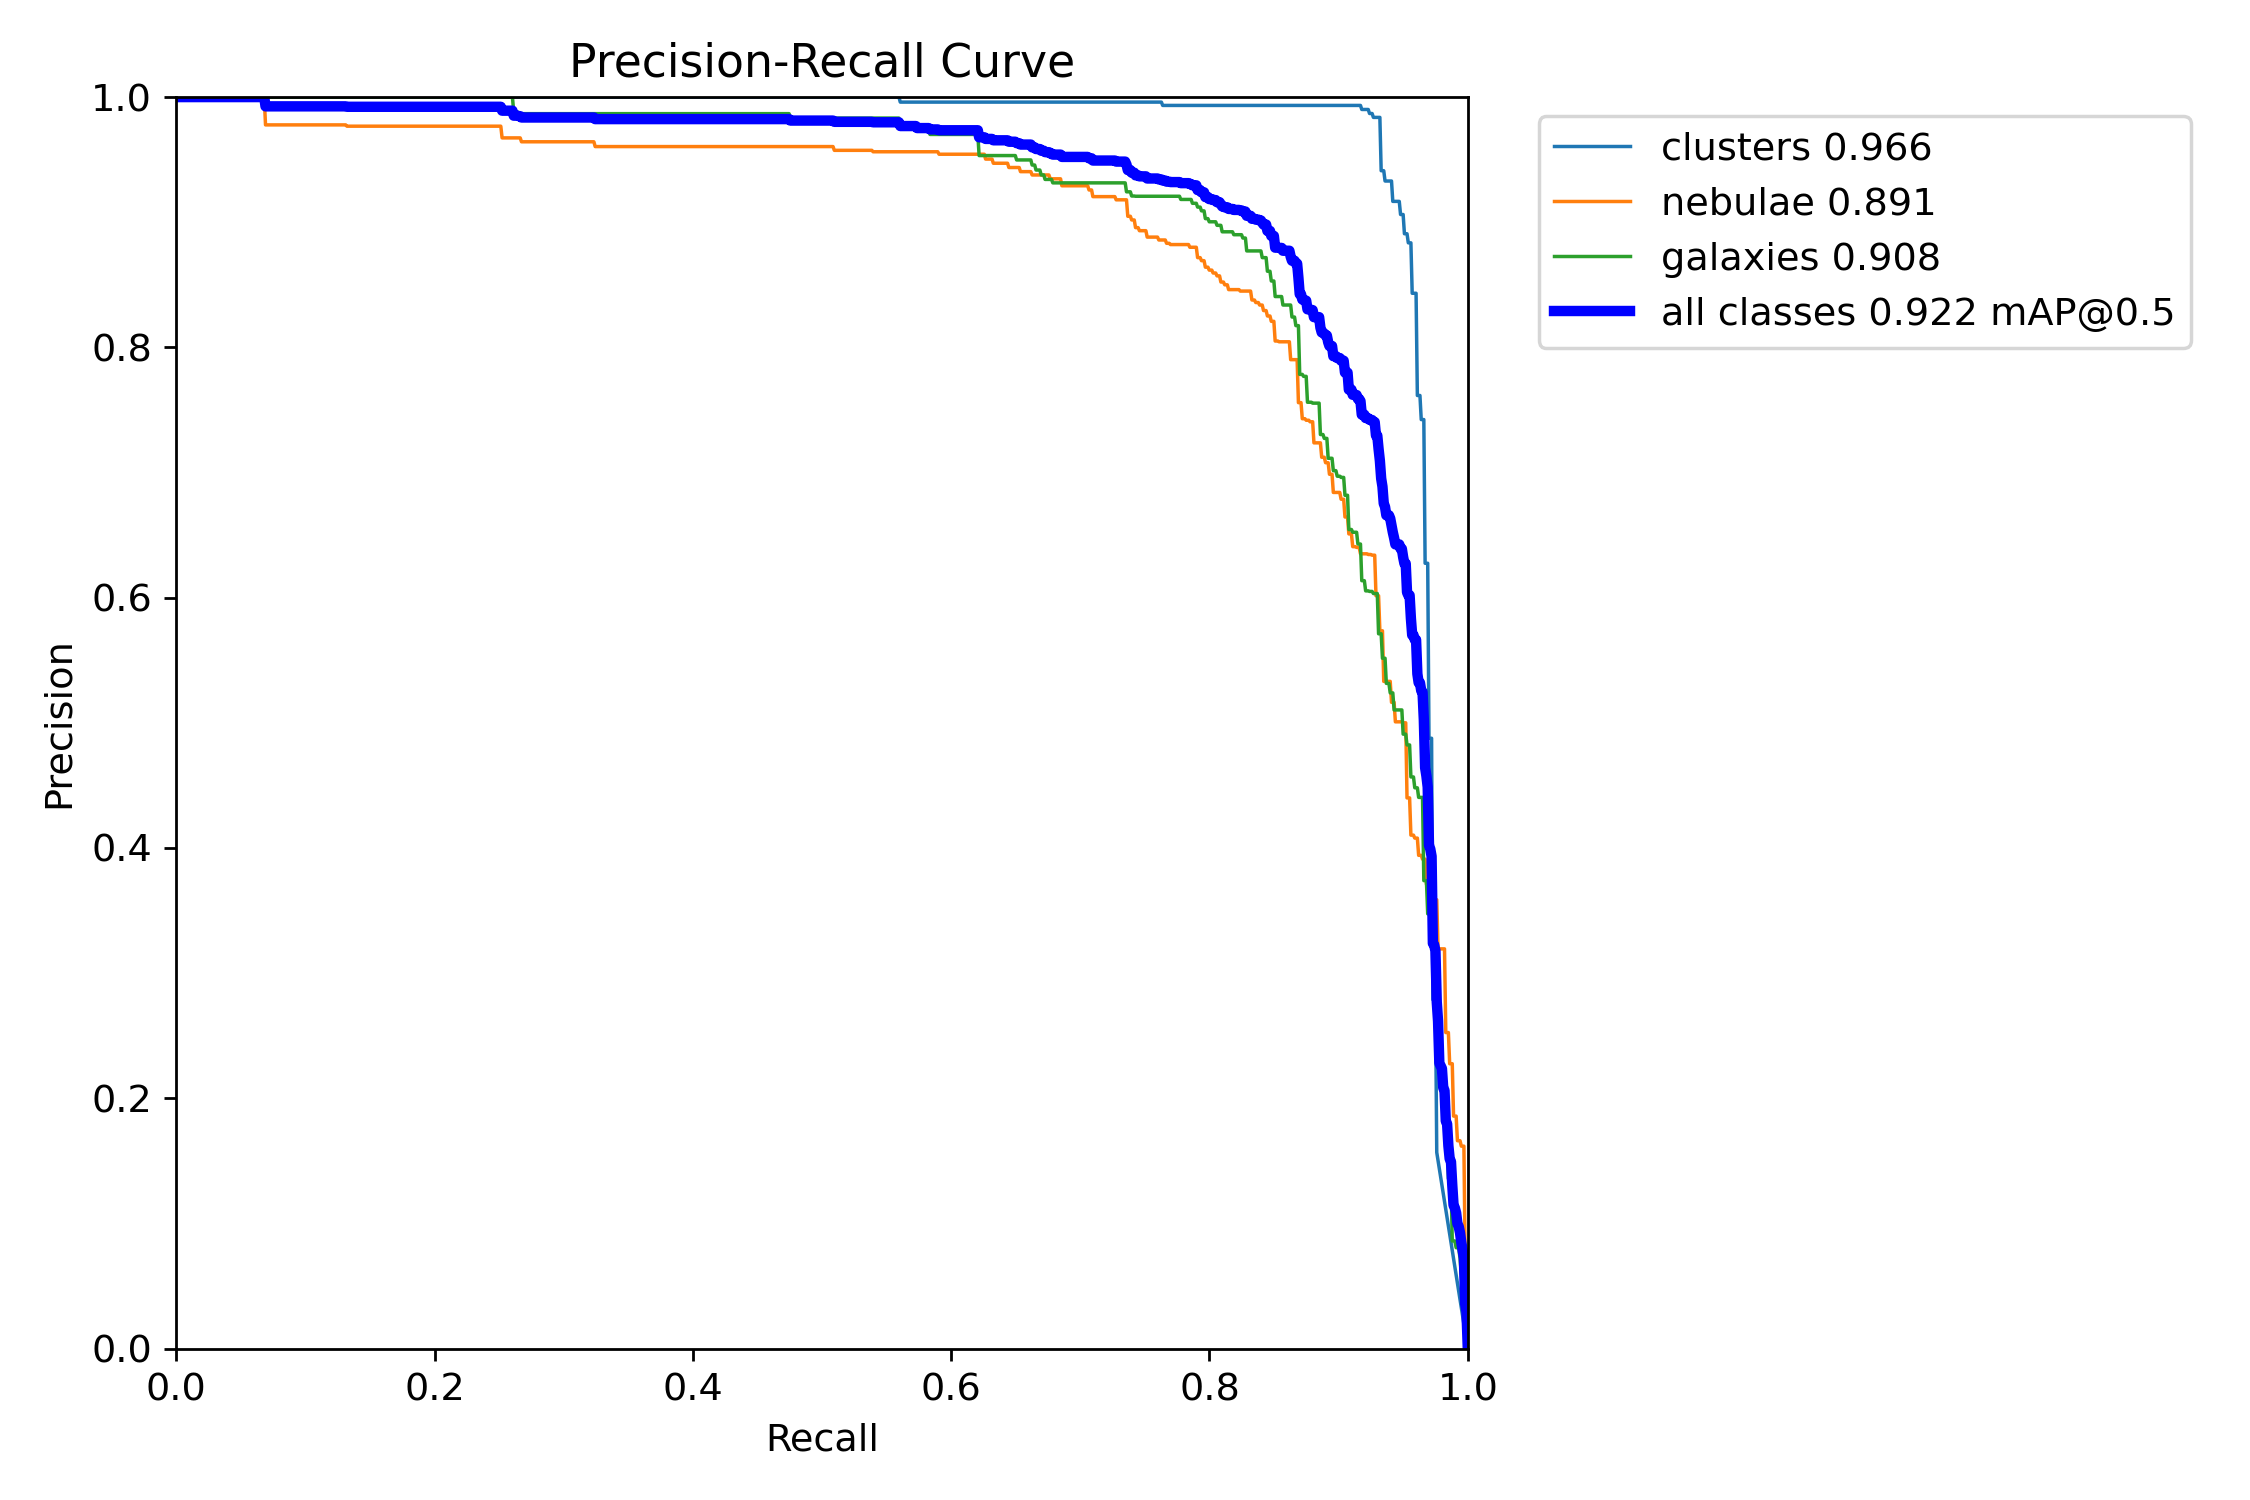
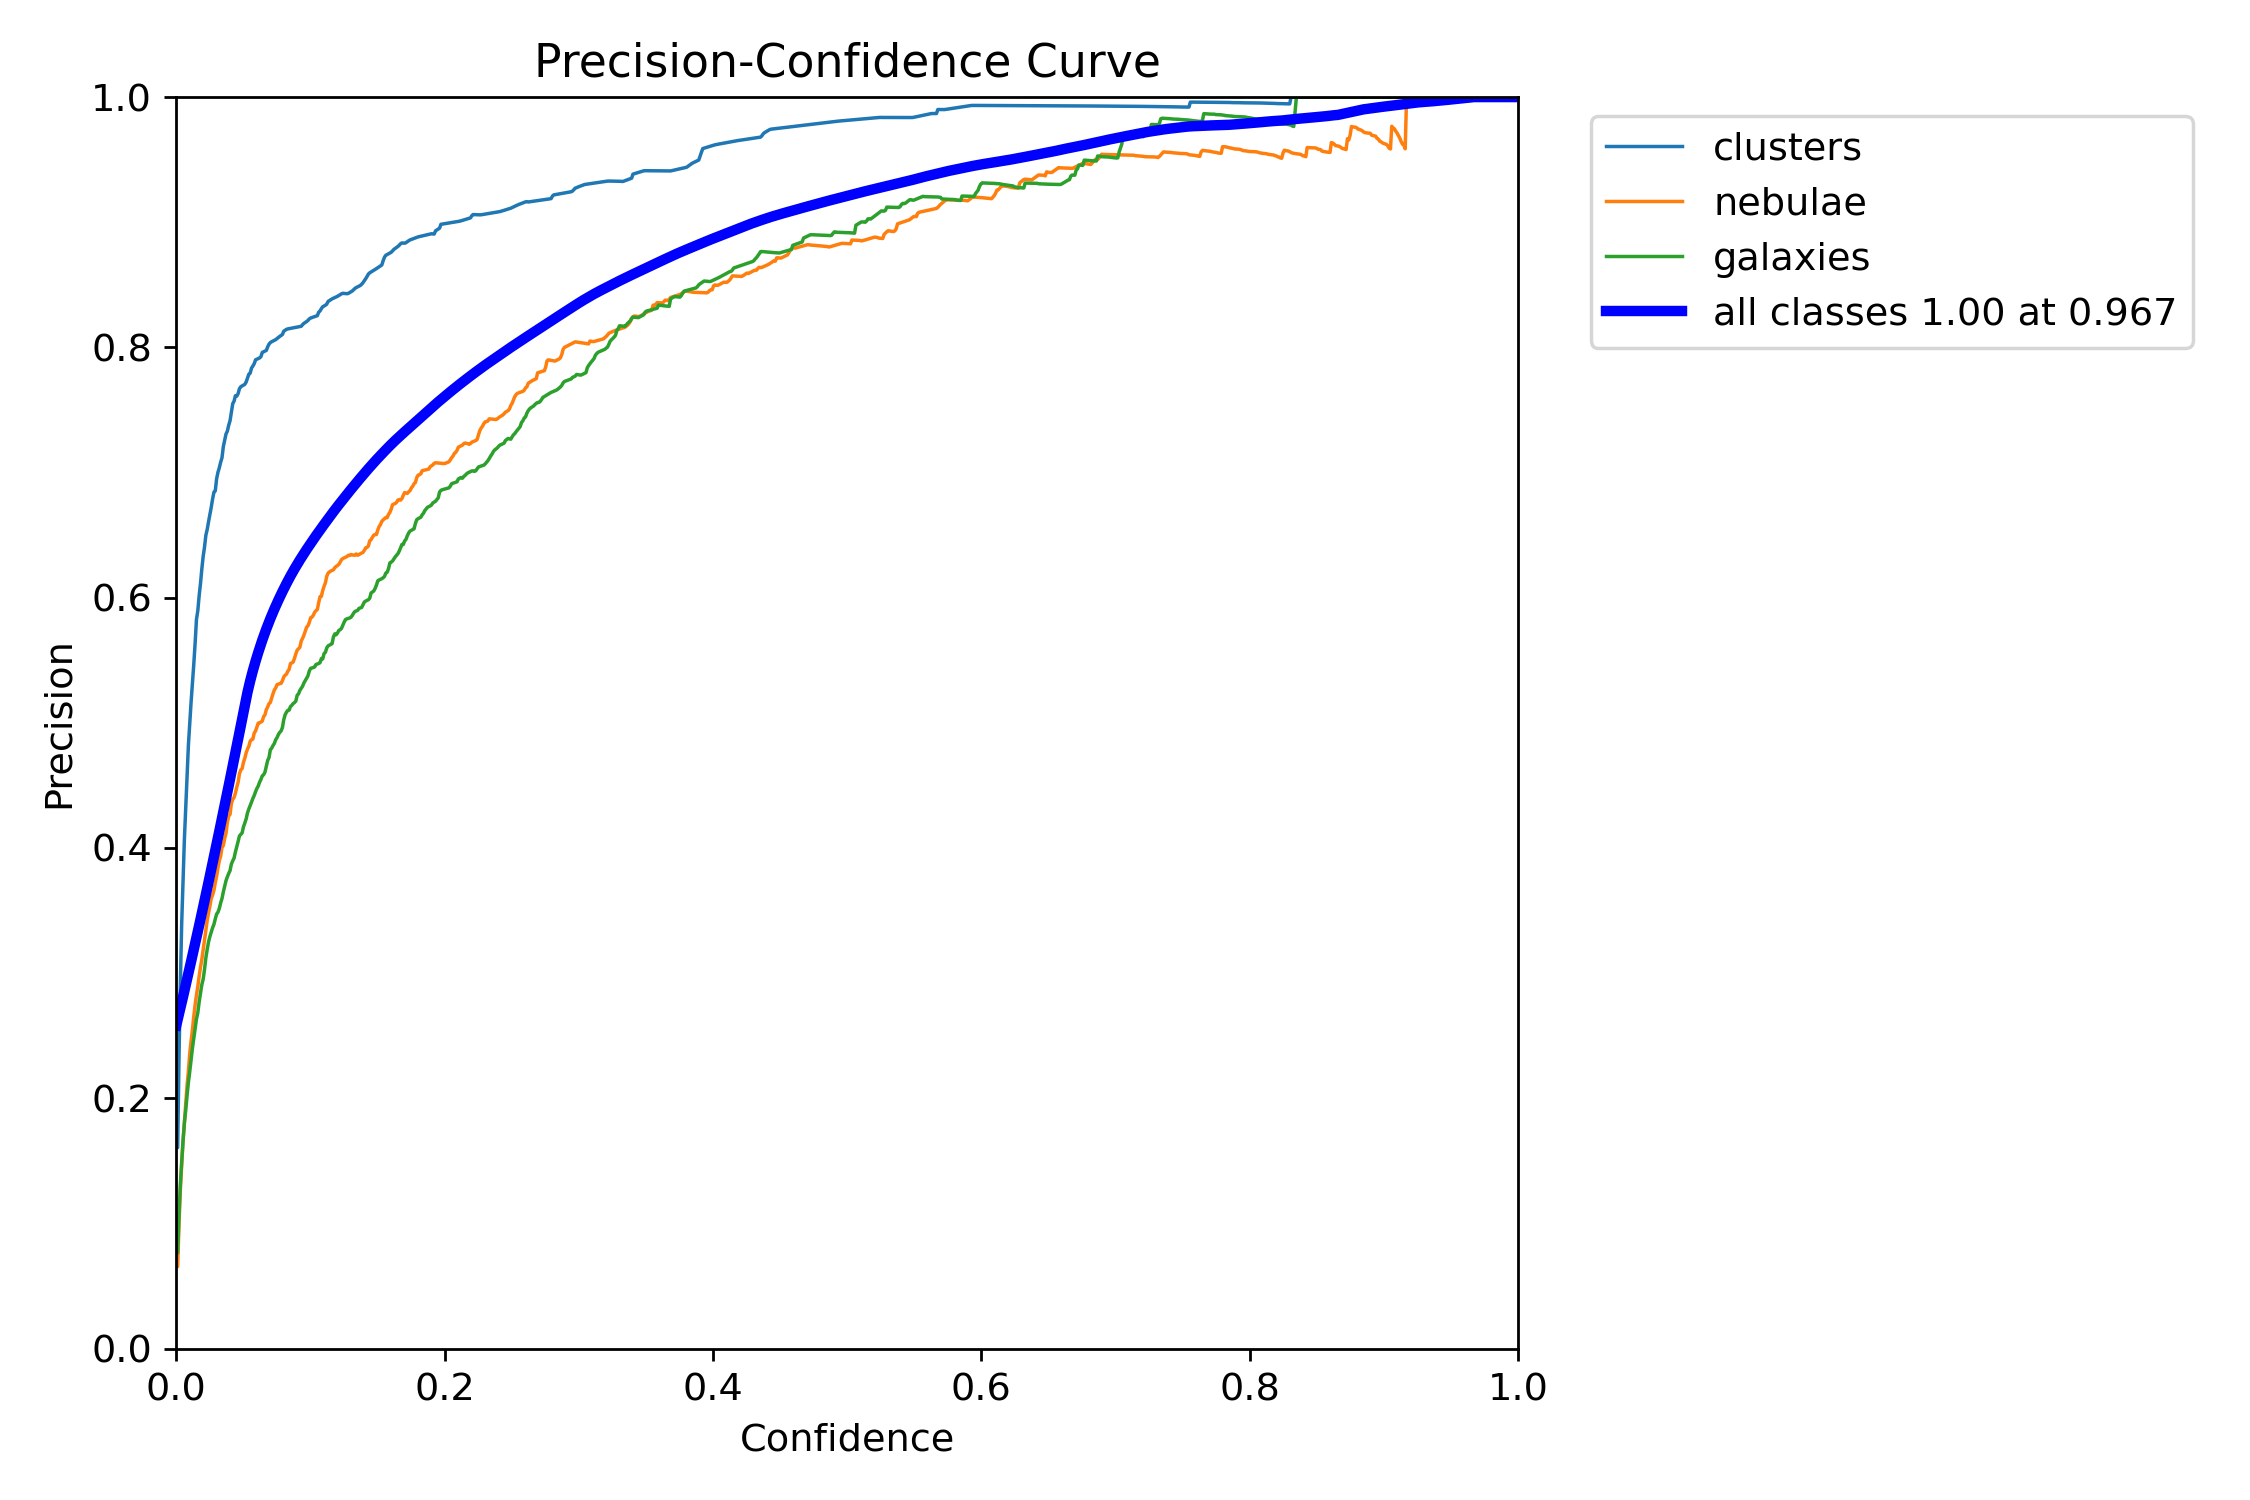
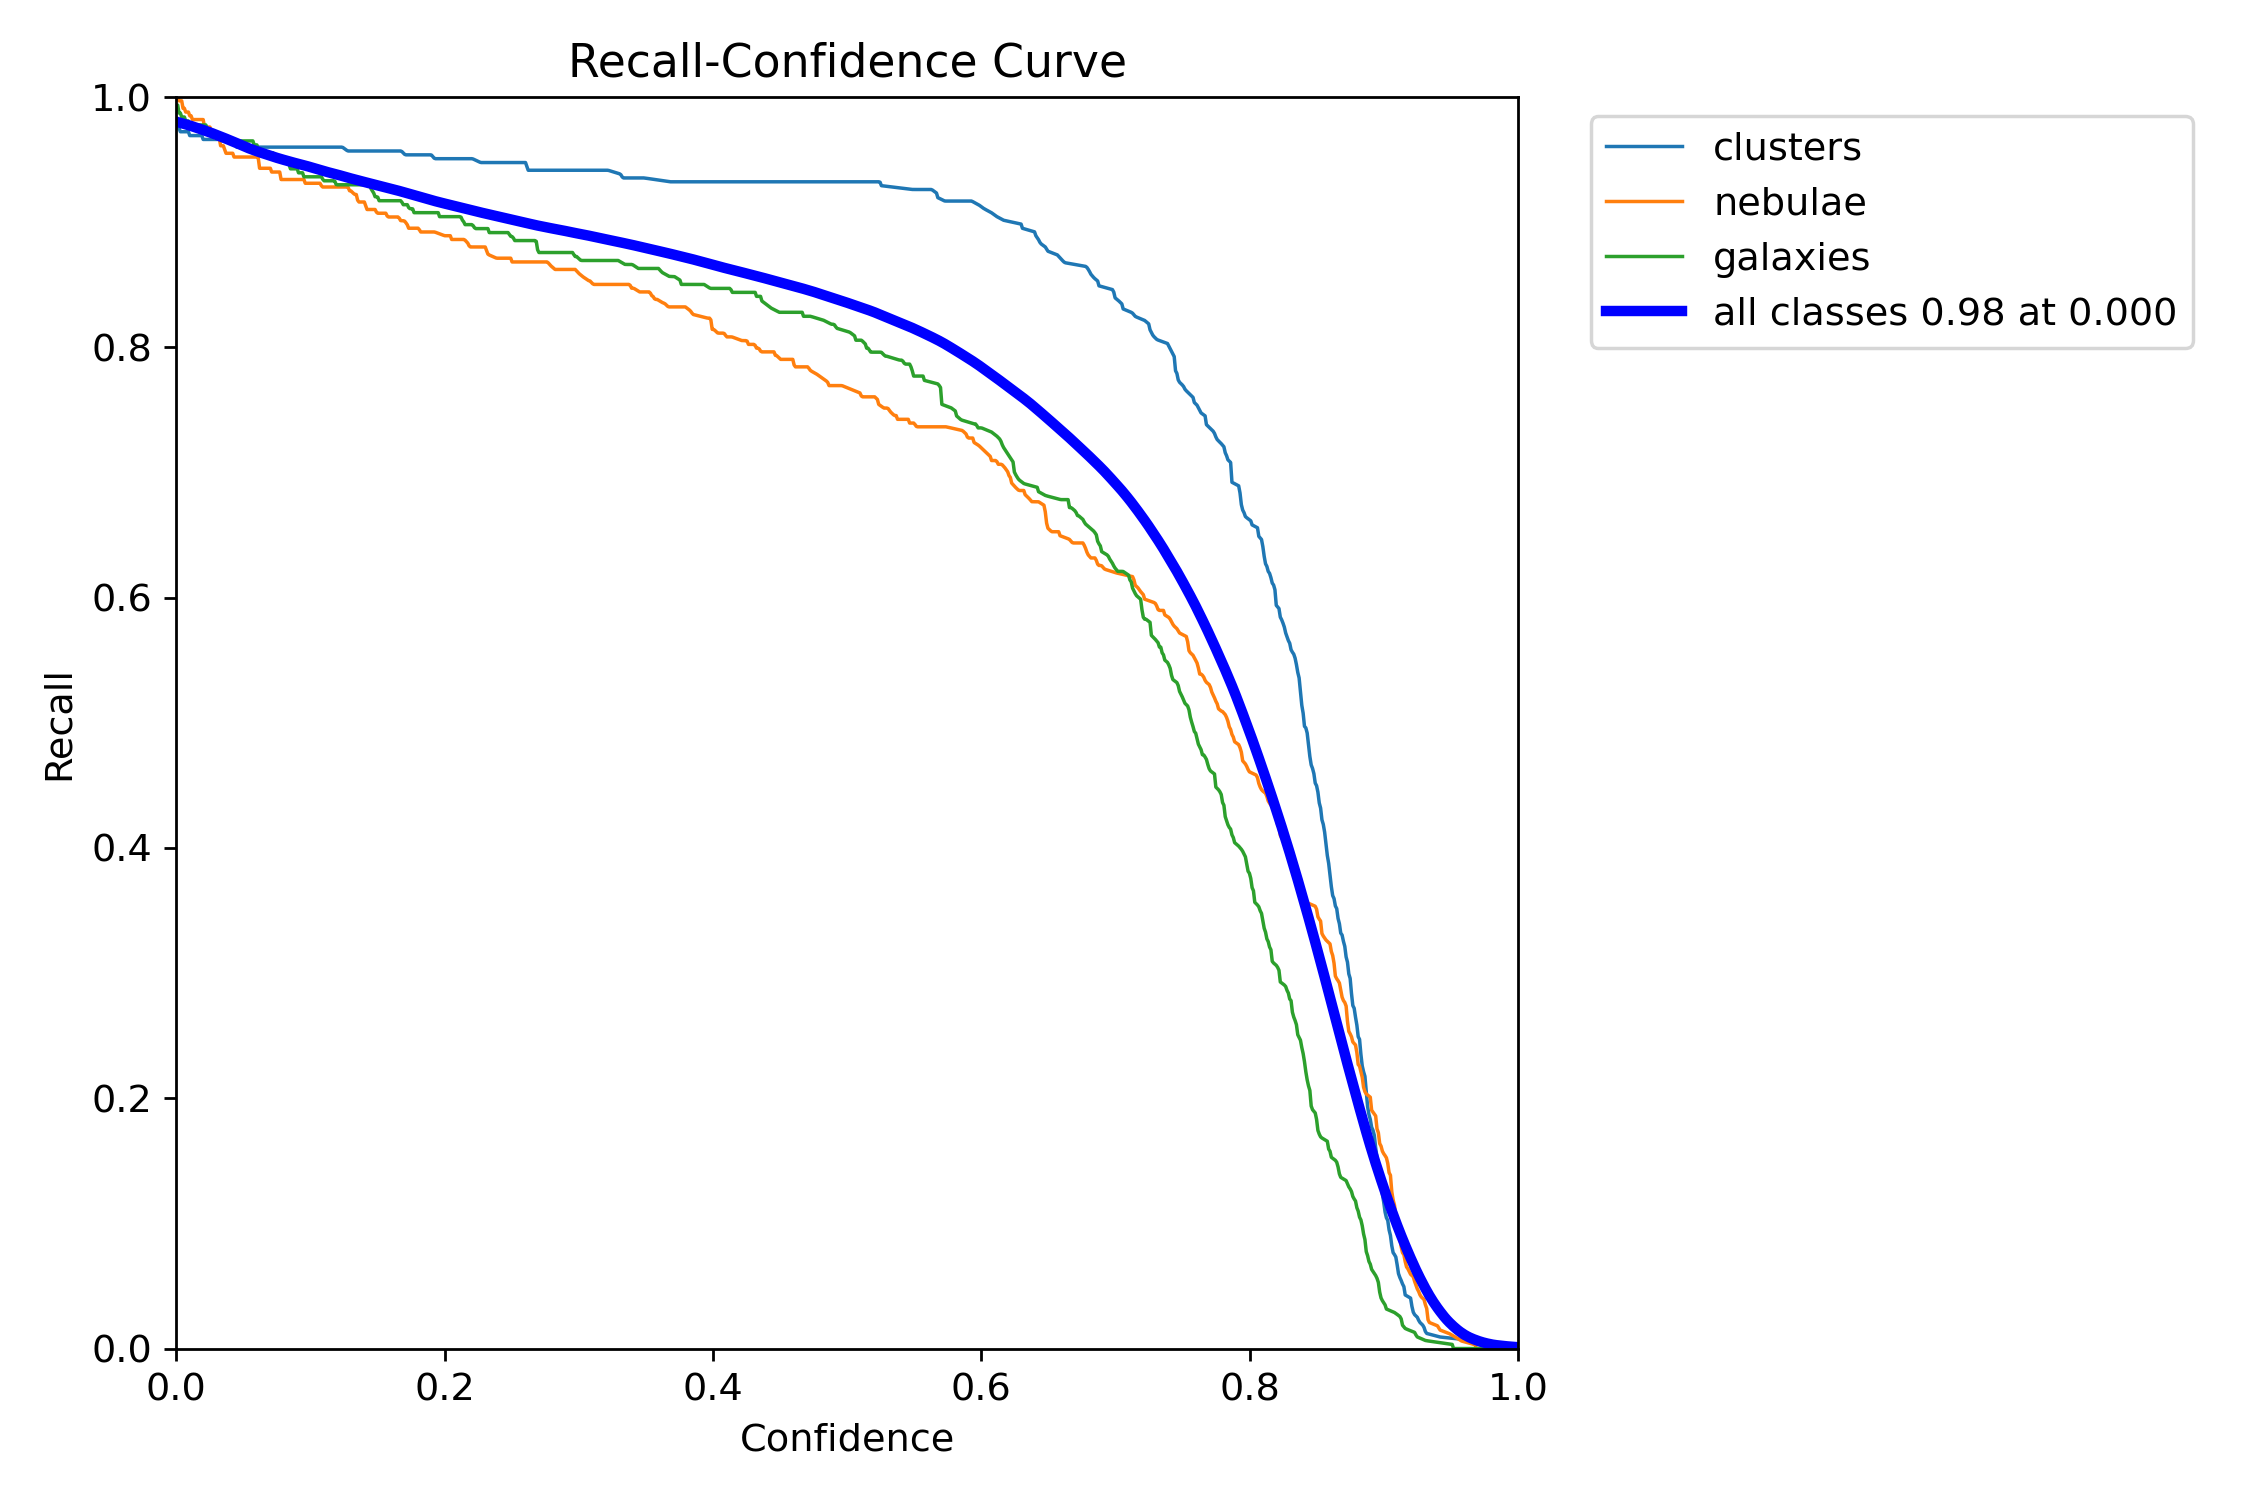
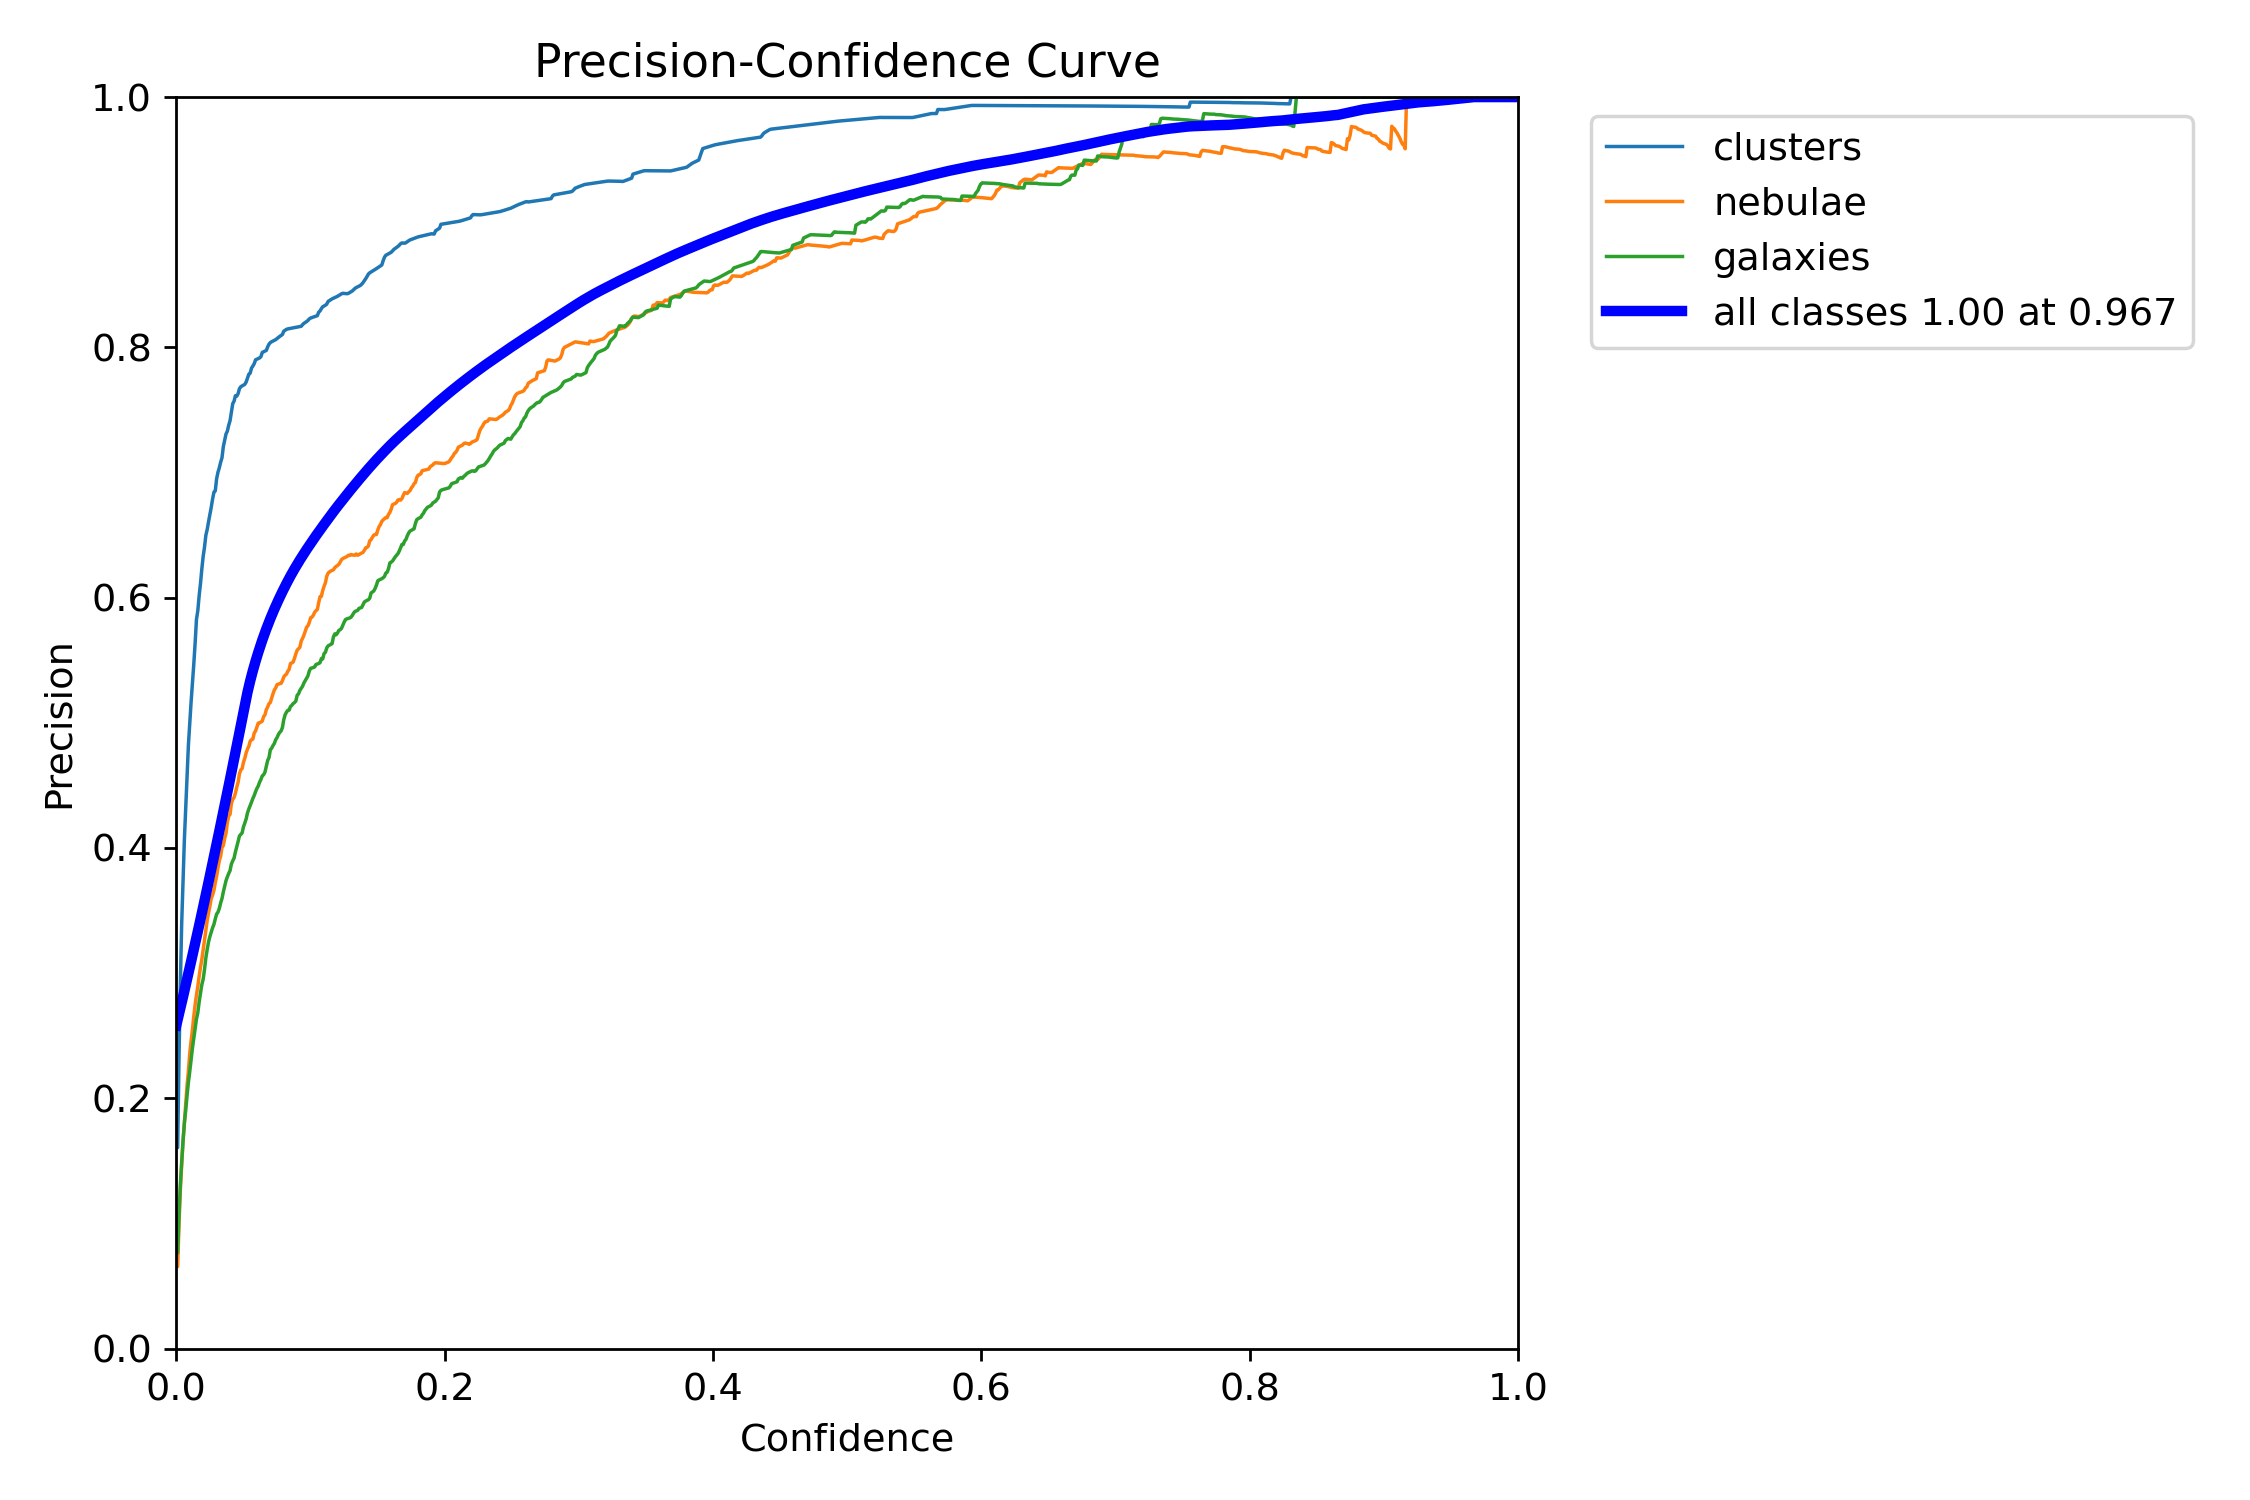
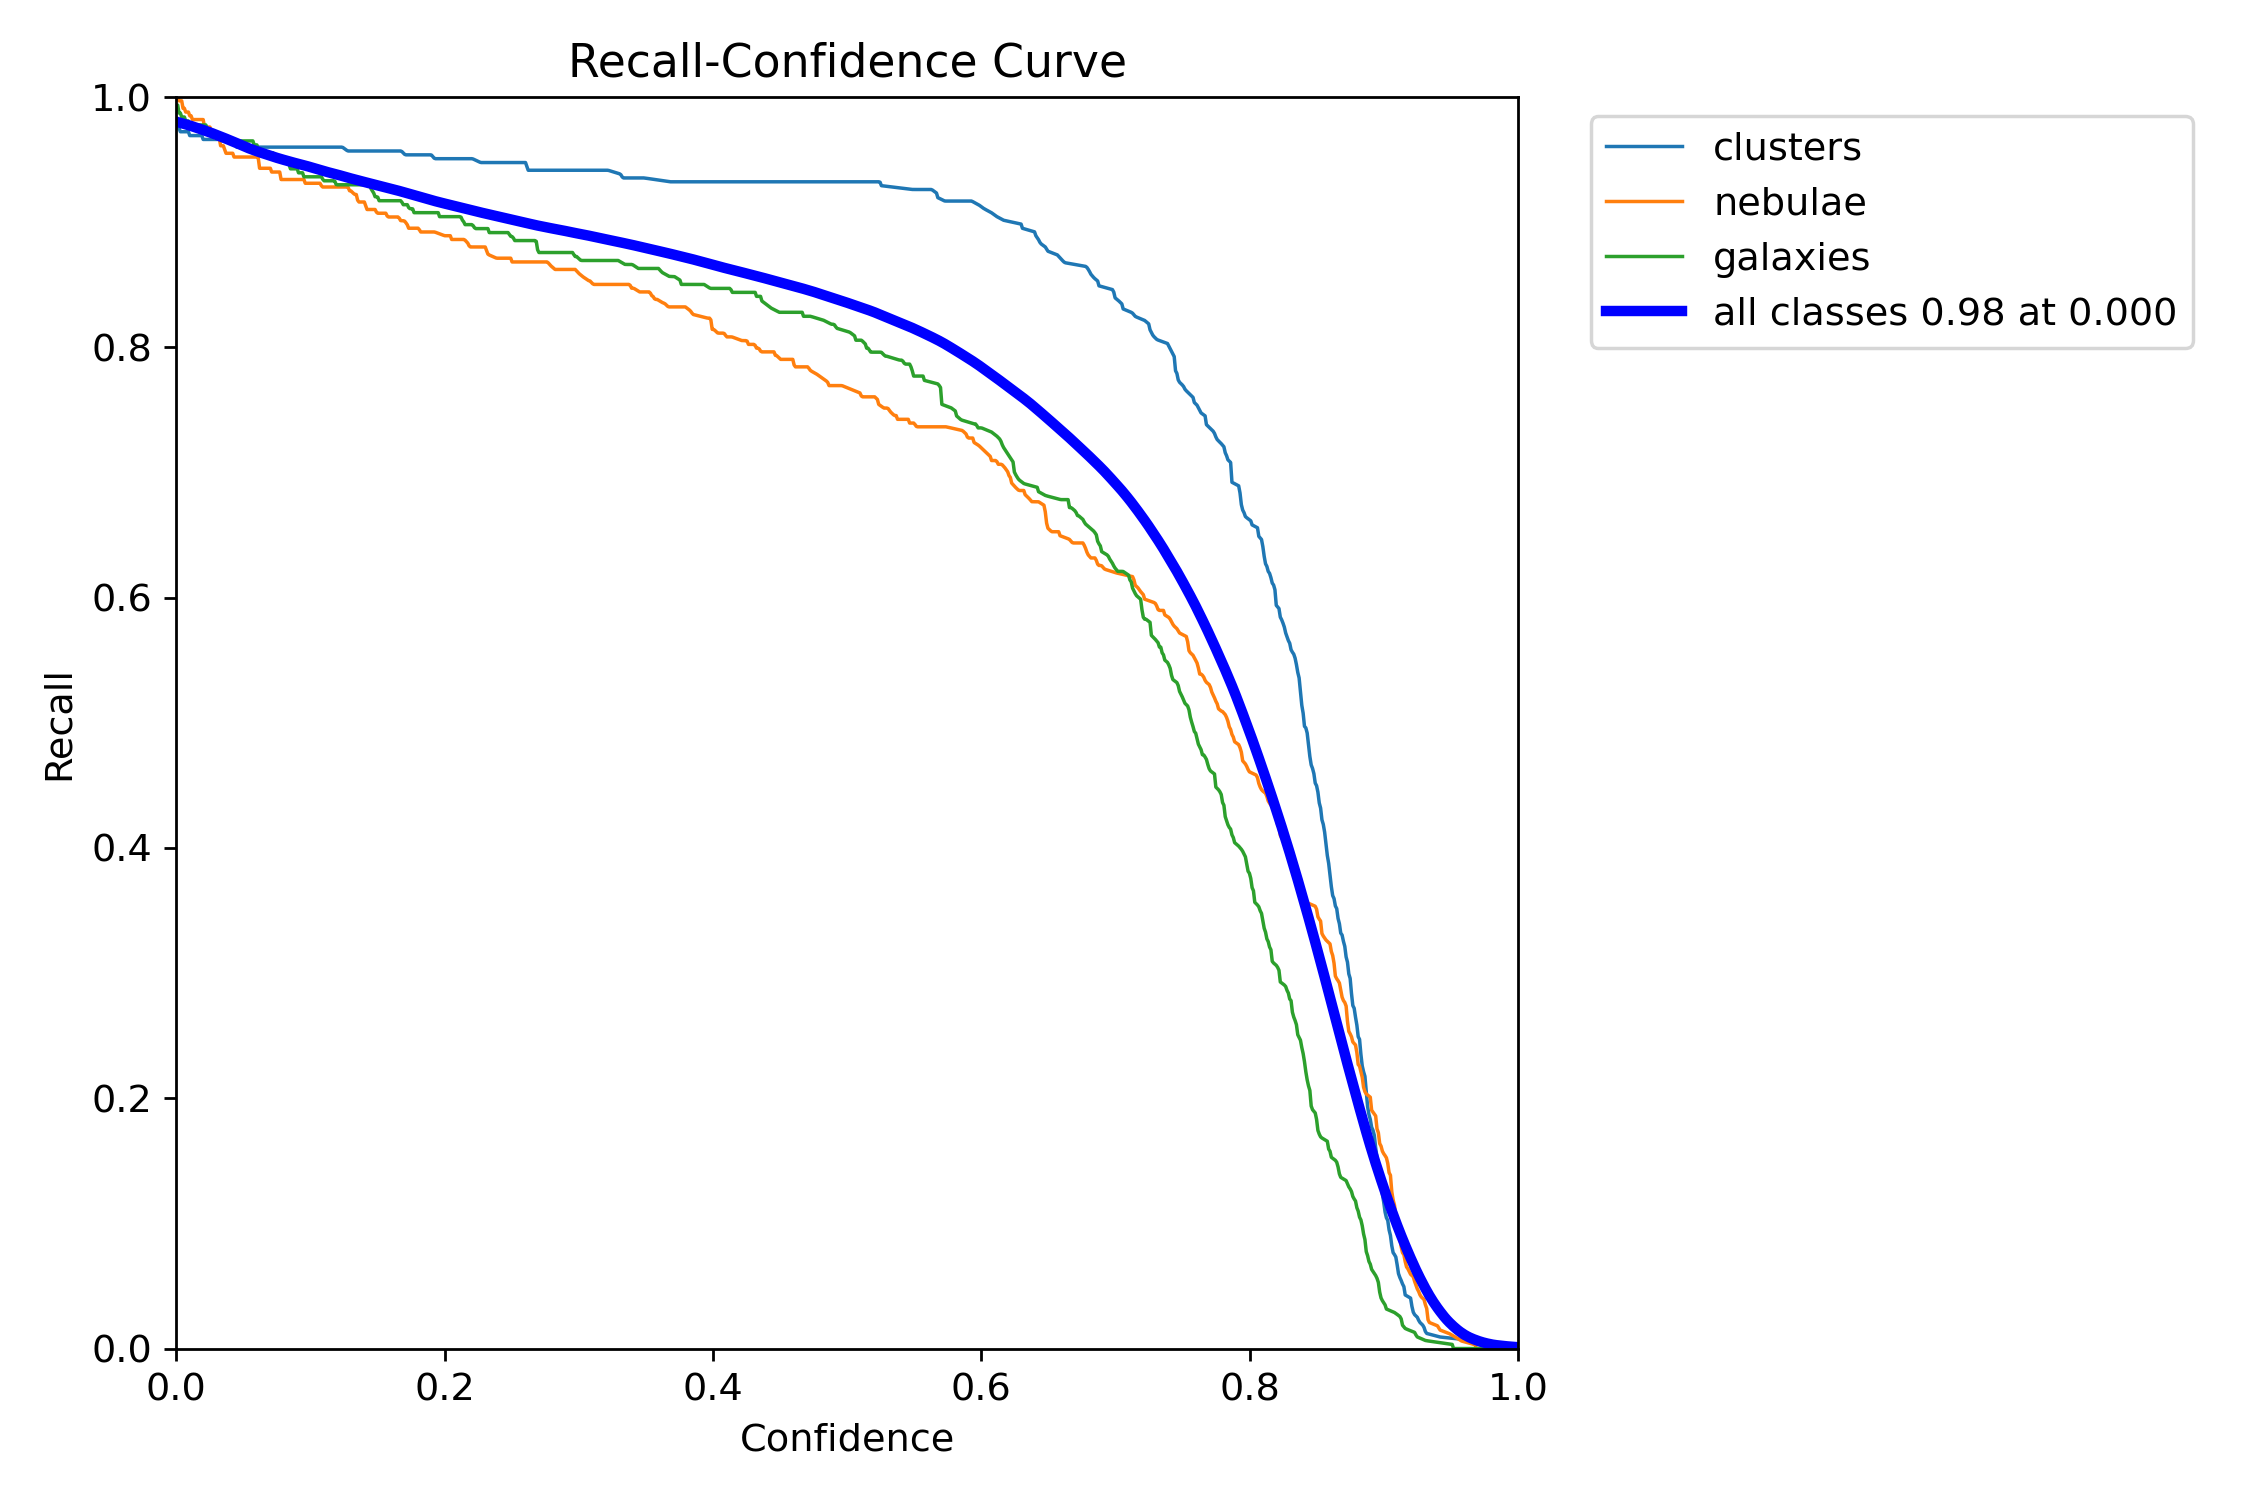
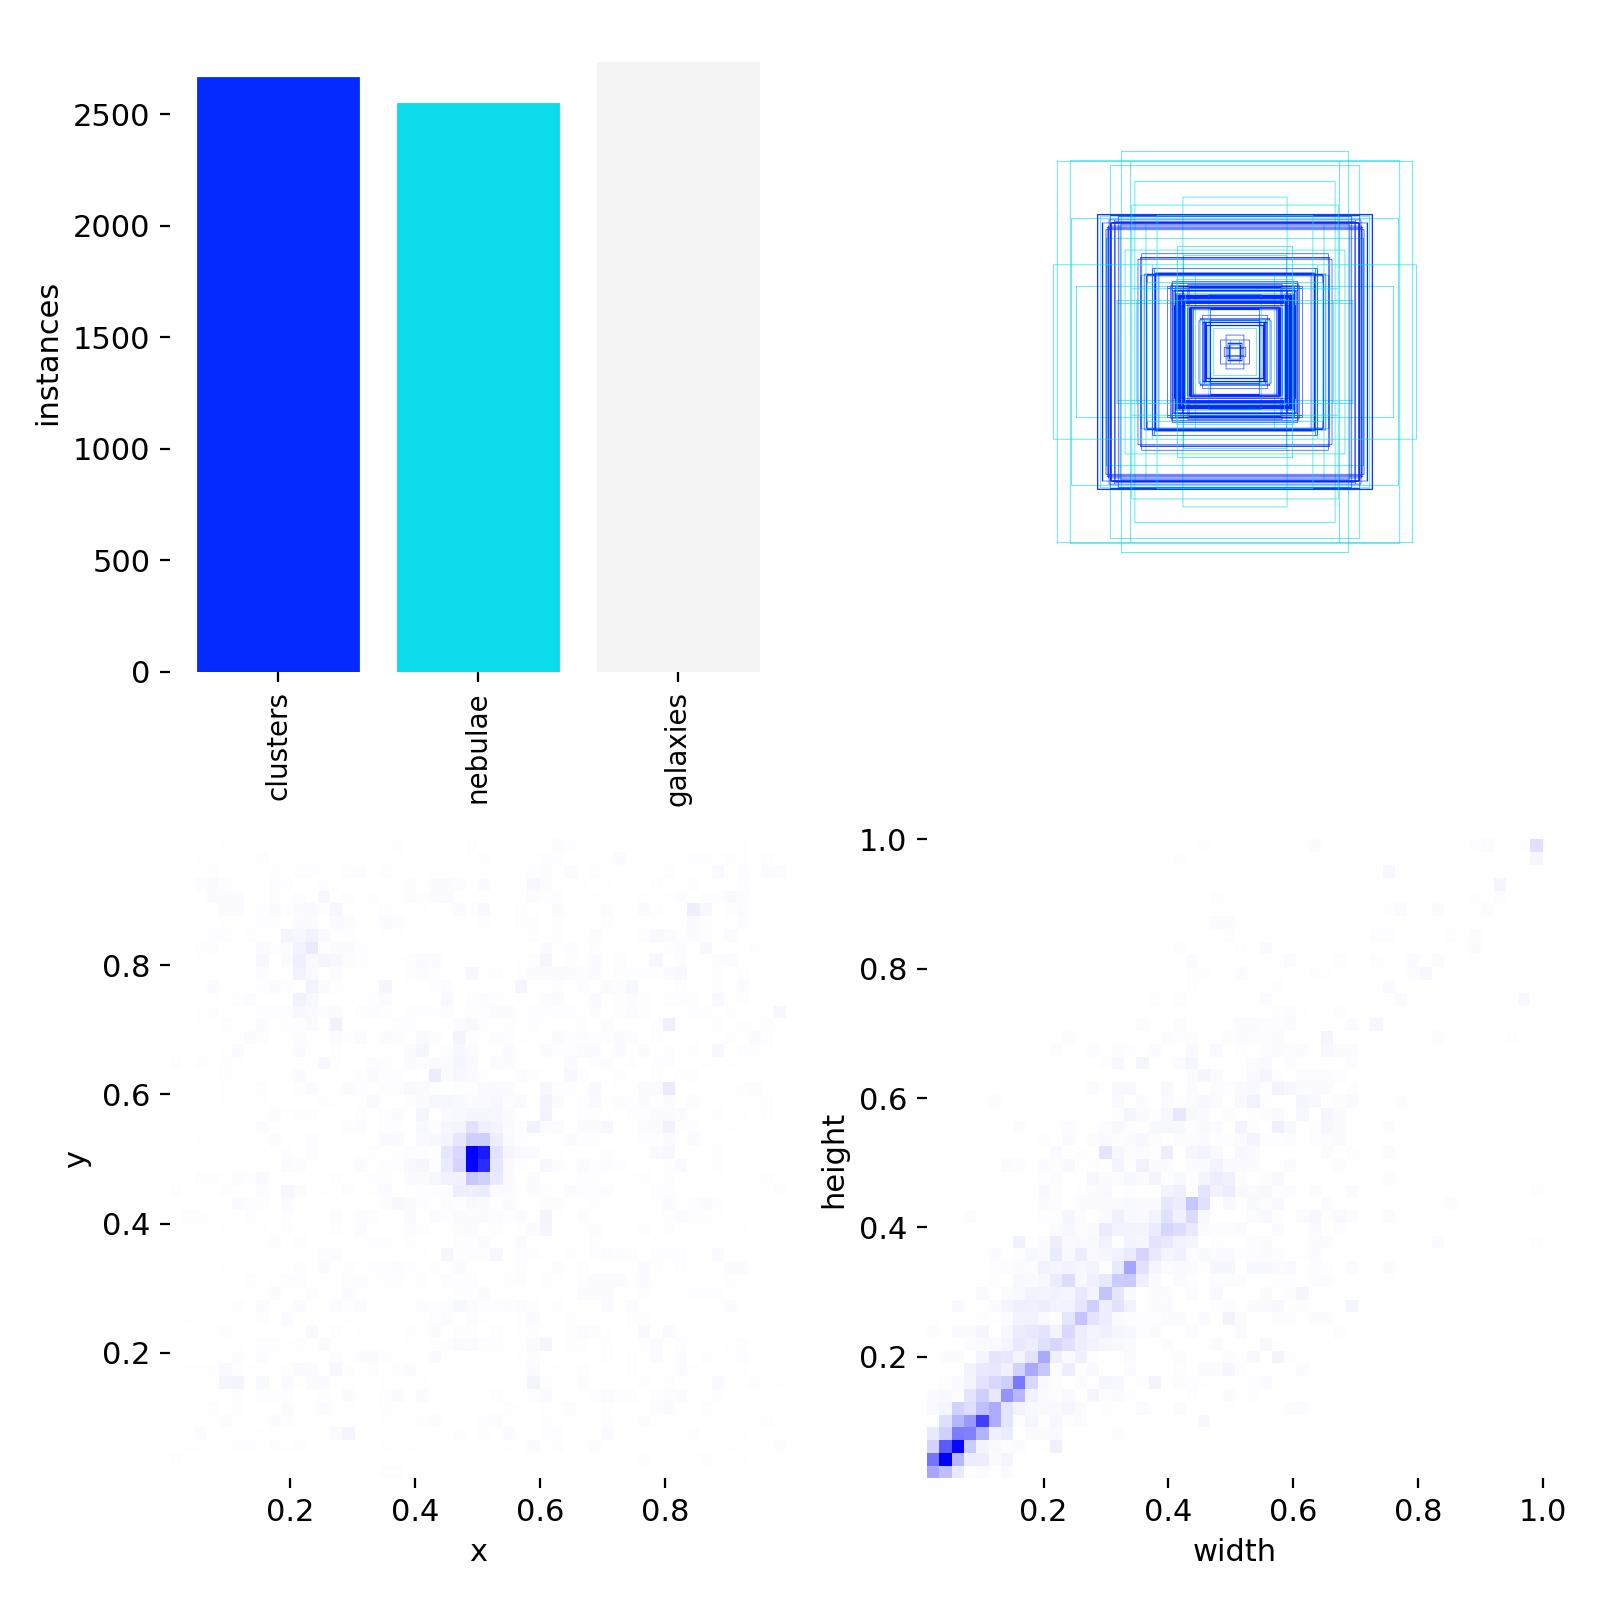
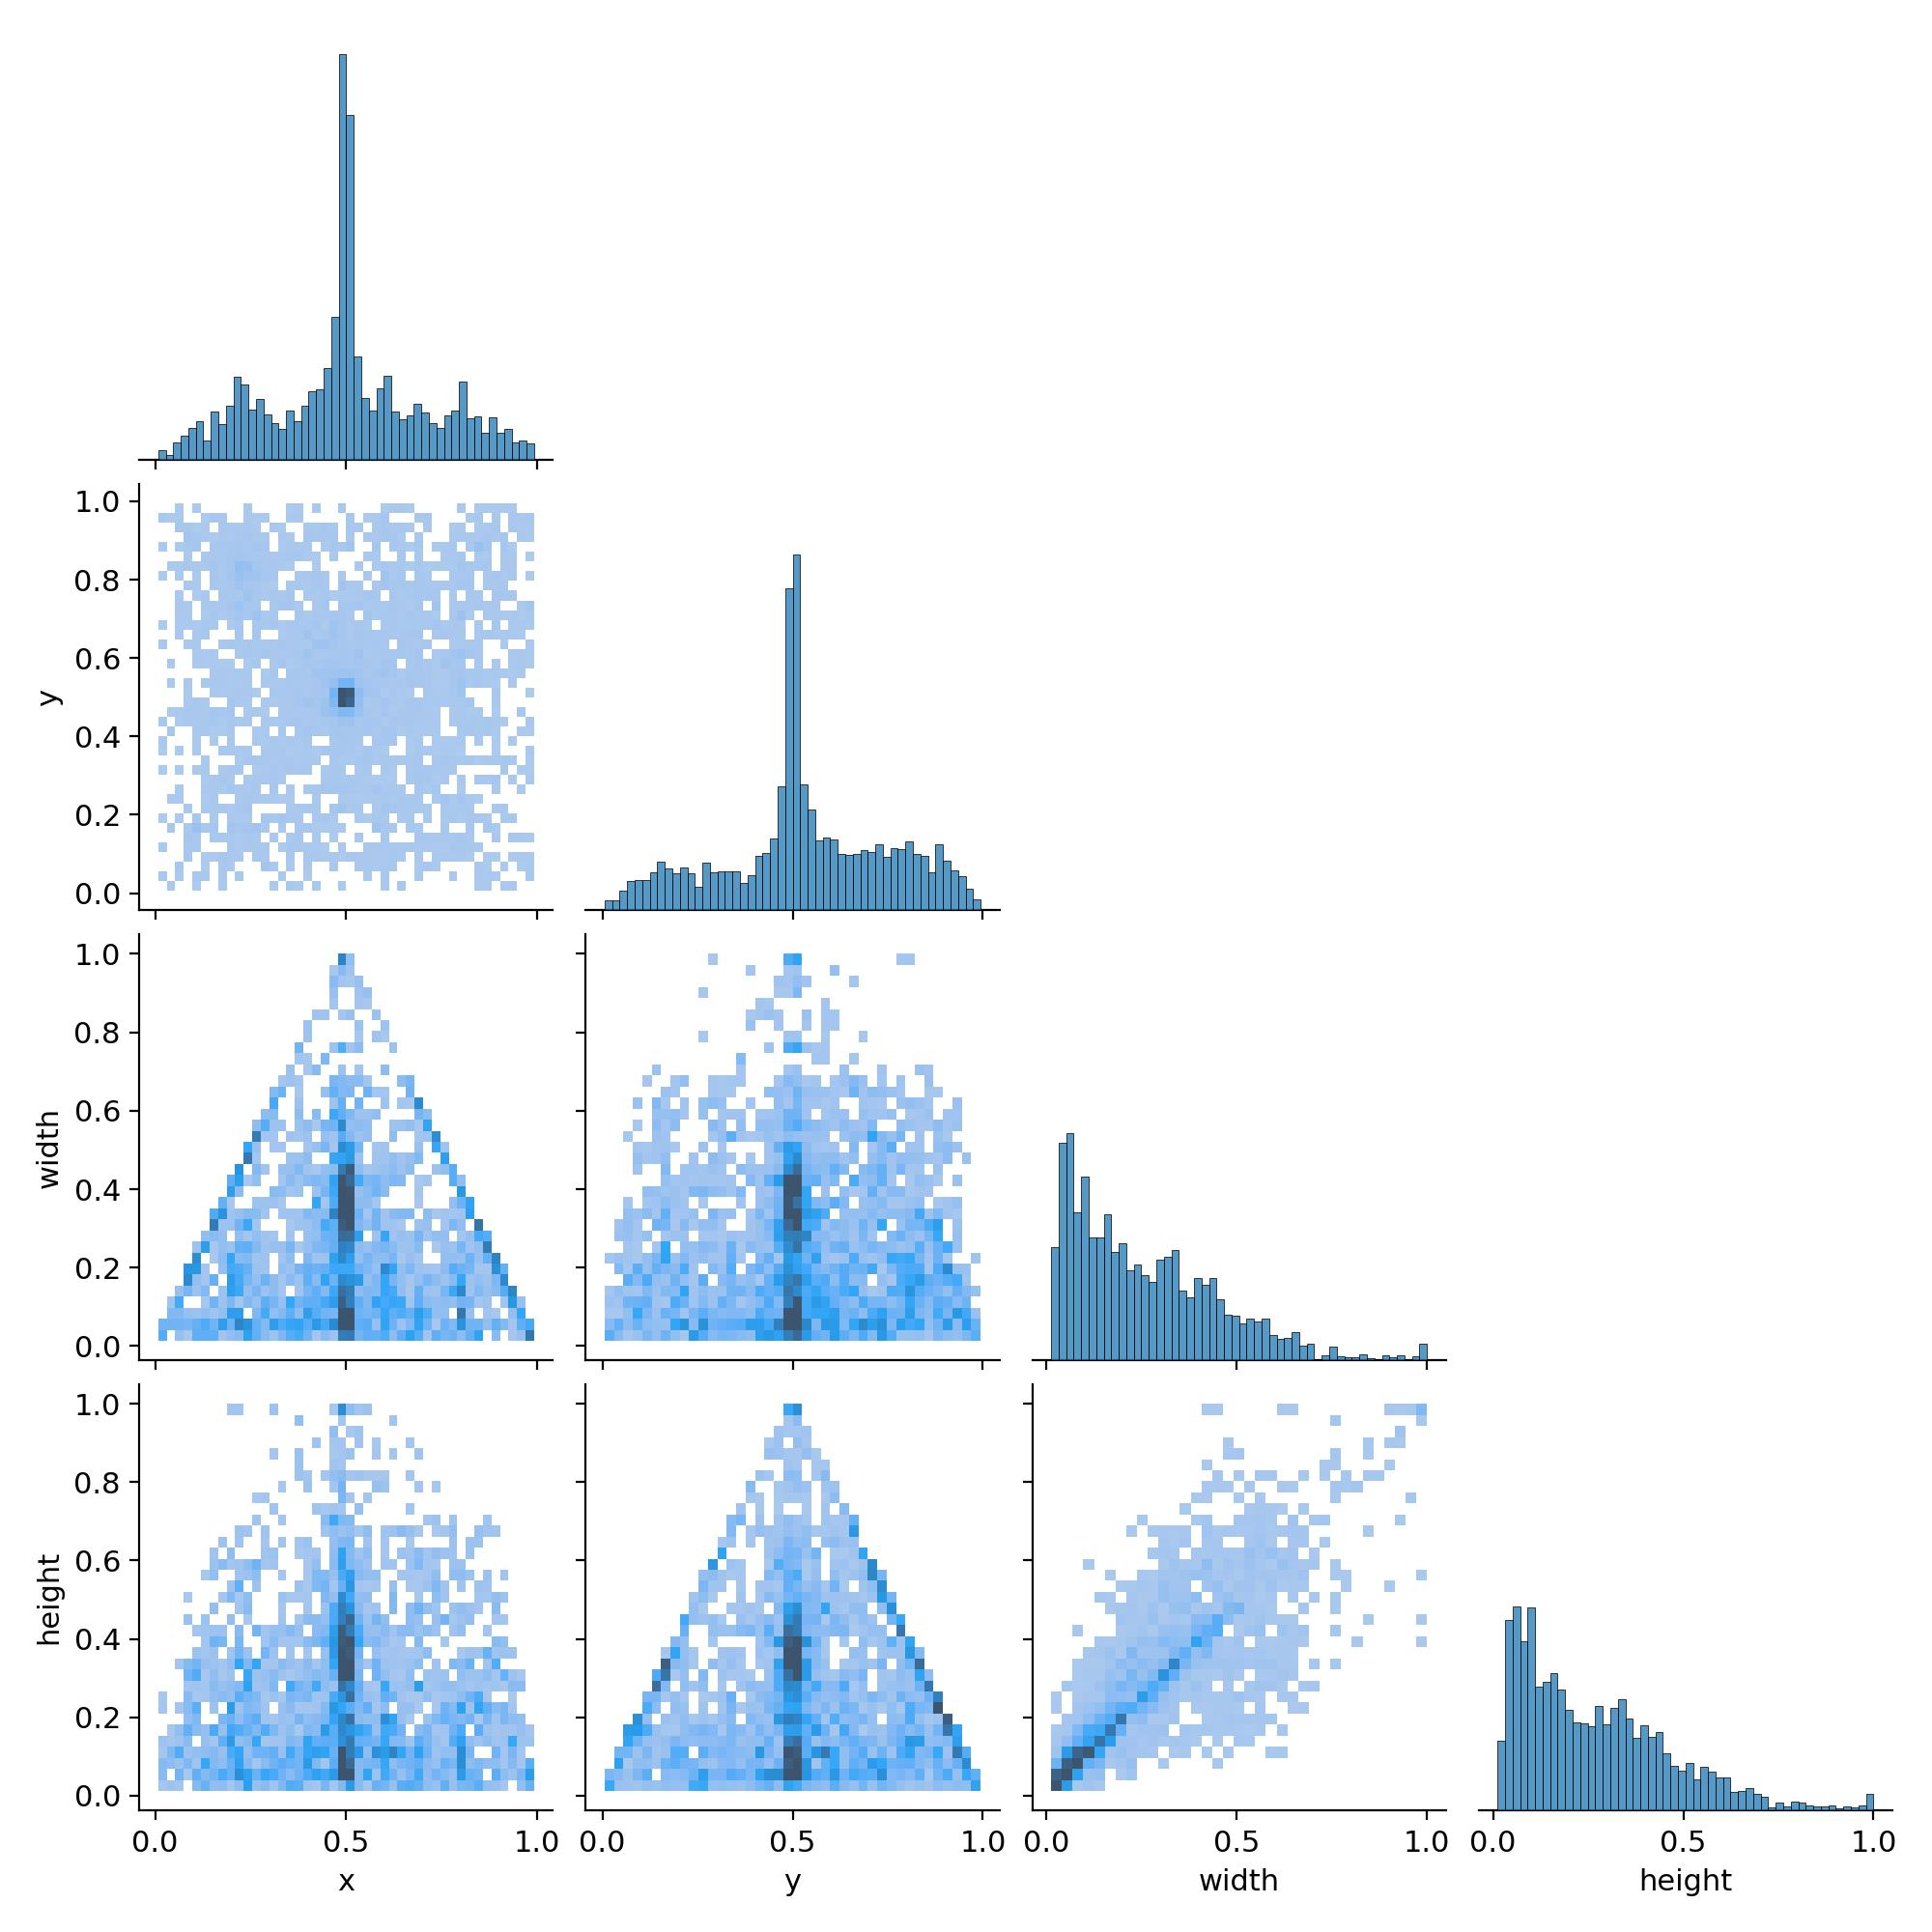
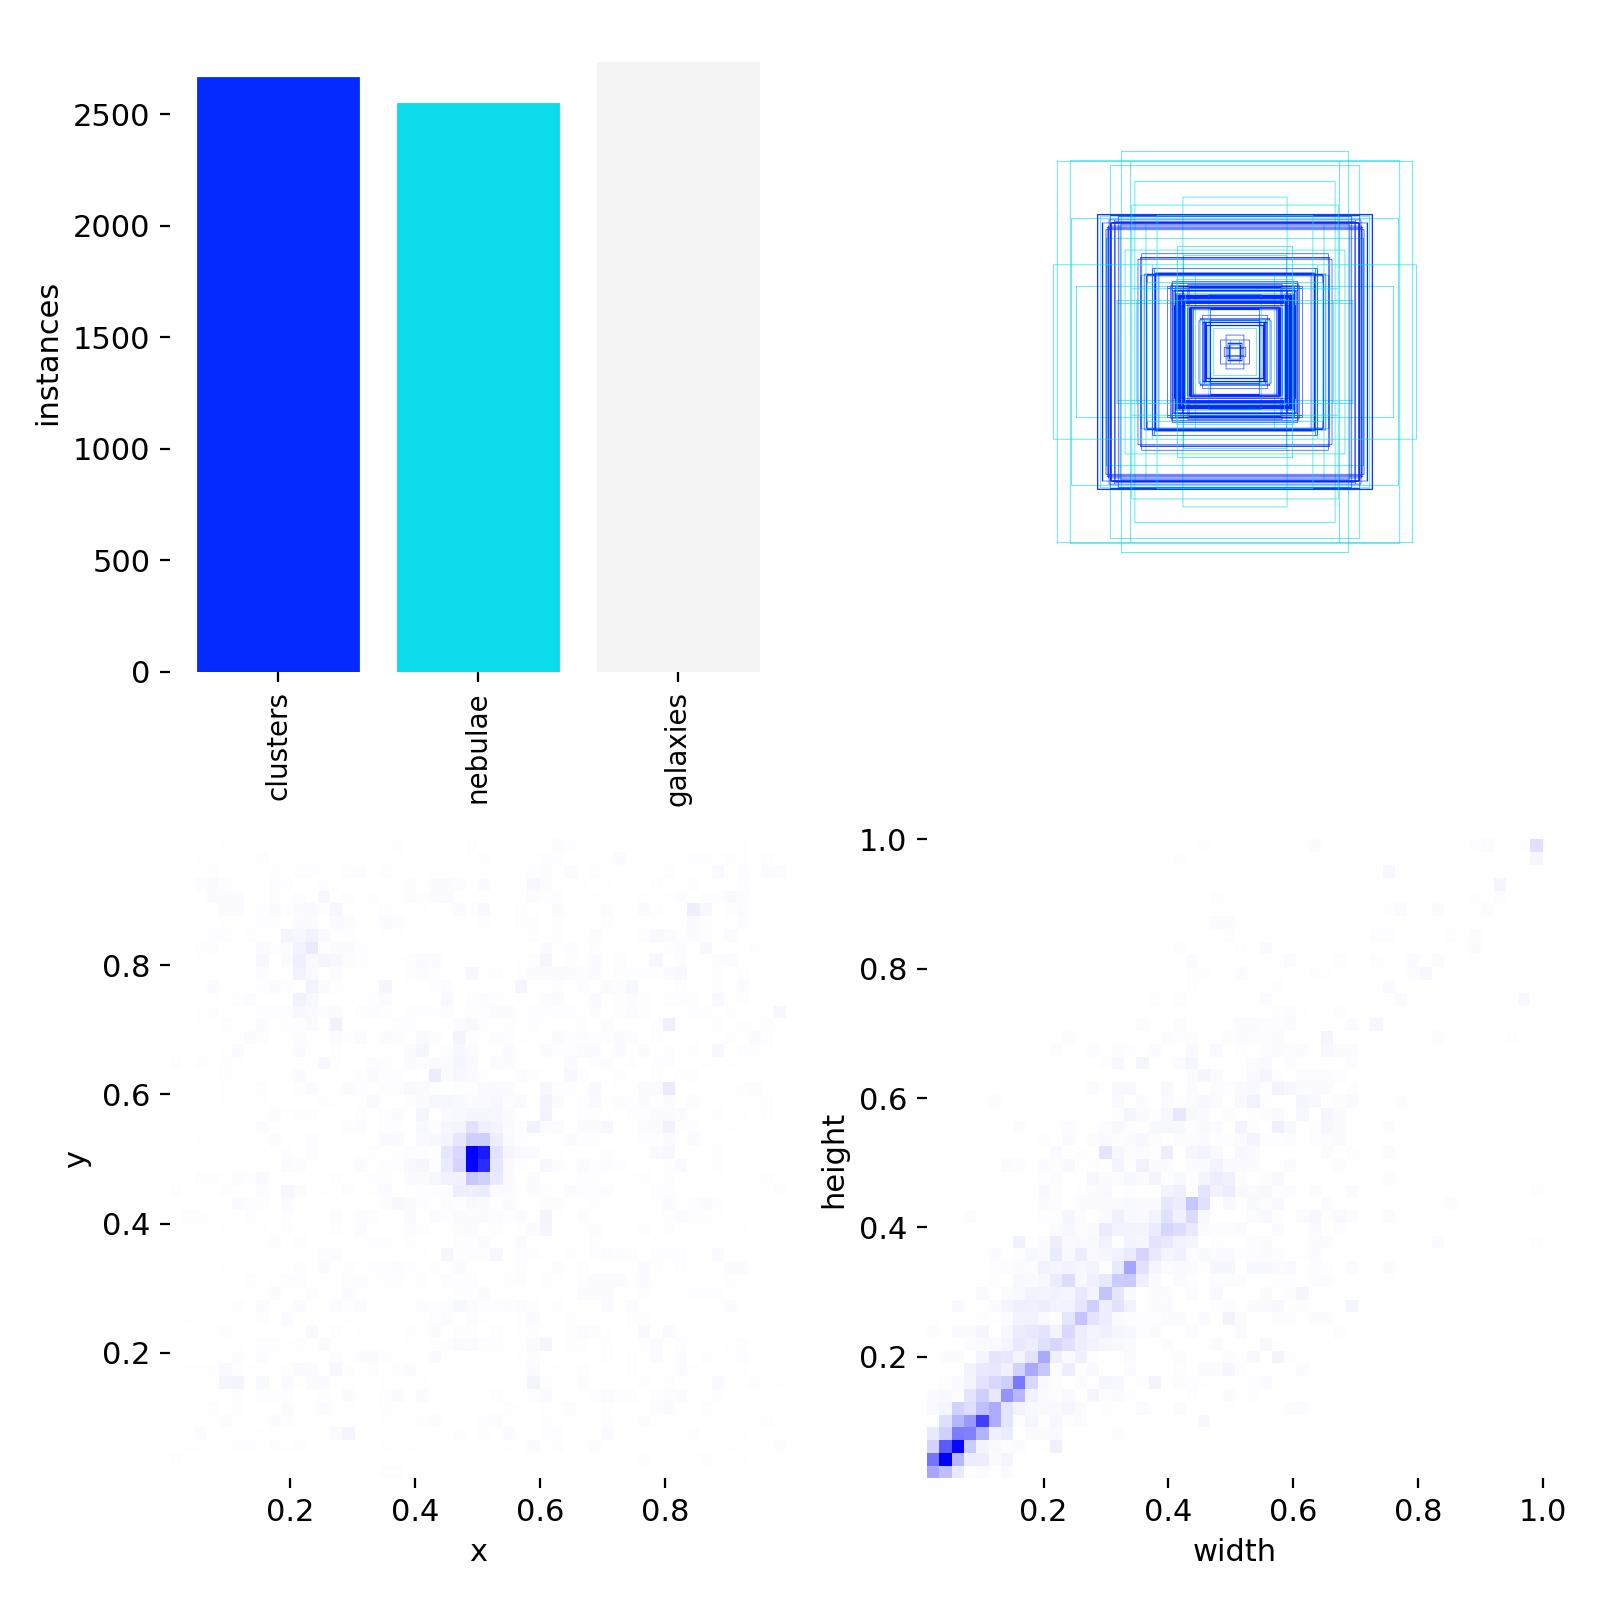
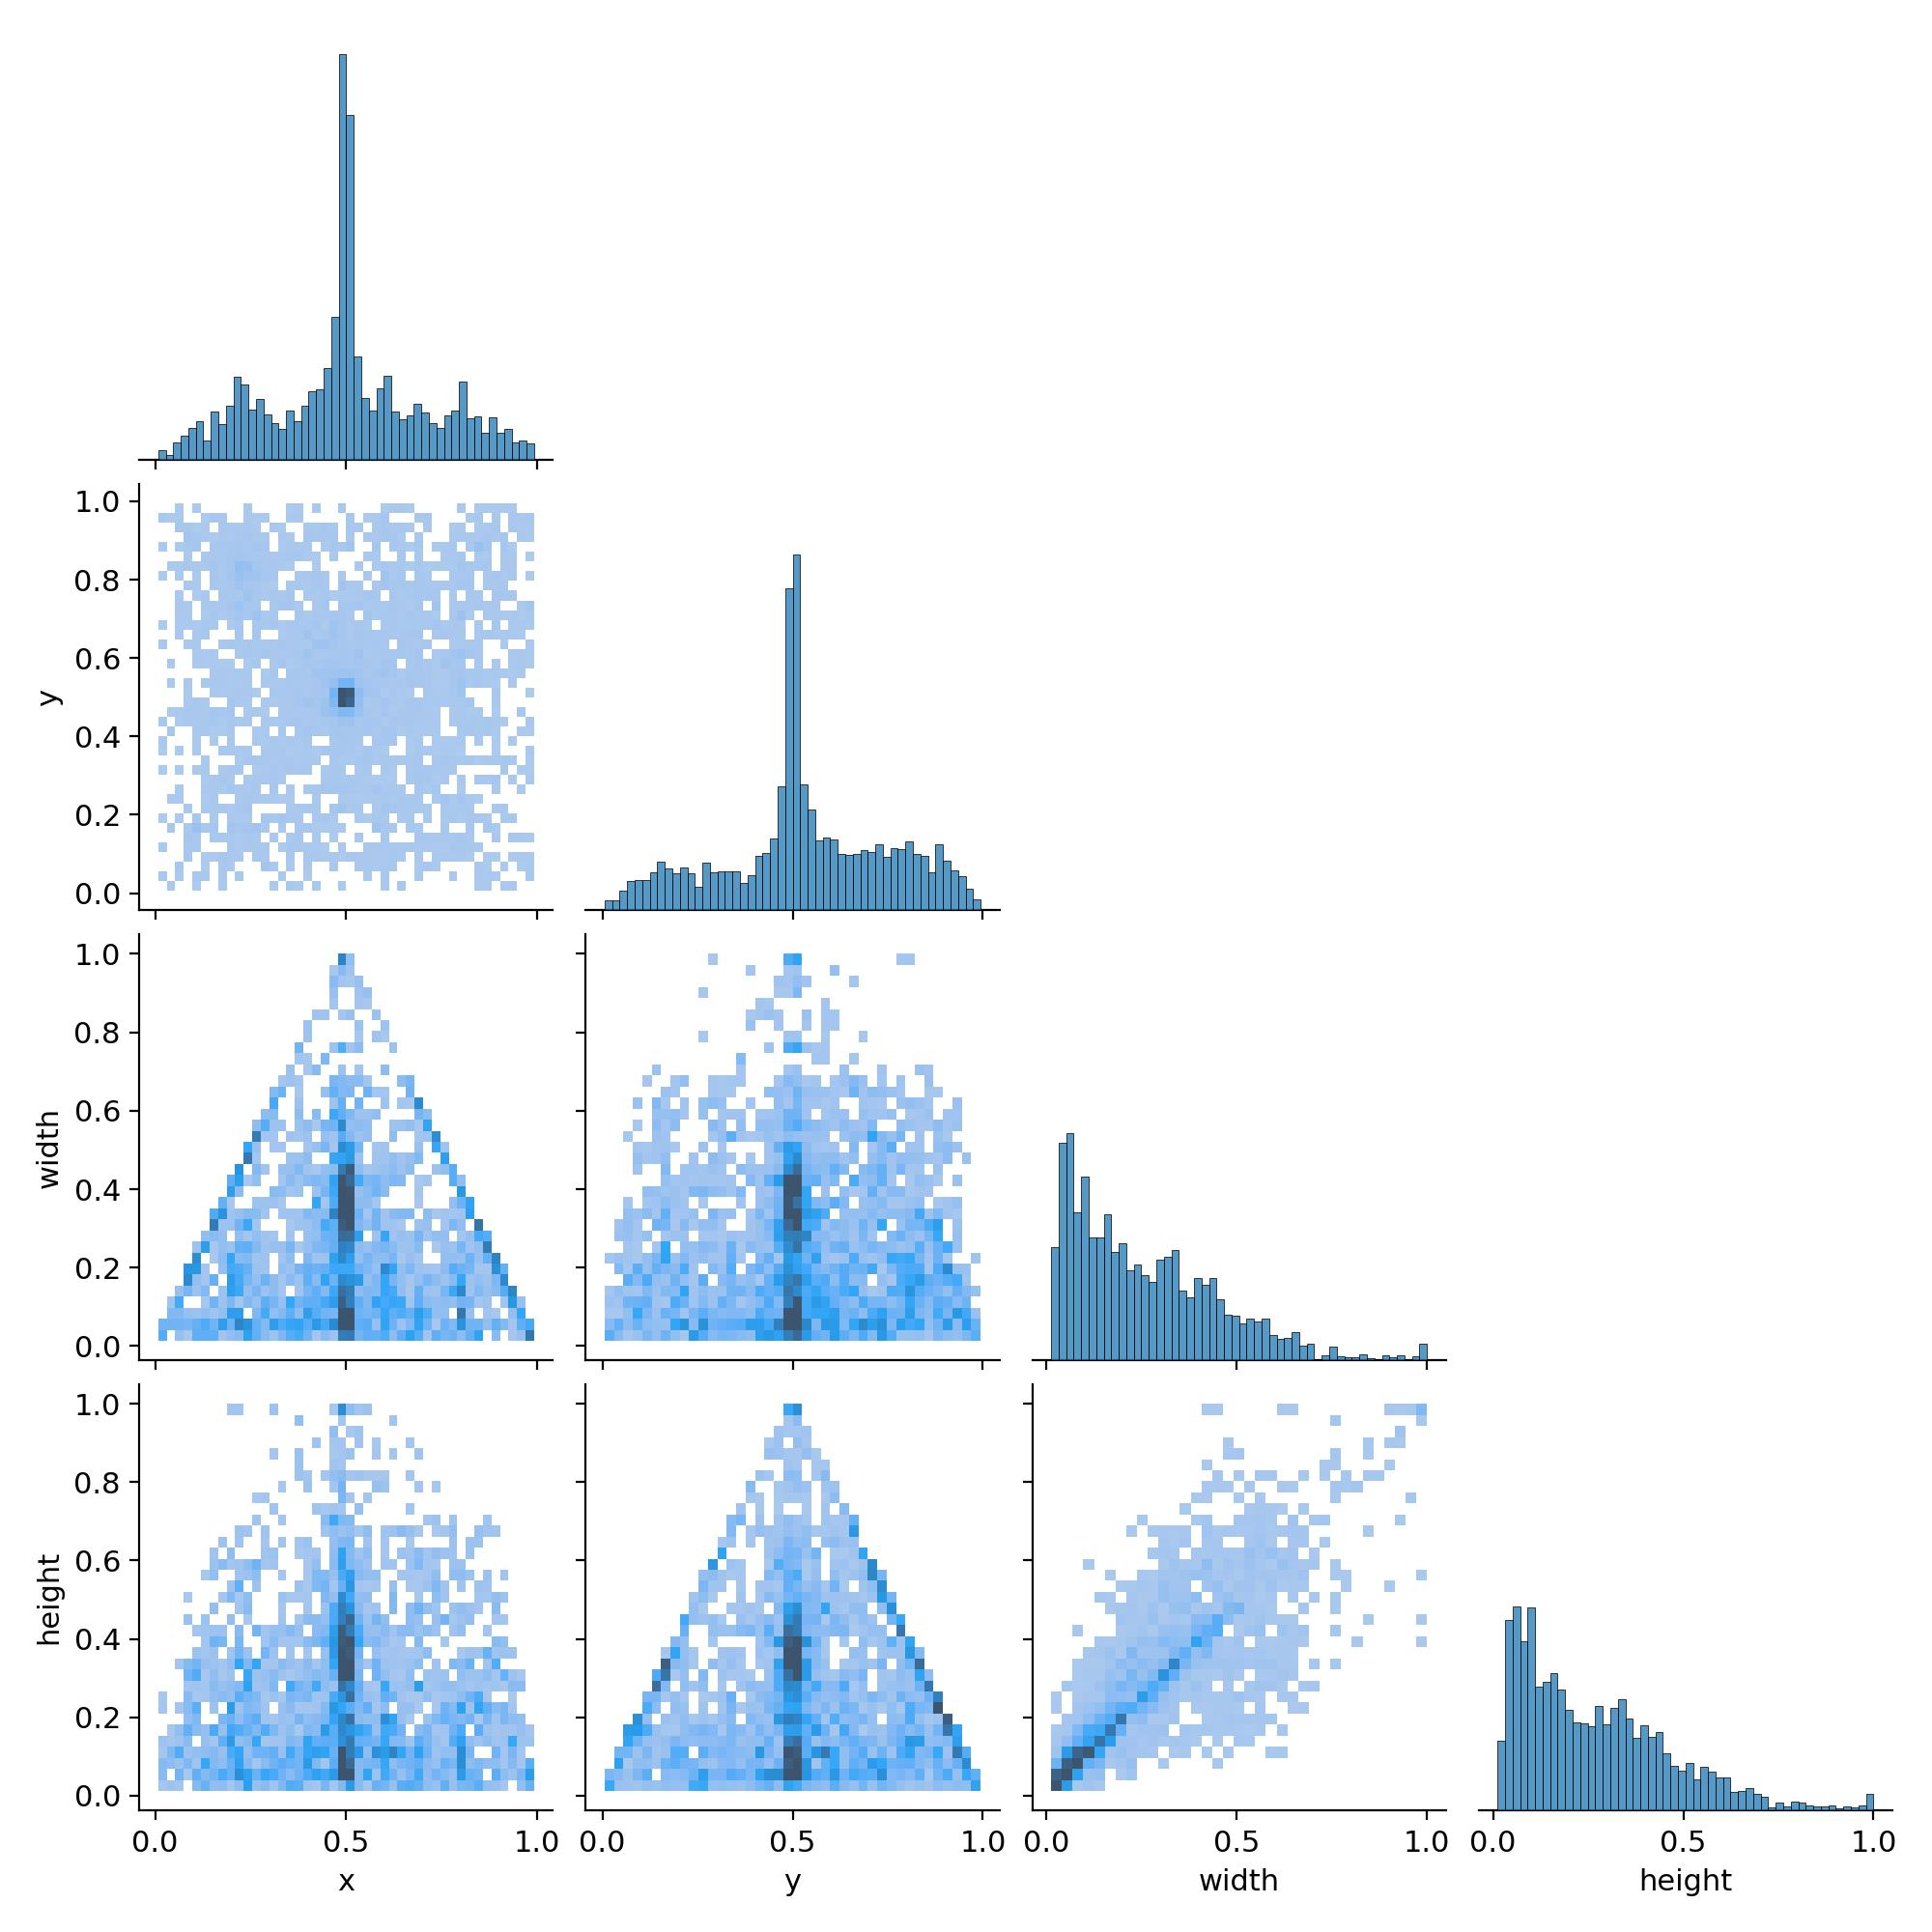
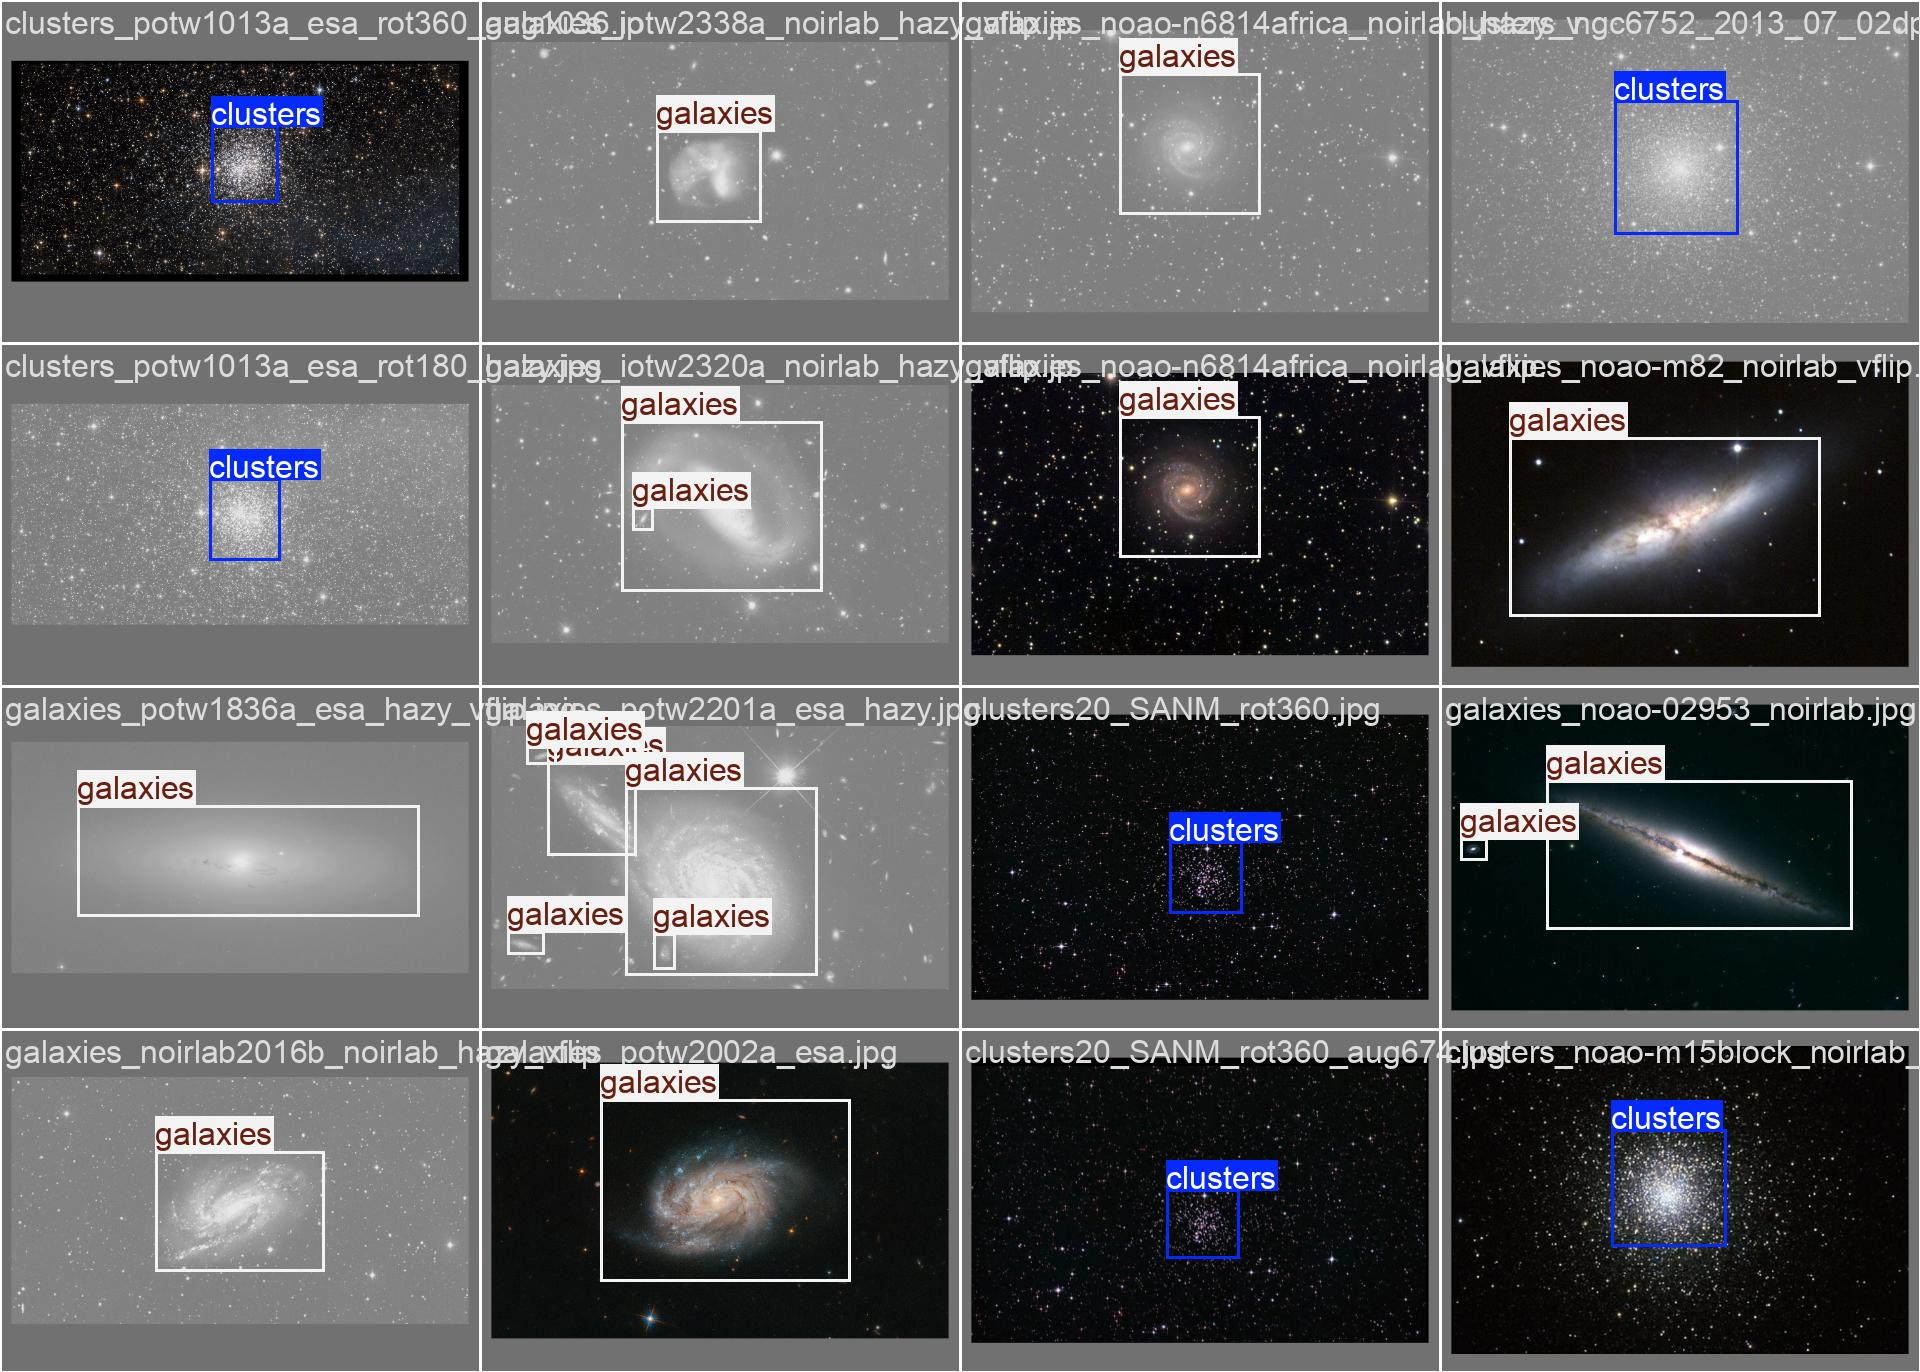
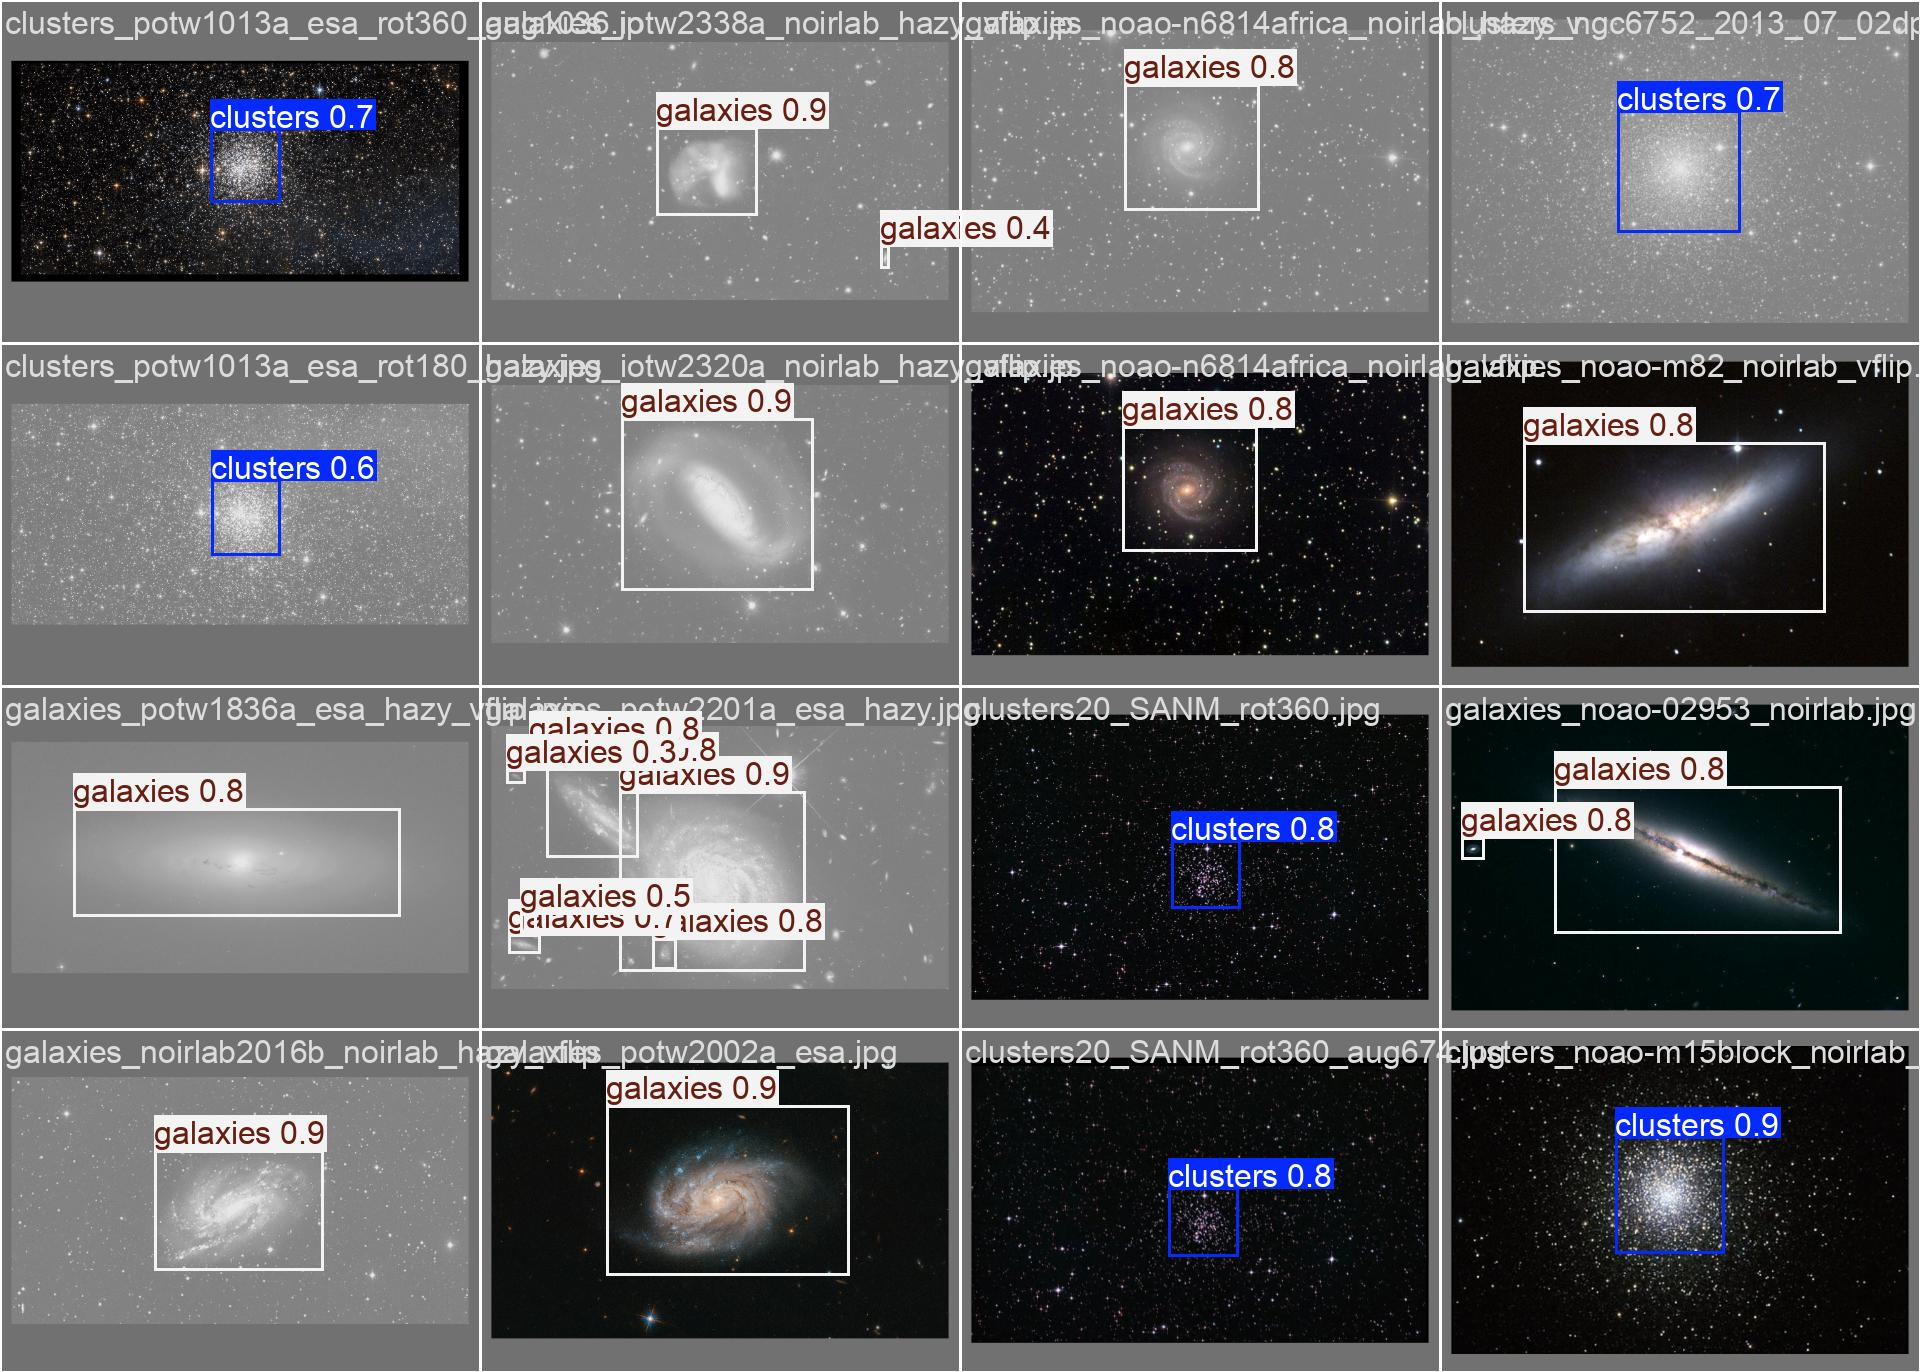
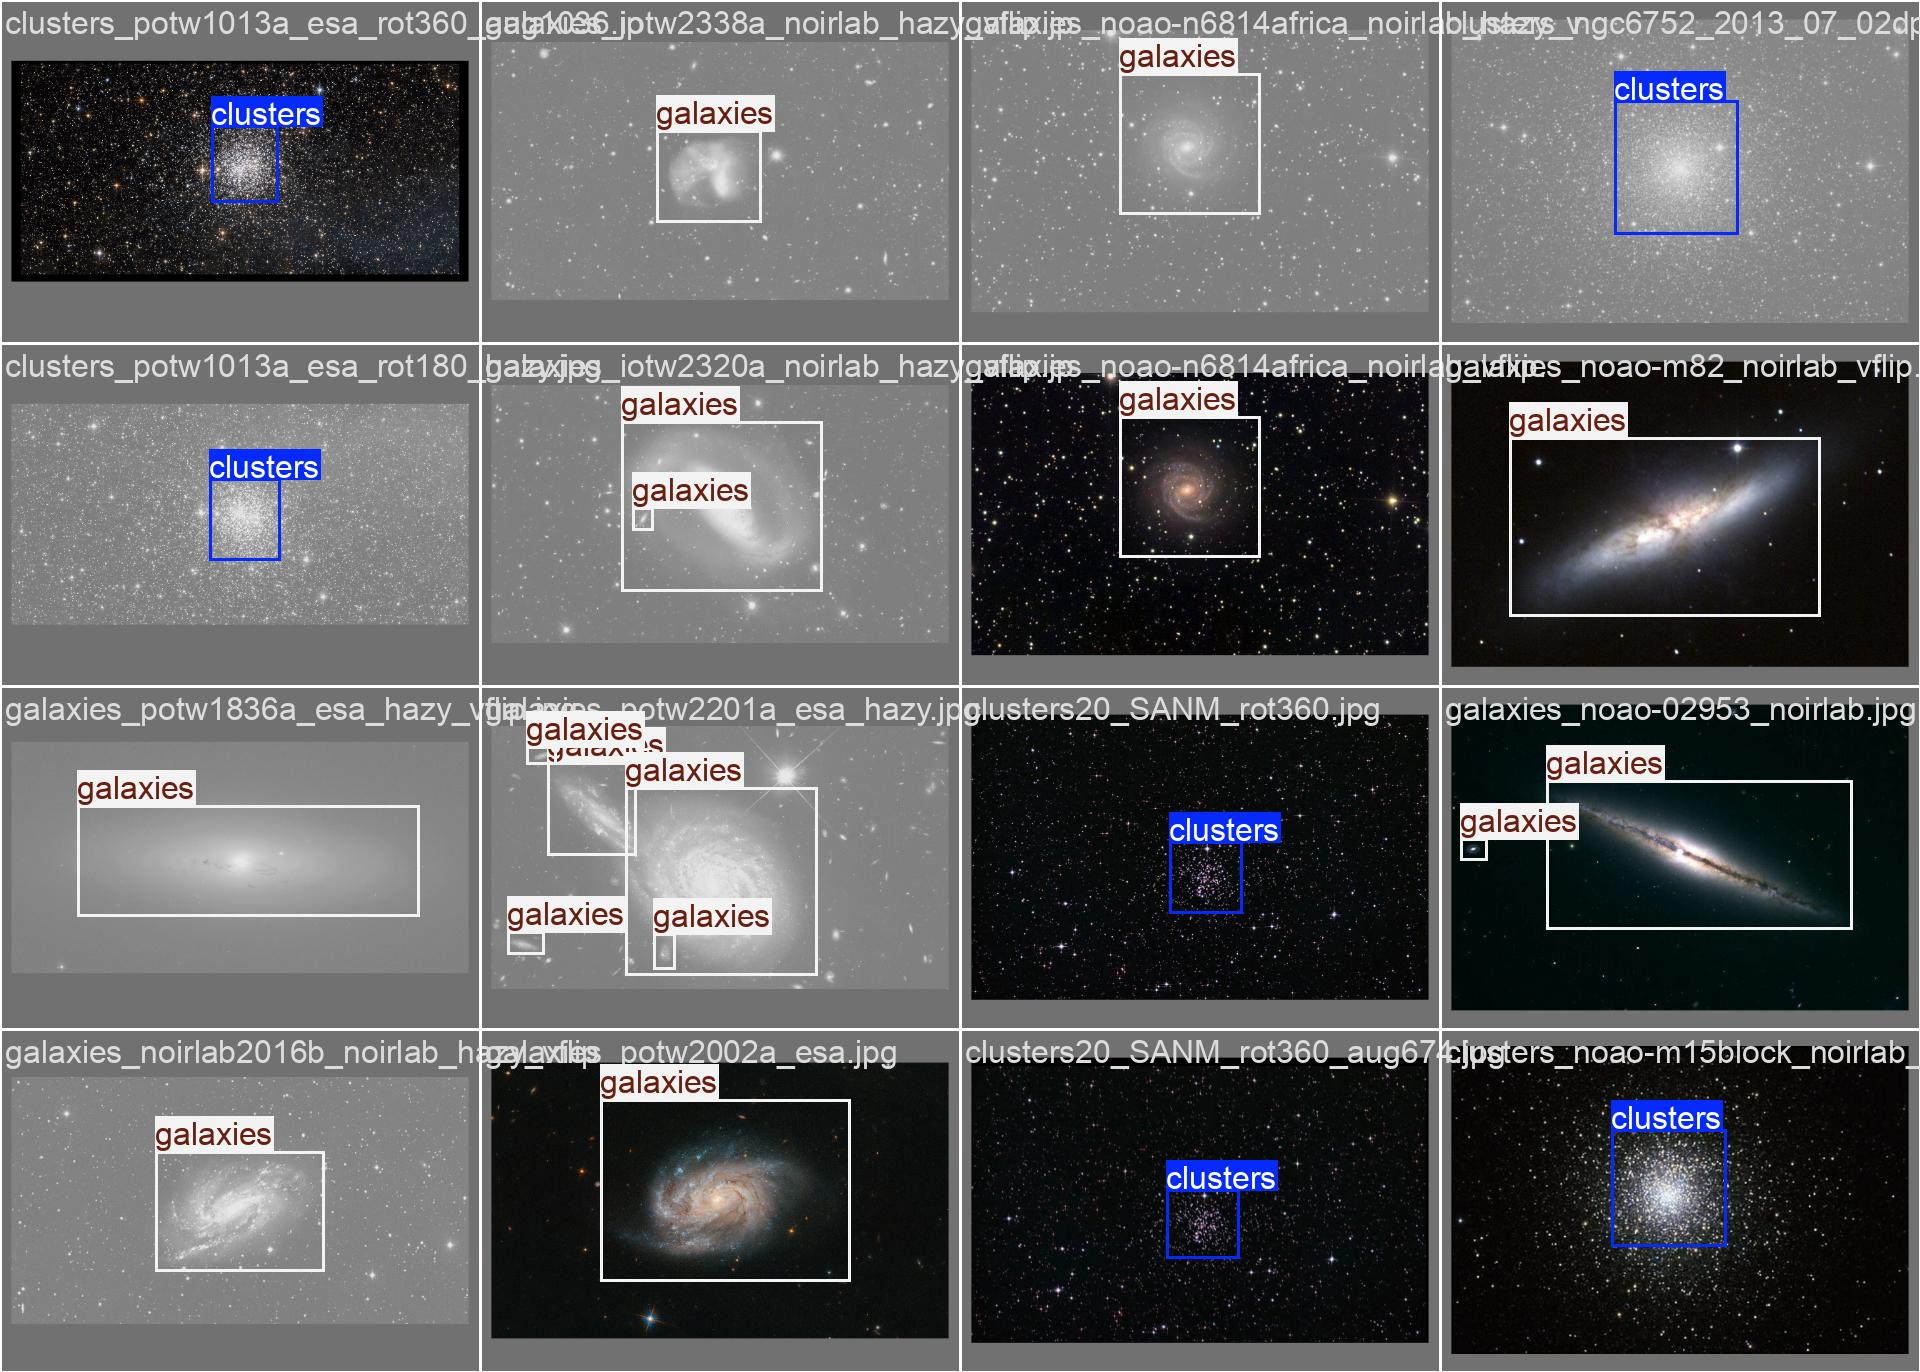
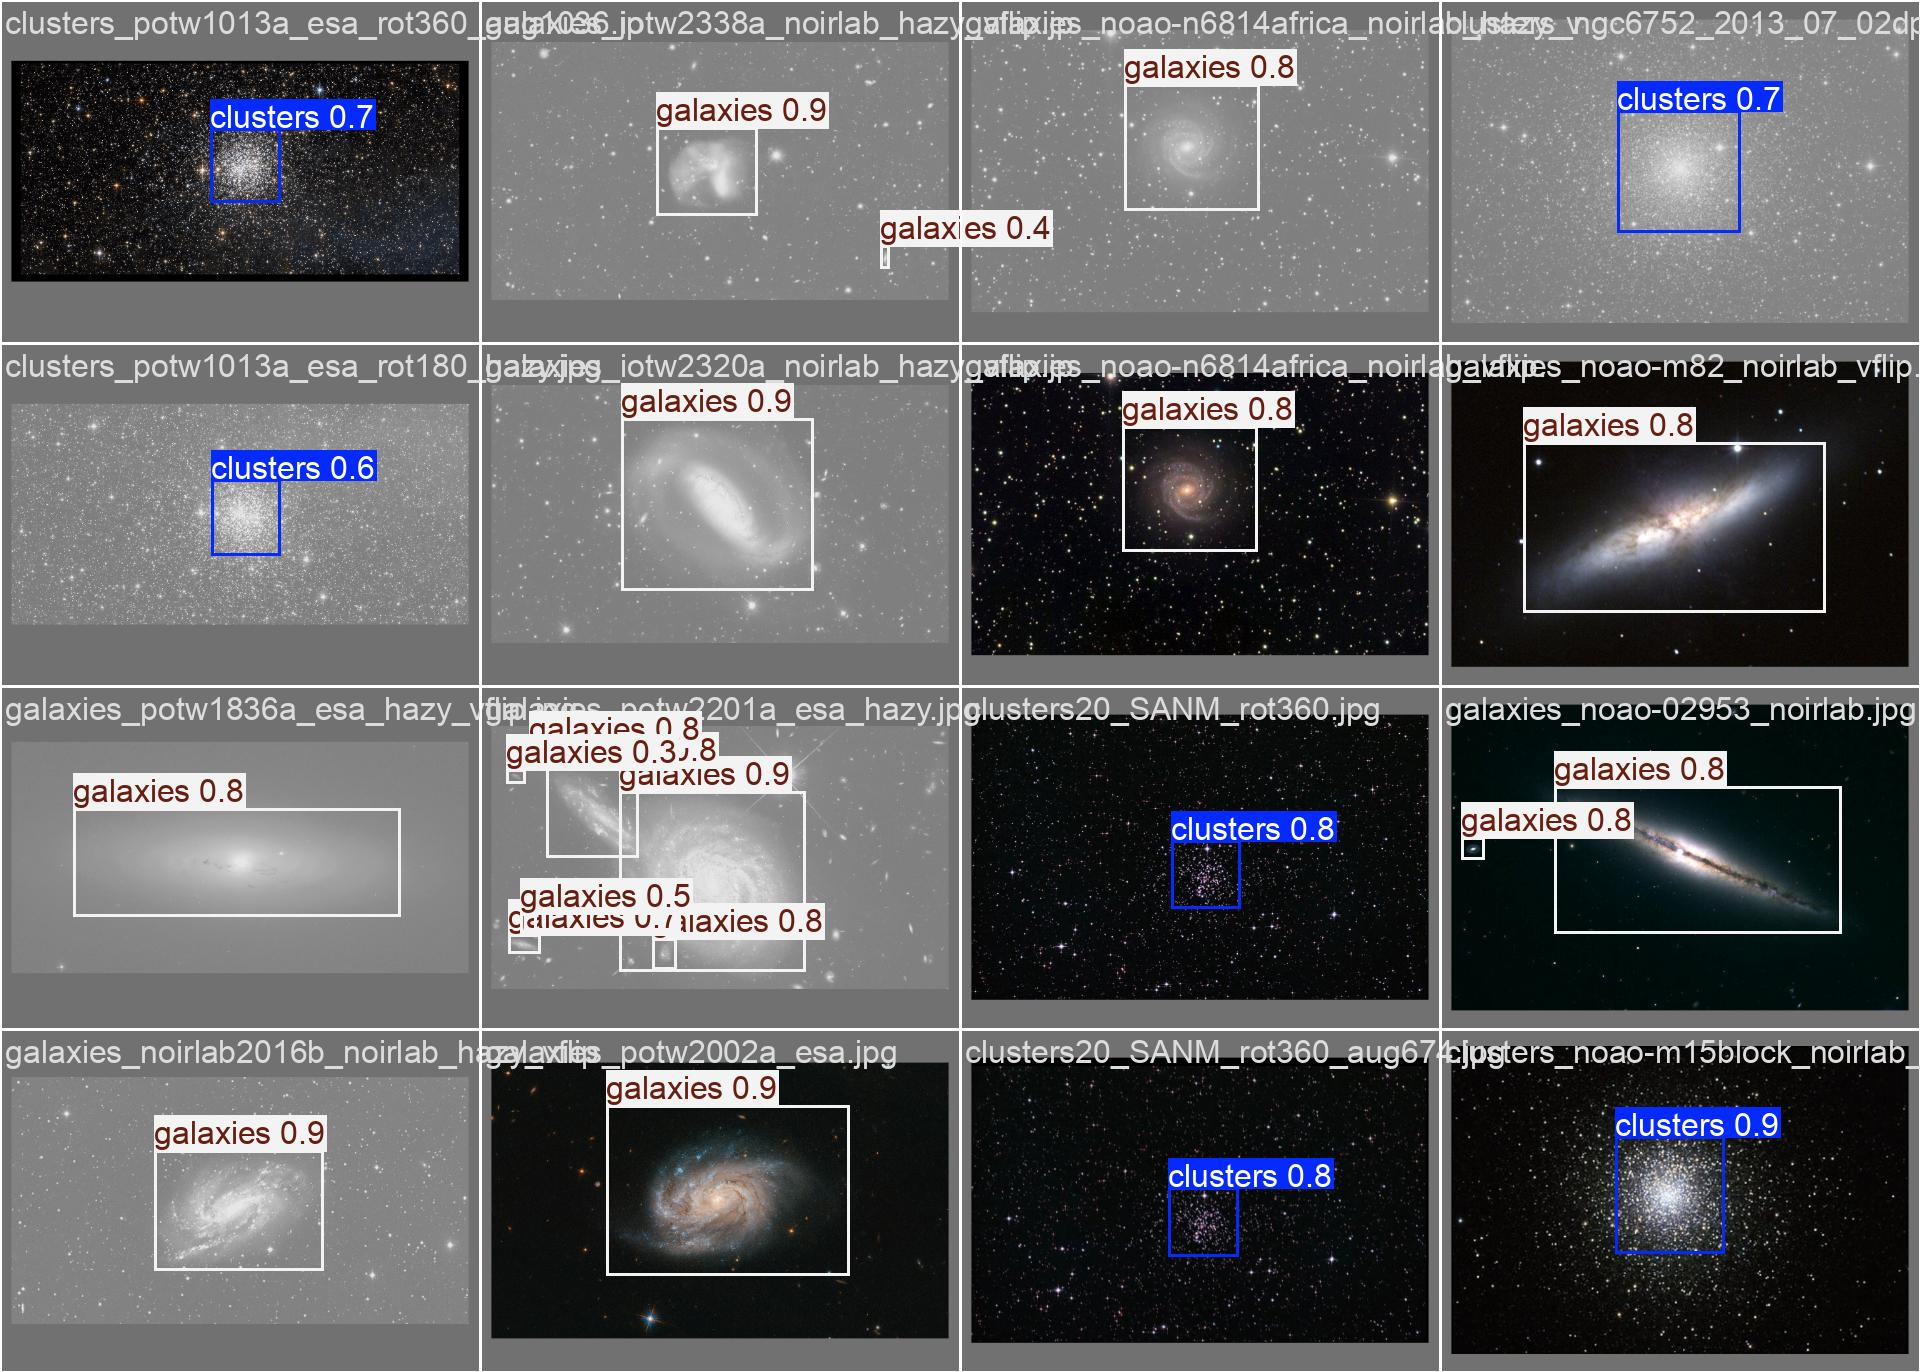
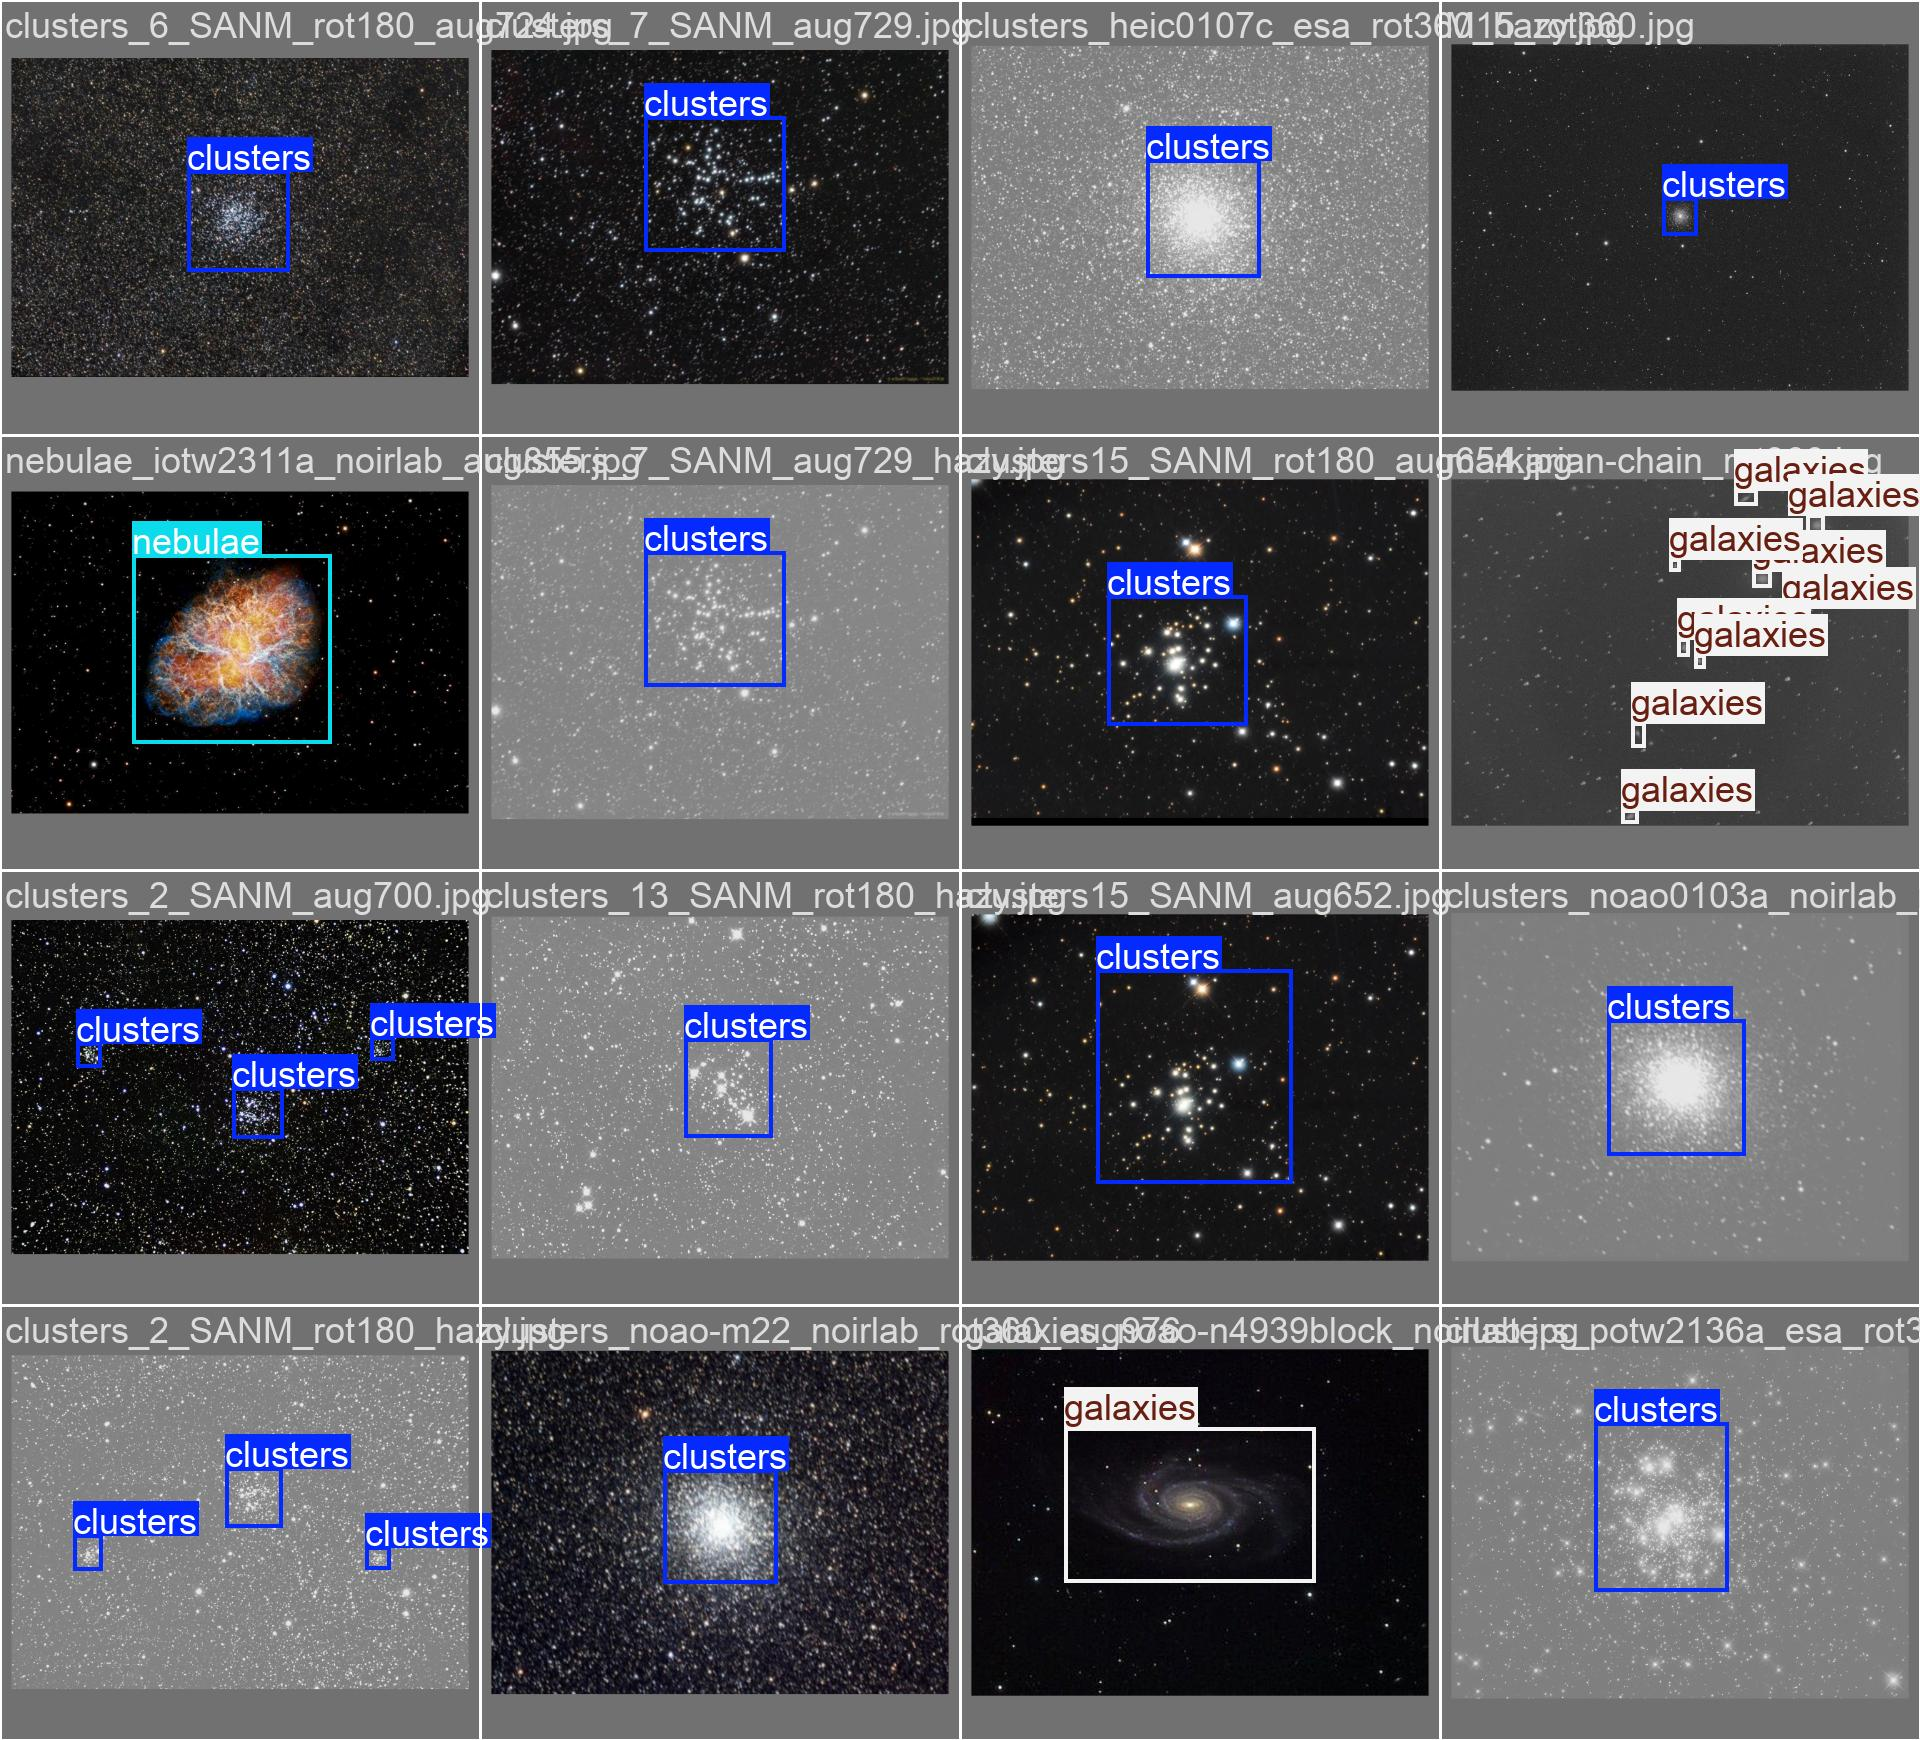
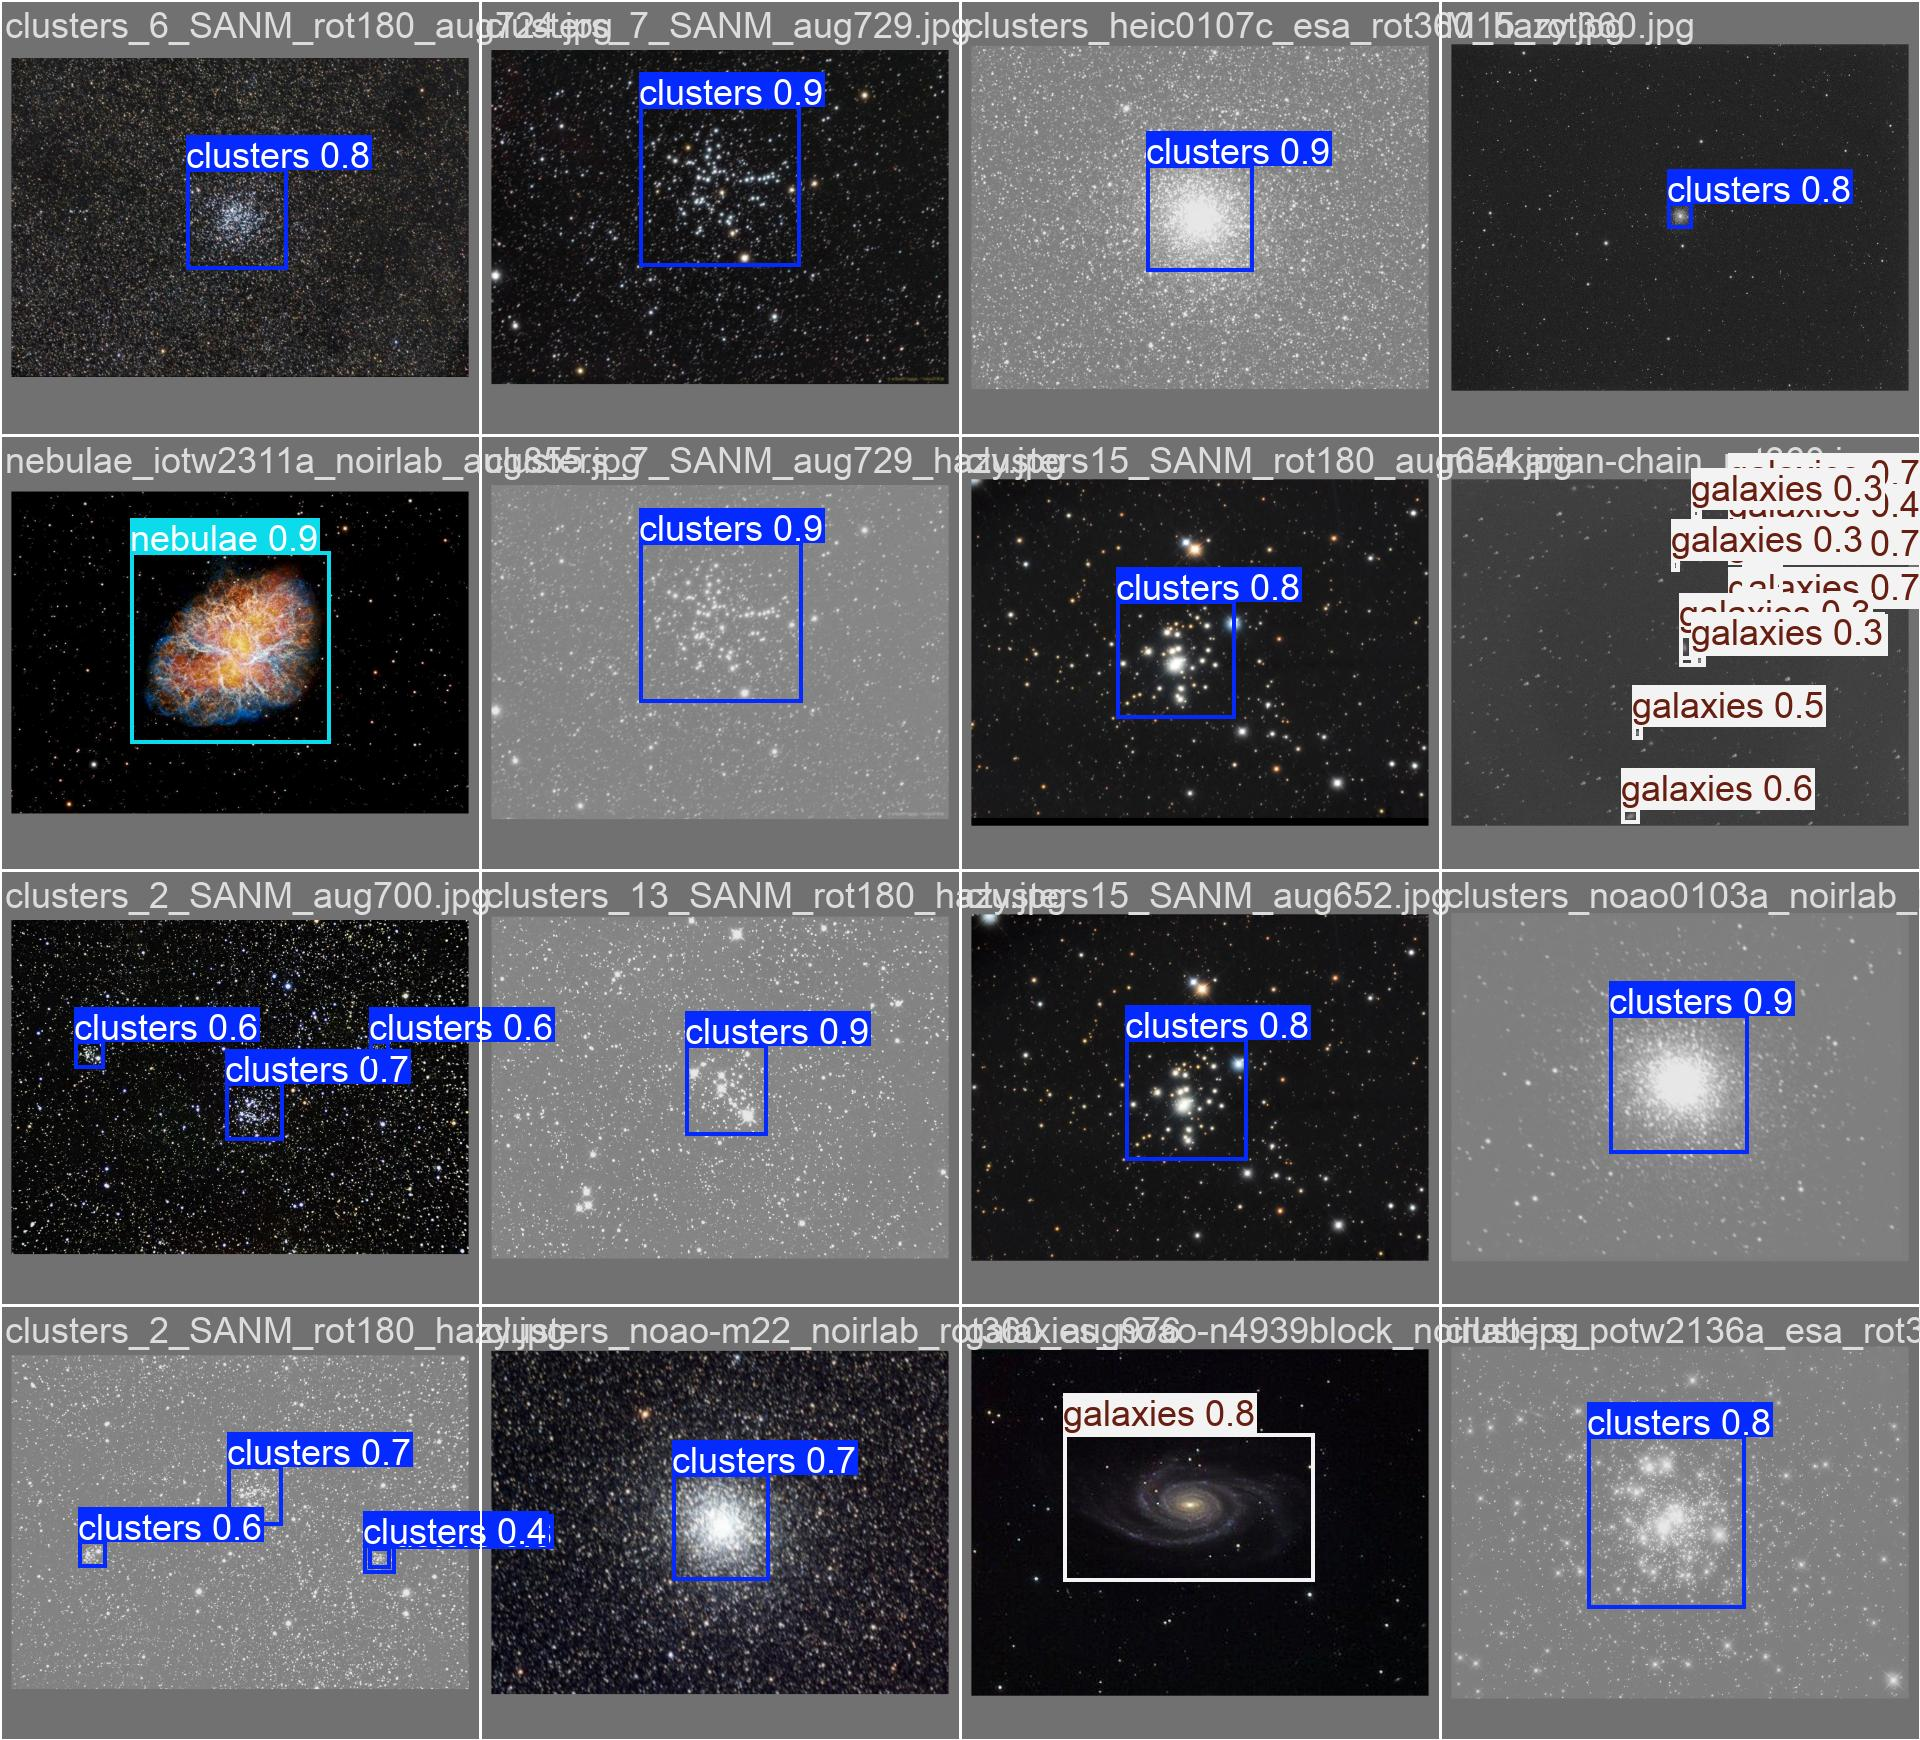
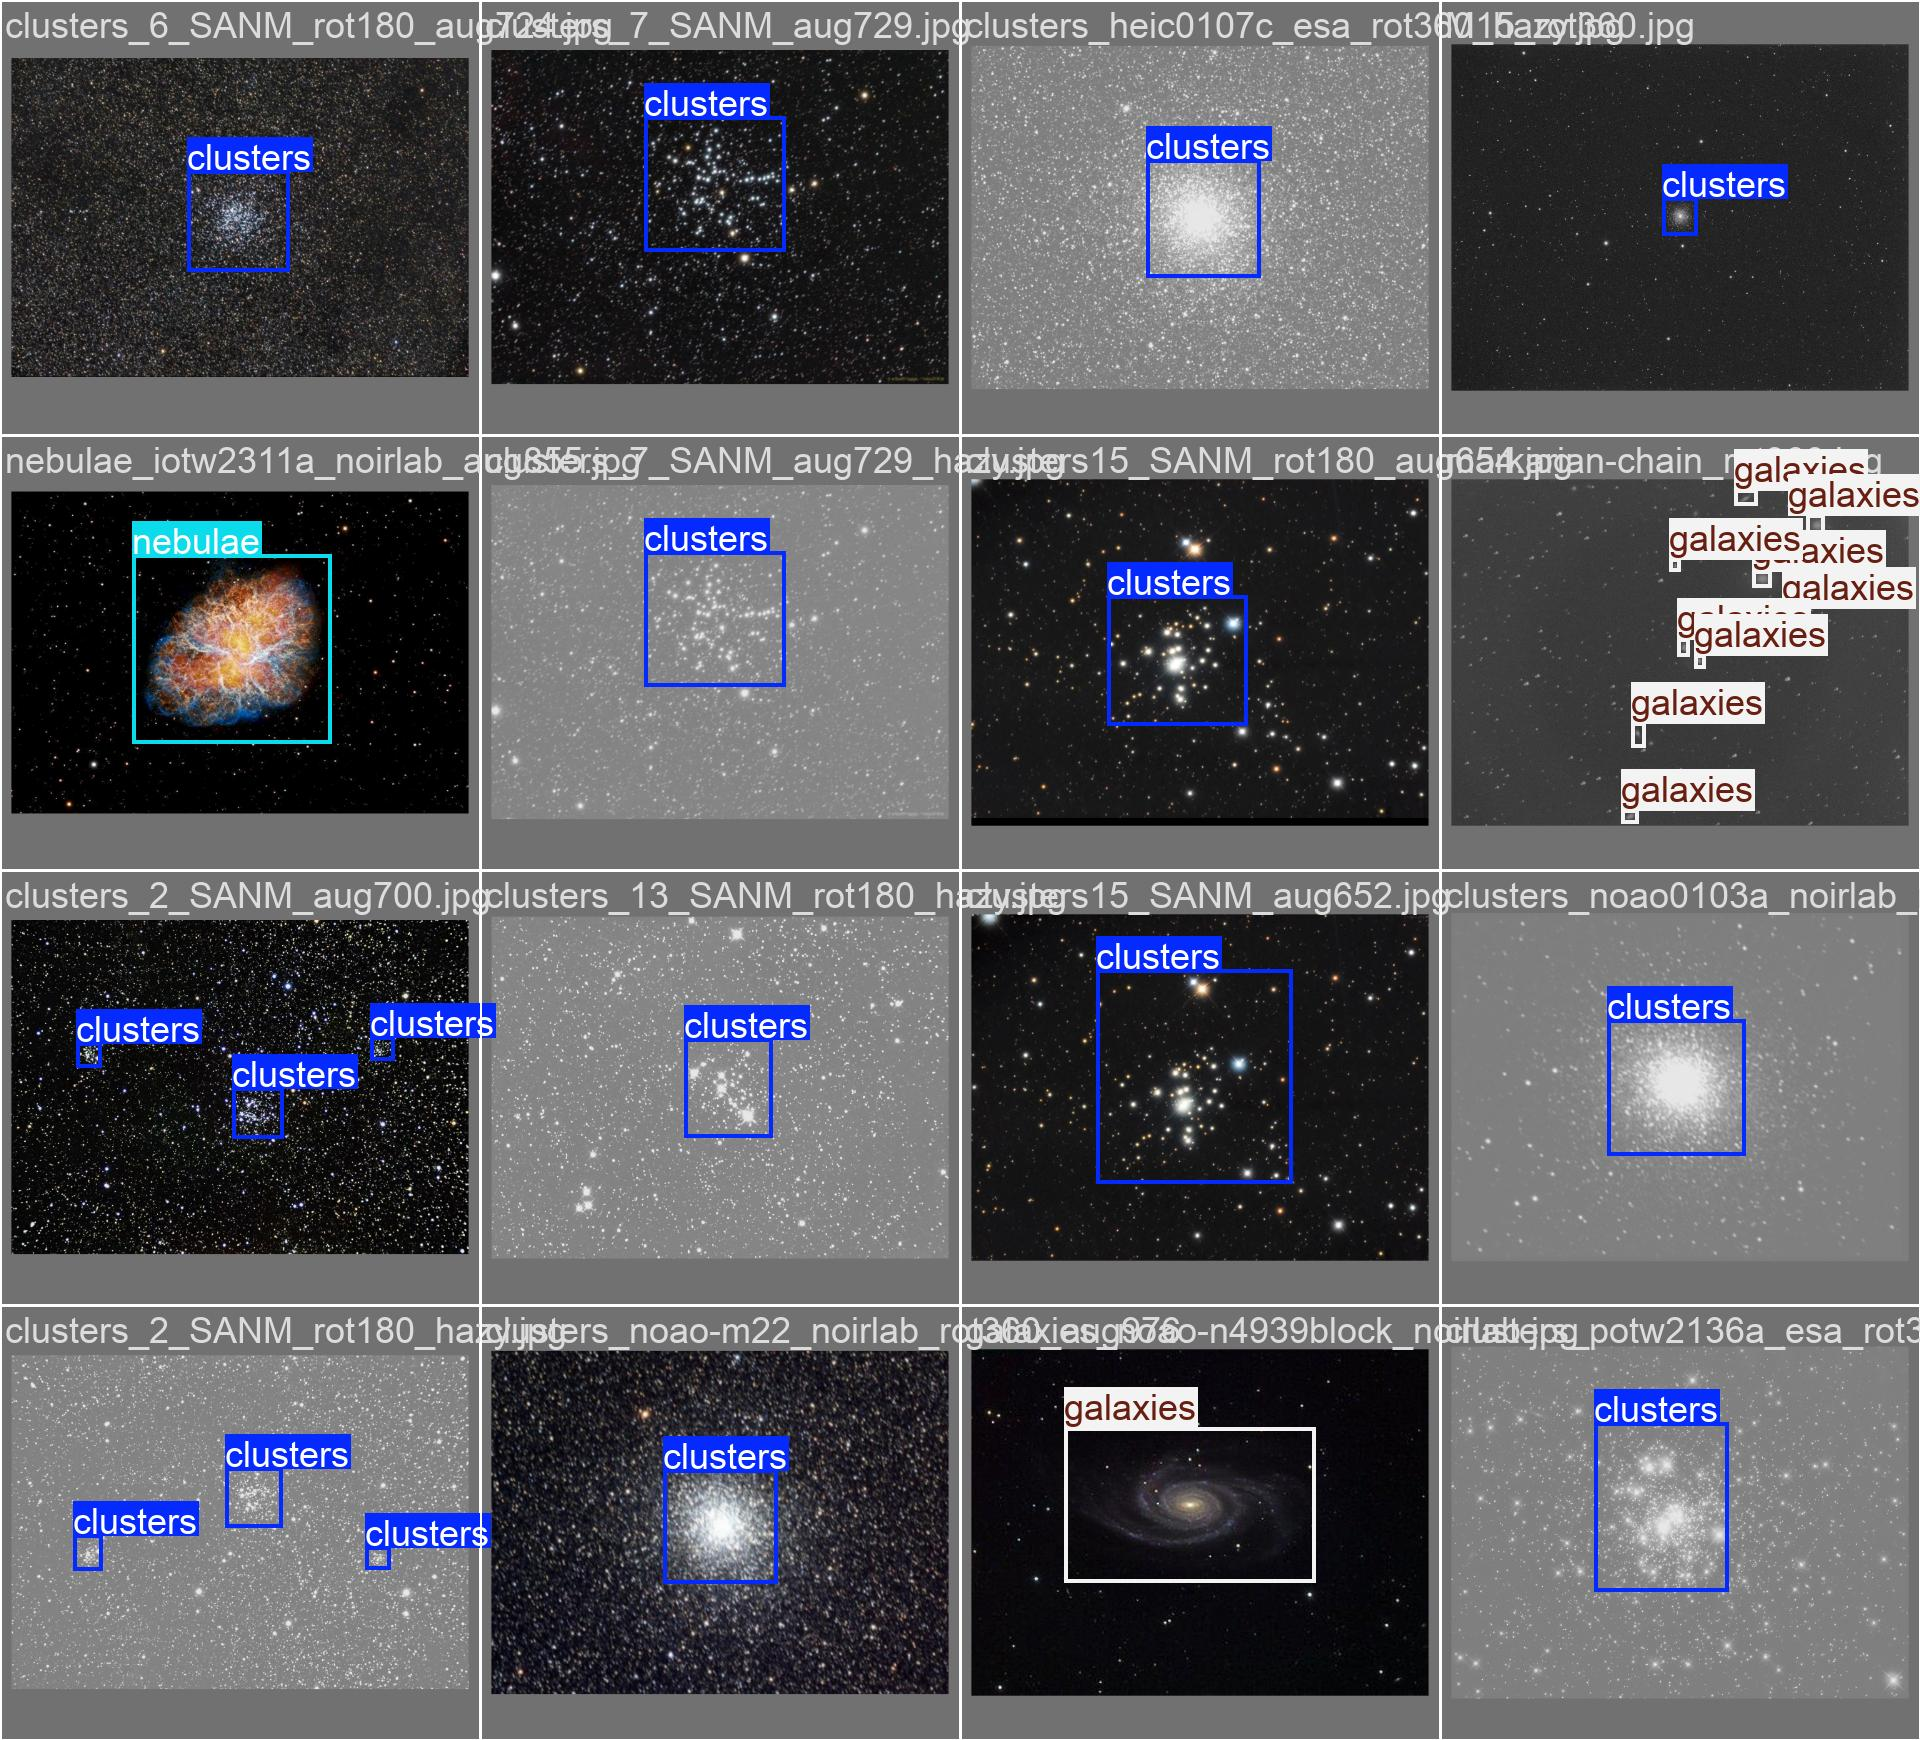
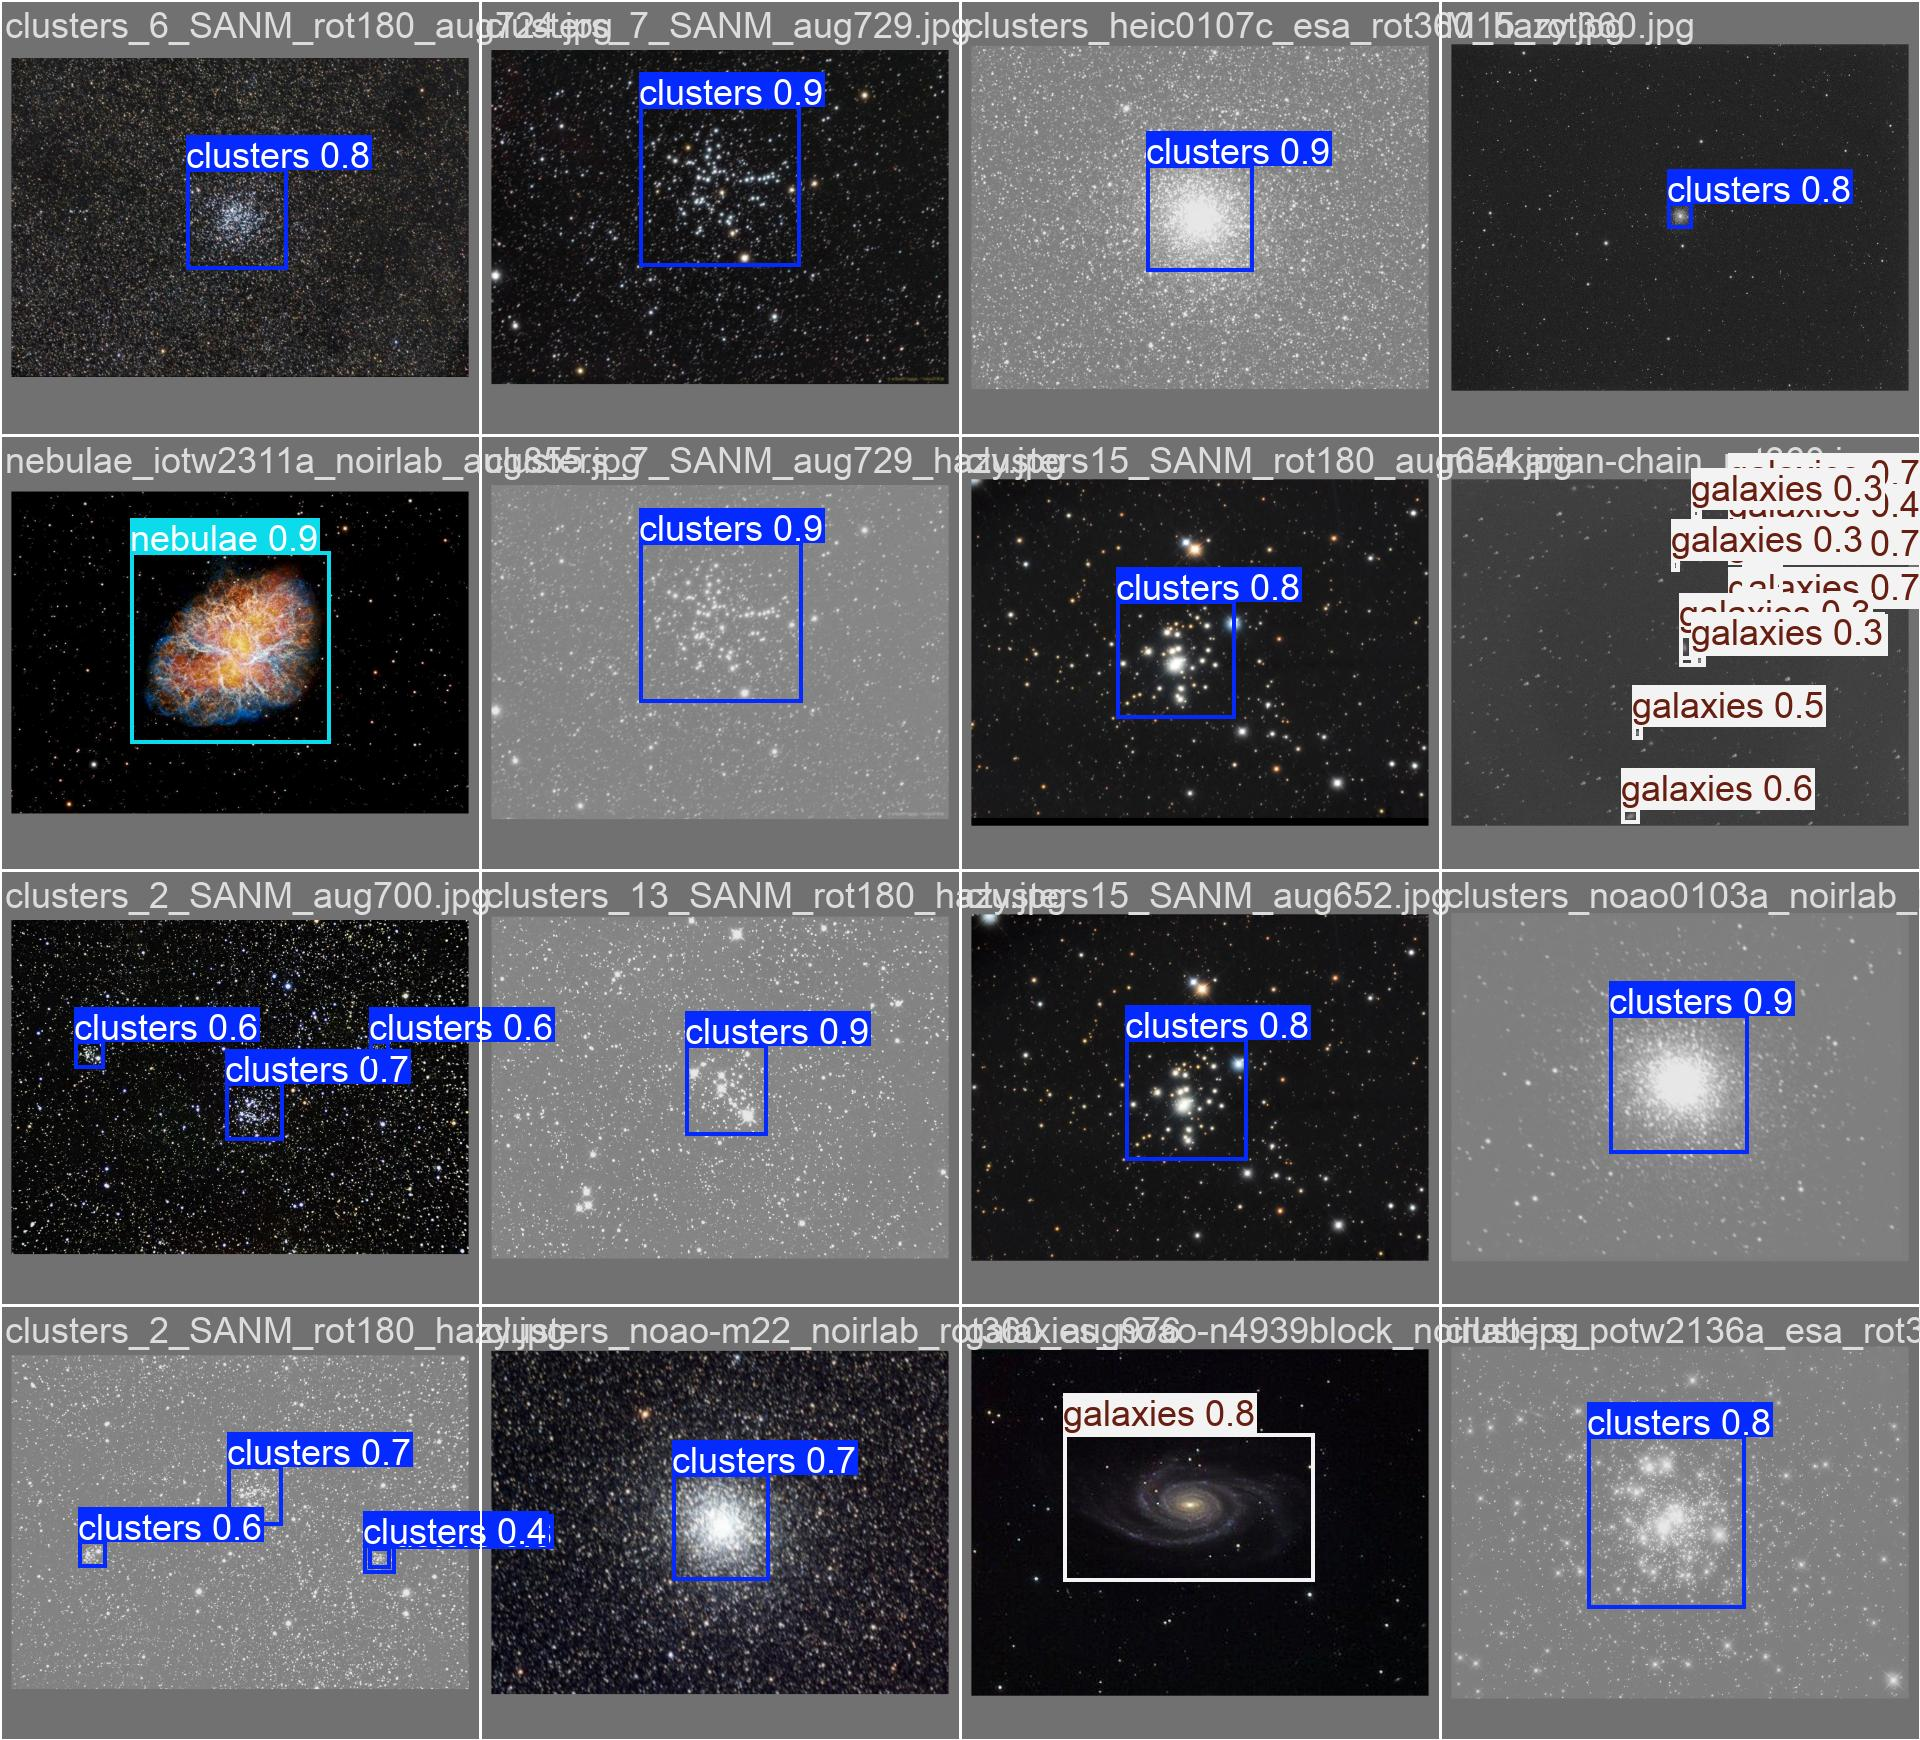

In [27]:
from IPython.display import HTML, display
import base64

base_path = '/kaggle/working/balancedTF3/50ep/train2'

images = [
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'PR_curve.png',
    'P_curve.png',
    'R_curve.png',
    'labels.jpg',
    'labels_correlogram.jpg',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg',
    'val_batch1_labels.jpg',
    'val_batch1_pred.jpg',
]

html = "<table>"

for i in range(0, len(images), 2):
    html += "<tr>"
    for j in range(4):
        if i + j < len(images):
            img_path = os.path.join(base_path, images[i + j])
            if os.path.exists(img_path):
                with open(img_path, "rb") as f:
                    data = f.read()
                    data_url = base64.b64encode(data).decode()
                    html += f"""
                        <td style='padding:10px; text-align:center;'>
                            <img src='data:image/png;base64,{data_url}' width='300'><br>
                            <small>{images[i + j]}</small>
                        </td>
                    """
    html += "</tr>"

html += "</table>"
display(HTML(html))
